<h1 style="color:green; font-size:30px; font-weight:700; text-align:center">
    <u><b>Adult Income Predictions using Classification</b></u>  
</h1> 

<p></p> 
<strong> Author:</strong> Gurtej Bains <br> 
<strong> Data Source:</strong> http://www.cs.toronto.edu/~delve/data/adult/desc.html <br> 
<strong> Last Updated: </strong> <br>
<strong> Problem Statement:</strong> <br>

US Census Bureau data collected in 1996. It captures the numerous factors that contribute to an individual's annual income. Some of the factors influencing income in this dataset are education level, age, gender, profession, etc. Let's use this dataset to understand the factors influencing salary. 
Additional details about the dataset can be found here (http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html)

<h1 style="color:green"><b>Importing Modules</b> </h1>

## Import libraries

In [1]:
# import libraries  

# Numpy
import numpy as np

# Pandas
import pandas as pd

# MatPlotLib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# MissingNo
import missingno as msno

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import (ColumnTransformer, make_column_selector,
                             make_column_transformer)

#Importing the Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report, recall_score)
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Display estimators as a diagram in a Jupyter lab or notebook context
from sklearn import set_config
set_config(display='diagram') # {'text', 'diagram'}, default=None

# to see the plots in the notebook
%matplotlib inline 
%config InlineBackend.figure_format = "retina"

# functional/enhancement 
import re 
import time 
start_time = time.time()
import sys
import warnings
warnings.filterwarnings("ignore")

print ("Import successful")

Import successful


## Color class

In [2]:
# Color class to make print look pretty  
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello, World!' + color.END)

Hello, World!


<h1 style="color:green"><b>User Defined Variables </b> </h1>

## Preview the data 

In [3]:
# User defined function to preview the data 
def preview_udf (data_frame, sample_size=10):
  """
  This function takes a table and returns a detailed description of its shape.
  table_name: enter the dataframe name 
  sample_size: enter the sample size of the output to be viewed 
  """
  # Logic is built here 
  no_of_columns = data_frame.shape[1]
  no_of_rows = data_frame.shape[0]
  sample_data = data_frame.sample(sample_size)
  
  # Print statements are here 
  print (f"{color.BOLD}Total number of columns in dataframe: {color.RED}{no_of_columns:,.0f}{color.END}{color.END}")
  print (f"{color.BOLD}Total number of rows in dataframe: {color.RED}{no_of_rows:,.0f}{color.END}{color.END}")
  print (f"{color.BOLD}The info output is below: {color.END}")
  print (" ")
  data_frame.info() 
  print (" ")
  print (f"{color.BOLD}Below is the sample of {color.RED}{sample_size:,.0f} records {color.END}{color.END}")
  print (" ")
  return sample_data

## Check duplicate rows

In [4]:
# User defined function to check duplicate rows  
def duplicates_udf (data_frame):
  """
  This function takes a table and returns a duplicate rows info.
  table_name: enter the dataframe name 
  sample_size: enter the sample size of the output to be viewed 
  """
  # row level calculations here
  no_of_rows = data_frame.shape[0]
  actual_row_dups = data_frame.duplicated(keep=False).sum() # False: Mark all duplicates as True
  actual_row_dups_per = actual_row_dups/no_of_rows
  
  # column level calculations here 
  no_of_columns = data_frame.shape[1]
  actual_col_dups = data_frame.T.duplicated( ).sum()
  actual_col_dups_per = actual_col_dups/no_of_columns
 
  # print column level data here 
  print (f"{color.BOLD}Column Level: {color.END}")
  print (f"Total number of columns: {color.RED}{no_of_columns:,.0f}{color.END}")
  print (f"Total duplicate columns identified: {color.RED}{actual_col_dups}{color.END} which is {color.RED}{actual_col_dups_per:.2f}% {color.END} of total rows.")
  print (" ")
    
  # print row level data here 
  print (f"{color.BOLD}Row Level: {color.END}")
  print (f"Total number of rows in dataframe: {color.RED}{no_of_rows:,.0f}{color.END}")
  print (f"Total duplicate row values: {color.RED}{actual_row_dups}{color.END} which is {color.RED}{actual_row_dups_per:.2f}% {color.END}of total rows.")

## Profiling Columns

In [5]:
# User defined functiont to profile columns 

def column_profile_udf (data_frame, column_name, print_counts):
    """
    This function takes a pandas data frame only and returns high level column profile and data type specific profile  
    data_frame: enter the dataframe name 
    column_name: enter the column name 
    sample_size: enter the sample size of the output to be viewed 
    """    
    # building logic for high level column profile (both numeric and categorical) 
    data_type = data_frame[column_name].dtype
    no_of_rows = data_frame.shape[0]
    missing_count = int(data_frame[column_name].isna().sum())
    missing_count_pct = data_frame[column_name].isna().sum()/data_frame[column_name].shape[0]
       
    # print for high level column profile (both numerical and categorical)
    print ("")
    print (f"{color.RED}{color.BOLD}{column_name}: High Level Profile{color.END}{color.END}") 
    print (f"{color.BOLD}{color.END}Data type: {color.BOLD}{data_type}{color.END}.")
    print (f"Total rows: {color.BOLD}{no_of_rows:,.0f}{color.END}.")
    print (f"Missing values: {color.BOLD}{missing_count:,.0f} ({color.BOLD}{missing_count_pct:.1%}{color.END}).")
    print (" ")
    
    # Logic for numeric columns only 
    if (data_frame[column_name].dtype == 'int64') | (data_frame[column_name].dtype == 'float64'):
    
        # Outliers
        q1 = data_frame[column_name].quantile(0.25) # 25th percentile
        q3 = data_frame[column_name].quantile(0.75) # 75th percentile
        iqr = q3 - q1 # Interquartile range
        low_limit = q1 - (1.5 * iqr) # low limit
        high_limit = q3 + (1.5 * iqr) # high limit
        # Create outlier dataframes
        low_df = data_frame[(data_frame[column_name] < low_limit)]
        high_df = data_frame[(data_frame[column_name] > high_limit)]
        # Calculate the outlier counts and percentages
        low_oulier_count = low_df.shape[0]
        low_outlier_percentge = ((low_oulier_count)/(data_frame.shape[0])*100)
        high_oulier_count = high_df.shape[0]
        high_outlier_percentge = ((high_oulier_count)/(data_frame.shape[0])*100)
        total_outliers = low_oulier_count+high_oulier_count
                
        # Logic for sorting values
        counts = data_frame[column_name].value_counts(dropna=False).sort_index(ascending=True, na_position='first')
        percent = data_frame[column_name].value_counts(dropna=False, normalize=True)
        column_profile_stg1 = pd.DataFrame ({'Unique Counts': counts, 'Percentage': percent})
        column_profile_stg1.sort_values(by='Unique Counts', ascending=False, na_position='first', inplace=True)
        column_profile_stg1.loc['Total'] = column_profile_stg1.sum()
        
        # print for numerical only 
        print (f"{color.RED}{color.BOLD}Numerical Column: Additional Metrics{color.END}{color.END}") 
        print (f"Total Outlier Counts: {color.BOLD}{total_outliers:,.0f}{color.END}.")  
        print (f"Low limit is: {color.BOLD}{low_limit:,.0f}{color.END} with {color.BOLD}{low_oulier_count:,.0f} ({low_outlier_percentge:.1%}{color.END}) below this.")
        print (f"High limit is: {color.BOLD}{high_limit:,.0f}{color.END} with {color.BOLD}{high_oulier_count:,.0f} ({high_outlier_percentge:.1%}{color.END}) above this limit") 
        print ("")
        
        # print sorted values 
        print (f"{color.RED}{color.BOLD}Numerical Column: {print_counts} Sorted Values (NaN first) {color.END}{color.END}")
        return column_profile_stg1.head(print_counts).style.format({"Unique Counts"  : '{:,.0f}', 
                                                           "Percentage"    : '{:.1%}' })
    # Logic for categorical columns only 
    elif (data_frame[column_name].dtype == 'category') | (data_frame[column_name].dtype == 'object') | (data_frame[column_name].dtype == 'string'):
        
        # Logic for sorting values
        counts = data_frame[column_name].value_counts(dropna=False).sort_index(ascending=True, na_position='first')
        percent = data_frame[column_name].value_counts(dropna=False, normalize=True)
        column_profile_stg2 = pd.DataFrame ({'Unique Counts': counts, 'Percentage': percent})
        column_profile_stg2.sort_values(by='Unique Counts', ascending=False, na_position='first', inplace=True)
        column_profile_stg2.loc['Total'] = column_profile_stg2.sum()
              
        # print for categorical only 
        # print additional metrics 
        print (f"{color.RED}{color.BOLD}Categorical Column: Additional Metrics{color.END}{color.END}") 
        print(f"There are a total of {color.BOLD}{data_frame[column_name].nunique()}{color.END} unique values.")
        print ("")
        
        # print sorted values 
        print (f"{color.RED}{color.BOLD}Categorical Column: All Sorted Values (NaN first){color.END}{color.END}")
        return column_profile_stg2.style.format({"Unique Counts"  : '{:,.0f}', 
                           "Percentage"     : '{:.1%}' }).highlight_max(color='lightgreen')

## Checking Missing Values

In [6]:
# User defined function to check missing values
def missing_values_udf (data_frame):
    # Logic is built here 
    cols = int(data_frame.shape[1])
    stats_df = pd.DataFrame()
    for i in data_frame.columns:
        stats_df.loc[i, "Total Rows"] = int(data_frame[i].shape[0])
        stats_df.loc[i, "Total Unique Counts"] = int(data_frame[i].nunique(dropna=False))
        #stats_df.loc[i, "Has Missing Values"] = (data_frame[i].isna().sum() > 0)
        stats_df.loc[i, "Missing Value Counts"] = int(data_frame[i].isna().sum())  
        stats_df.loc[i, "Missing Value Percentage"] = data_frame[i].isna().sum()/data_frame[i].shape[0]
      
    return stats_df.head(cols).sort_values(by='Missing Value Counts', ascending=False).style.format({'Total Rows': '{:,.0f}',
             'Total Unique Counts': '{:,.0f}',
             'Missing Value Counts': '{:,.0f}',
             'Missing Value Percentage': '{0:.2%}'}).background_gradient(subset=['Missing Value Counts'], cmap='PuBu').background_gradient(subset=['Missing Value Percentage'], cmap='BuGn')

## EDA of numeric data

In [7]:
# User defined function to perform univaraite analysis on numerical data types only 
def univariate_numerical_eda_udf (dataframe, column_name):
    """EDA function to plot a histogram and boxplot for the selected column
         dataframe: specify the data frame
         column_name: specify the column name 
    """
    # setting theme
    sns.set_theme(style="white", rc={"figure.dpi": 100})

    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, figsize = (9, 6), gridspec_kw={"height_ratios": (.15, .85)})

    # assigning a graph to each ax
    sns.histplot (data=dataframe, x=column_name, ax=ax_hist, edgecolor='k')
    sns.boxplot  (data=dataframe, x=column_name, ax=ax_box, showmeans=True )
    
    # Annotating mean 
    mean_price = dataframe[column_name].mean()
    ax_hist.axvline(mean_price, color = 'k', ls = ':', label = f'Mean Price = ${round(mean_price,2)}')
    
    # Annotating median
    med_price = dataframe[column_name].median()
    ax_hist.axvline(med_price, color = 'r', ls = ':', label = f'Median Price = ${round(med_price,2)}')
    
    # Remove x & y axis name for the boxplot
    ax_box.set(xlabel='')
    ax_hist.set(ylabel='Unique Counts')
    
    # Adding titles and subtitles 
    fig.suptitle(f'Univariate EDA: {column_name}', fontsize=20, weight='bold', ha='center')
    plt.title(" ")    
    plt.show( )
    
    # Don't miss return as the graphs will not print
    return fig, ax_box, ax_hist

## EDA of categorical data

In [8]:
# User defined function to perform univaraite analysis on categorical data types only
def univariate_categorical_eda_udf (dataframe, column_name):
    """EDA function to plot a histogram and boxplot for the selected column
         dataframe: specify the data frame
         column_name: specify the column name 
    """
    # setting theme
    sns.set_theme(style="white", rc={"figure.dpi": 100})

    # creating a figure with matplotlib.Axes objects (ax_hist)
    fig, (ax_hist) = plt.subplots(sharex=True, figsize = (9, 6))

    # assigning a graph to each ax
    sns.countplot (data=dataframe, y=column_name, ax=ax_hist, lw=1.25, ec='k', order = dataframe[column_name].value_counts().index)
    
    # remove y-label
    ax_hist.set(ylabel='')
    
    # x-label
    ax_hist.set(xlabel='Unique Counts')
    
    #print
    fig.suptitle(f'Univariate EDA: {column_name}', fontsize=15, weight='bold', ha='center')
    plt.show()

## Model metrics

In [9]:
## define the evaluate_classification function here

def evaluate_classiffication(lgr_pipe, X_test, y_test, label=""):
  test_preds = lgr_pipe.predict(X_test)


   ## Print classification report for the test data (and make it pretty!)
  print('---'*20)
  print(f"[i] CLASSIFICATION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data
  print(classification_report(y_test, test_preds))

  fig, axes = plt.subplots(1,2, figsize=(15,5))

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, 
               normalize='true', cmap='Greens',
               ax = axes[0]);

  RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax=axes[1])
  plt.show()

<h1 style="color:green"><b>Import Data </b> </h1>

## Importing data

In [10]:
# Import the data file

df = pd.read_csv(r"C:\Users\gurte\OneDrive\All About Learning\Coding Dojo\Learning Material\05 Projects\Project 2\Salary Data\adult.csv")
print ("Import successful")

Import successful


<h1 style="color:green"><b>Clean Data - I </b> </h1>

## Trim white spaces

In [11]:
# stripping all leading and lagging white space from categorical coloumns 
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

## String standardization 

In [12]:
# making all string columns lower case to standardize the data 
df[df_obj.columns] = df_obj.apply(lambda x: x.str.lower())

## Column name standardization

In [13]:
# making all column names lower case
df.columns= df.columns.str.lower()
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

<h1 style="color:green"><b>Inspecting Data - I </b> </h1>

## Preview the data

In [14]:
# The below udf will print numer of columns, rows and user specified sample number of rows. 10 is default.

# USAGE NOTES:
# 1. overall_shape(data_frame, sample_size=10) 
# 2. Apply style formatter below and change the column names according to the data frame 

preview_udf (df)

Total number of columns in dataframe: 15
Total number of rows in dataframe: 48,842
The info output is below: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(

age         workclass  fnlwgt     education  educational-num  \
25404   52           private  416059     bachelors               13   
20682   48         local-gov   31264  some-college               10   
9006    58           private  125317     doctorate               16   
2558    45      self-emp-inc   81534       hs-grad                9   
6146    53  self-emp-not-inc  146325       hs-grad                9   
4001    31           private  173858       hs-grad                9   
16184   59         state-gov  354948     bachelors               13   
9394    63           private  125954       7th-8th                4   
20037   39           private  168894     bachelors               13   
21590   41           private   70037  some-college               10   

           marital-status         occupation    relationship  \
25404  married-civ-spouse     prof-specialty         husband   
20682  married-civ-spouse    exec-managerial            wife   
9006   married-civ-spouse     prof-specialty         husband   
2558        never-married              sales       unmarried   
6146   married-civ-spouse       craft-repair         husband   
4001   married-civ-spouse  machine-op-inspct  other-relative   
16184  married-civ-spouse     prof-specialty         husband   
9394   married-civ-spouse   transport-moving         husband   
20037            divorced       adm-clerical       unmarried   
21590       never-married       craft-repair       unmarried   

                     race  gender  capital-gain  capital-loss  hours-per-week  \
25404               black    male             0             0              40   
20682               white  female          5178             0              40   
9006                white    male             0             0              60   
2558   asian-pac-islander    male             0             0              40   
6146                white    male             0             0              40   
4001   asian-pac-islander    male             0          1902              40   
16184               white    male          3103             0              40   
9394                white    male             0             0              44   
20037               white  female             0             0              20   
21590               white    male             0          3004              60   

      native-country income  
25404  united-states   >50k  
20682  united-states   >50k  
9006   united-states   >50k  
2558   united-states  <=50k  
6146      yugoslavia   >50k  
4001           china  <=50k  
16184  united-states   >50k  
9394   united-states   >50k  
20037  united-states  <=50k  
21590              ?   >50k

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. Not sure what fnlwgt column is. Need more clarity and unfortunately there are not details on the data source website. 
2. Education num should be a category

## Change Data Type

In [15]:
# changing data types 
df['educational-num'] = df['educational-num'].astype('object')

In [16]:
# QA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  object
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(5), object(10)
memory usage: 5.6+ MB


## Descriptive stats for numeric variables

In [17]:
# Summary stats of numeric vars. Count only in this code as this needs separate style formatting. 
df.describe().loc[['count']].style.format('{:,.0f}')

In [18]:
# Summary stats of numeric vars. 

# USAGE NOTES: 
# 1. Counts excluded from this code as it needs separate style formatting 
# 2. Update column names and style fomatting based on the data frame 

df.describe(percentiles=[0.25,0.5,0.75,0.05,0.95]).\
loc[['mean', 'std', 'min', '5%', '25%', '50%', '75%', '95%', 'max']].\
style.format({"age"            : '{:.0f} yrs', 
              "fnlwgt"         : '{:,.0f}',
              "capital-gain"   : '${:,.2f}', 
              "capital-loss"   : '${:,.2f}',
              "hours-per-week" : '{:.2f}'}) 

## Descriptive statistics for categorical columns

In [19]:
# Summary stats of character vars
df.describe(include=['object','category'])

workclass education  educational-num      marital-status  \
count      48842     48842            48842               48842   
unique         9        16               16                   7   
top      private   hs-grad                9  married-civ-spouse   
freq       33906     15784            15784               22379   

            occupation relationship   race gender native-country income  
count            48842        48842  48842  48842          48842  48842  
unique              15            6      5      2             42      2  
top     prof-specialty      husband  white   male  united-states  <=50k  
freq              6172        19716  41762  32650          43832  37155

<h1 style="color:green"><b>Duplicates</b> </h1> 

## Check duplicates

In [20]:
# USAGE NOTES
# 1. duplicates_udf (data_frame) 

duplicates_udf (df)

Column Level: 
Total number of columns: 15
Total duplicate columns identified: 0 which is 0.00%  of total rows.
 
Row Level: 
Total number of rows in dataframe: 48,842
Total duplicate row values: 101 which is 0.00% of total rows.


In [21]:
# list of all duplicate values. Using keep=False so that all the values can be visible 
df[df.duplicated(keep=False)].sort_values(by='fnlwgt')

age     workclass  fnlwgt  education educational-num  \
41905   39       private   30916    hs-grad               9   
45127   39       private   30916    hs-grad               9   
38156   49       private   31267    7th-8th               4   
24201   49       private   31267    7th-8th               4   
11212   29       private   36440  bachelors              13   
...    ...           ...     ...        ...             ...   
38648   44       private  367749  bachelors              13   
15960   18  self-emp-inc  378036       12th               8   
3900    18  self-emp-inc  378036       12th               8   
33127   35       private  379959    hs-grad               9   
48685   35       private  379959    hs-grad               9   

           marital-status       occupation   relationship   race  gender  \
41905  married-civ-spouse     craft-repair        husband  white    male   
45127  married-civ-spouse     craft-repair        husband  white    male   
38156  married-civ-spouse     craft-repair        husband  white    male   
24201  married-civ-spouse     craft-repair        husband  white    male   
11212       never-married     adm-clerical  not-in-family  white  female   
...                   ...              ...            ...    ...     ...   
38648       never-married   prof-specialty  not-in-family  white  female   
15960       never-married  farming-fishing      own-child  white    male   
3900        never-married  farming-fishing      own-child  white    male   
33127            divorced    other-service  not-in-family  white  female   
48685            divorced    other-service  not-in-family  white  female   

       capital-gain  capital-loss  hours-per-week native-country income  
41905             0             0              40  united-states  <=50k  
45127             0             0              40  united-states  <=50k  
38156             0             0              40  united-states  <=50k  
24201             0             0              40  united-states  <=50k  
11212             0             0              40  united-states  <=50k  
...             ...           ...             ...            ...    ...  
38648             0             0              45         mexico  <=50k  
15960             0             0              10  united-states  <=50k  
3900              0             0              10  united-states  <=50k  
33127             0             0              40  united-states  <=50k  
48685             0             0              40  united-states  <=50k  

[101 rows x 15 columns]

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Upon looking, seems like the same row is getting repeated twice. So will select one row based on 

## Handle duplicates (df_2)

In [22]:
# removing row duplicates here 

df_2 = df.drop_duplicates(keep = 'last')
preview_udf(df_2, 5) 

Total number of columns in dataframe: 15
Total number of rows in dataframe: 48,790
The info output is below: 
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  object
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(

age         workclass  fnlwgt     education educational-num  \
32096   23           private  278254       hs-grad               9   
44229   42           private  383493  some-college              10   
45366   20           private  305874  some-college              10   
5544    30           private  157911  some-college              10   
41234   30  self-emp-not-inc  196342  some-college              10   

           marital-status         occupation relationship   race  gender  \
32096  married-civ-spouse  machine-op-inspct      husband  black    male   
44229  married-civ-spouse    exec-managerial      husband  white    male   
45366       never-married   transport-moving    own-child  white    male   
5544   married-civ-spouse       adm-clerical         wife  white  female   
41234       never-married              sales    own-child  white    male   

       capital-gain  capital-loss  hours-per-week native-country income  
32096             0             0              45  united-states  <=50k  
44229         15024             0              50  united-states   >50k  
45366             0             0              40  united-states  <=50k  
5544              0             0              40  united-states   >50k  
41234             0             0              25  united-states  <=50k

In [23]:
# USAGE NOTES
# 1. duplicates_udf (data_frame) 

duplicates_udf (df_2)

Column Level: 
Total number of columns: 15
Total duplicate columns identified: 0 which is 0.00%  of total rows.
 
Row Level: 
Total number of rows in dataframe: 48,790
Total duplicate row values: 0 which is 0.00% of total rows.


<h1 style="color:green"><b>Clean Data - II</b> </h1> 

## Delete unnecessary columns (df_3)

In [24]:
df_3 = df_2.drop(columns=['fnlwgt', 'education', 'relationship'])
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   educational-num  48790 non-null  object
 3   marital-status   48790 non-null  object
 4   occupation       48790 non-null  object
 5   race             48790 non-null  object
 6   gender           48790 non-null  object
 7   capital-gain     48790 non-null  int64 
 8   capital-loss     48790 non-null  int64 
 9   hours-per-week   48790 non-null  int64 
 10  native-country   48790 non-null  object
 11  income           48790 non-null  object
dtypes: int64(4), object(8)
memory usage: 5.8+ MB


<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

The above columns will not add value to the model and can be dropped

<h1 style="color:green"><b>Profiling Columns</b> </h1> 

## age

In [25]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'age', print_counts=10)


age: High Level Profile
Data type: int64.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Numerical Column: Additional Metrics
Total Outlier Counts: 215.
Low limit is: -2 with 0 (0.0%) below this.
High limit is: 78 with 215 (44.1%) above this limit

Numerical Column: 10 Sorted Values (NaN first) 


<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. No duplicates
2. Outliers detected 

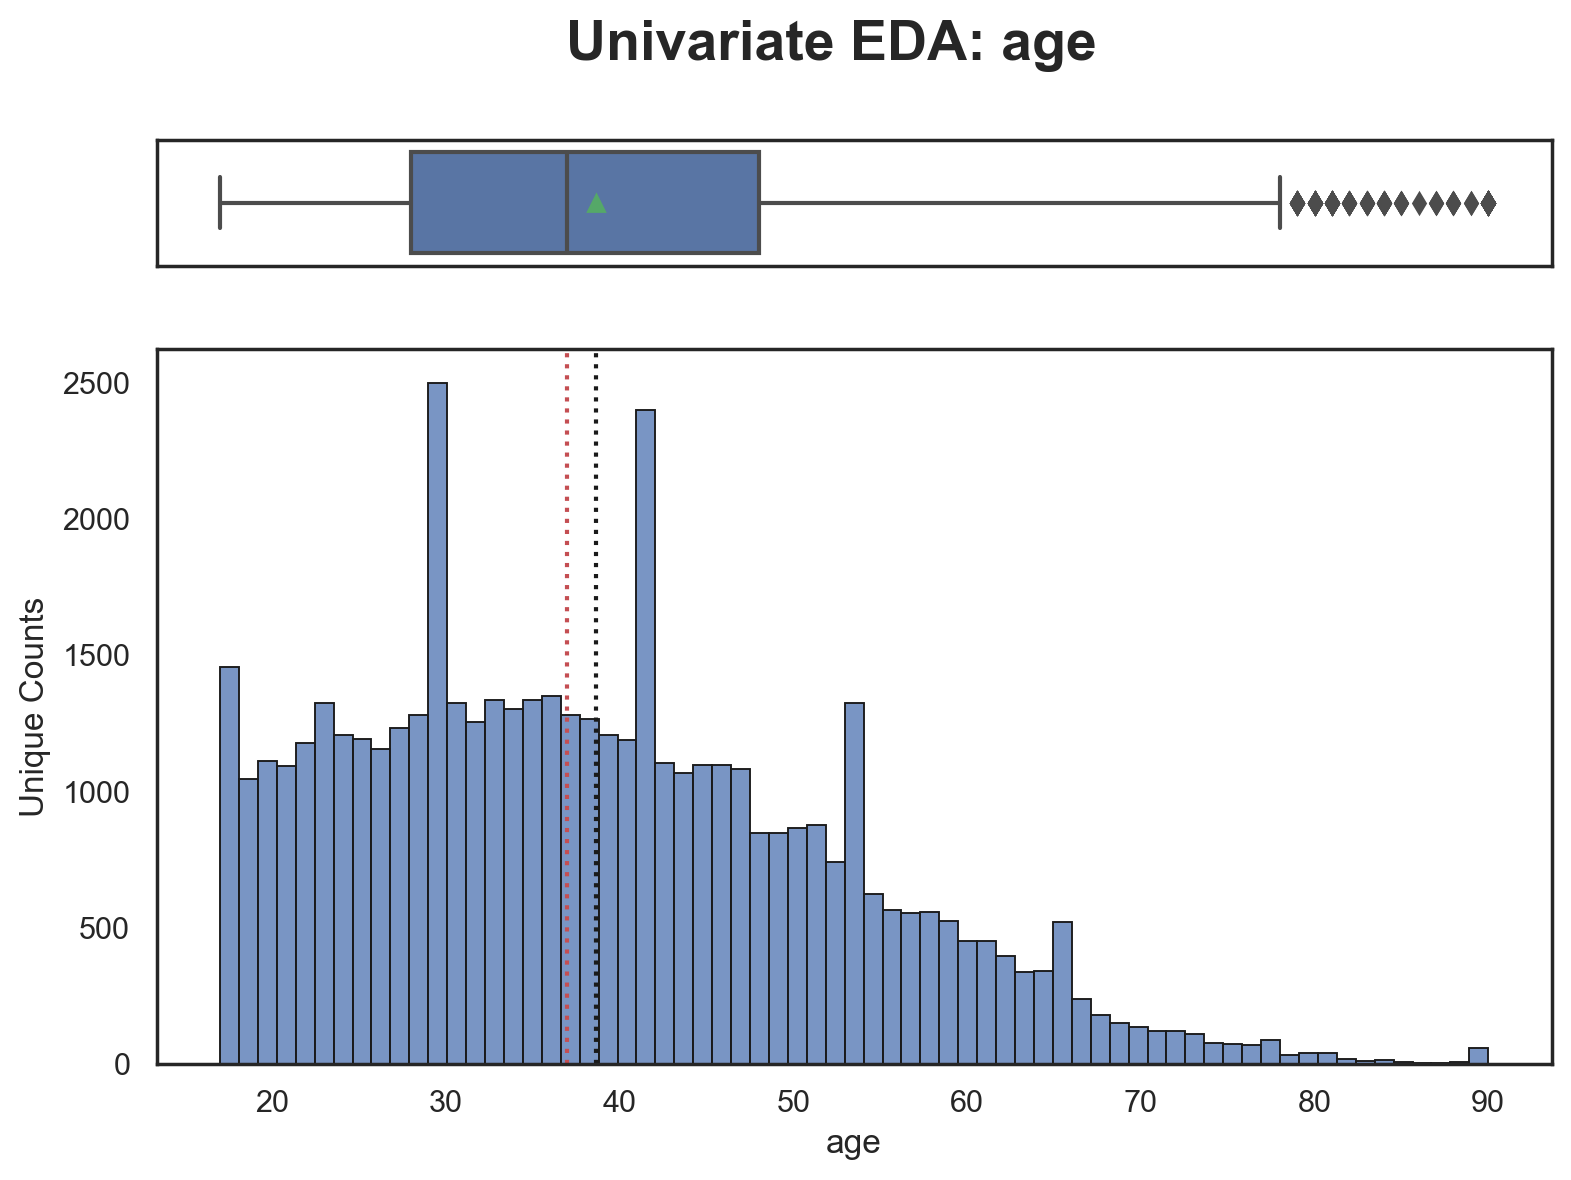

(<Figure size 900x600 with 2 Axes>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': ' '}, xlabel='age', ylabel='Unique Counts'>)

In [26]:
univariate_numerical_eda_udf (df_3, 'age')

## workclass

In [27]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'workclass', print_counts=10)


workclass: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 9 unique values.

Categorical Column: All Sorted Values (NaN first)


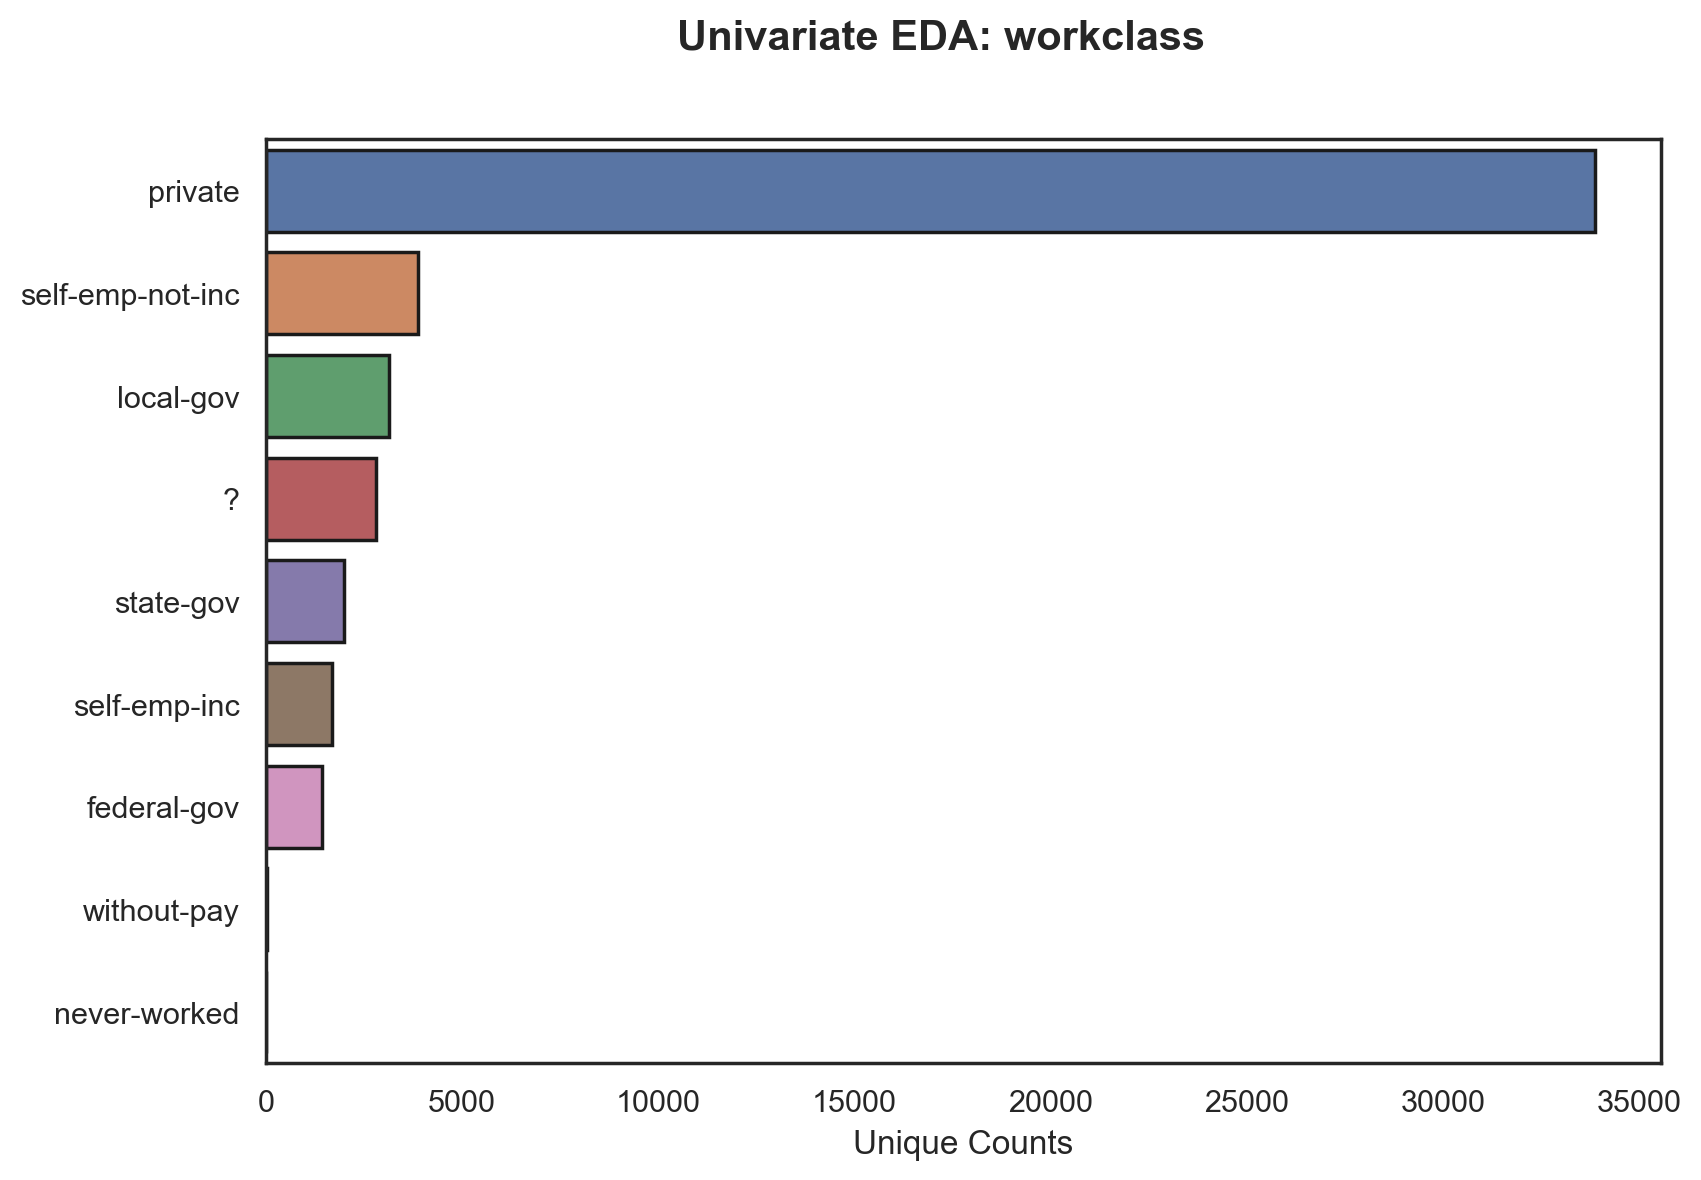

In [28]:
univariate_categorical_eda_udf (df_3, 'workclass')

In [29]:
df_3.groupby(['occupation', 'workclass'], dropna=False).aggregate({'workclass':'count'}, 
                margins=True,
                margins_name = 'Total Counts').\
sort_values(by='occupation', ascending=True).head(10).style.format('{:,.0f}').\
background_gradient(cmap='Blues').\
set_caption("Cross Tab Showing <strong>counts by occupation and workclass </strong>").\
set_table_styles([{'selector': 'caption',
                   'props':[('text-align', 'center'),
                            ('font-size', '150%'),
                            ('color', 'green')]}, 
                 {'selector' : 'th', 'props': [('border', '1px solid green')]}, # th is for the top and left column names/headers 
                 {'selector' : 'td', 'props': 'border-left: 1px solid black'},   # td is for the body where aggregation happens 
                 {'selector' : '', 'props': [('border', '1px solid black')]}])   # this is for the table border 

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. There is a bad value of "?". These should be encoded as "never worked" 

In [30]:
# replacing bad values
df_3['workclass'] = df_3['workclass'].replace({'?':'never-worked'})

In [31]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'workclass', print_counts=10)


workclass: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 8 unique values.

Categorical Column: All Sorted Values (NaN first)


## educational-num

In [32]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'educational-num', print_counts=10)


educational-num: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 16 unique values.

Categorical Column: All Sorted Values (NaN first)


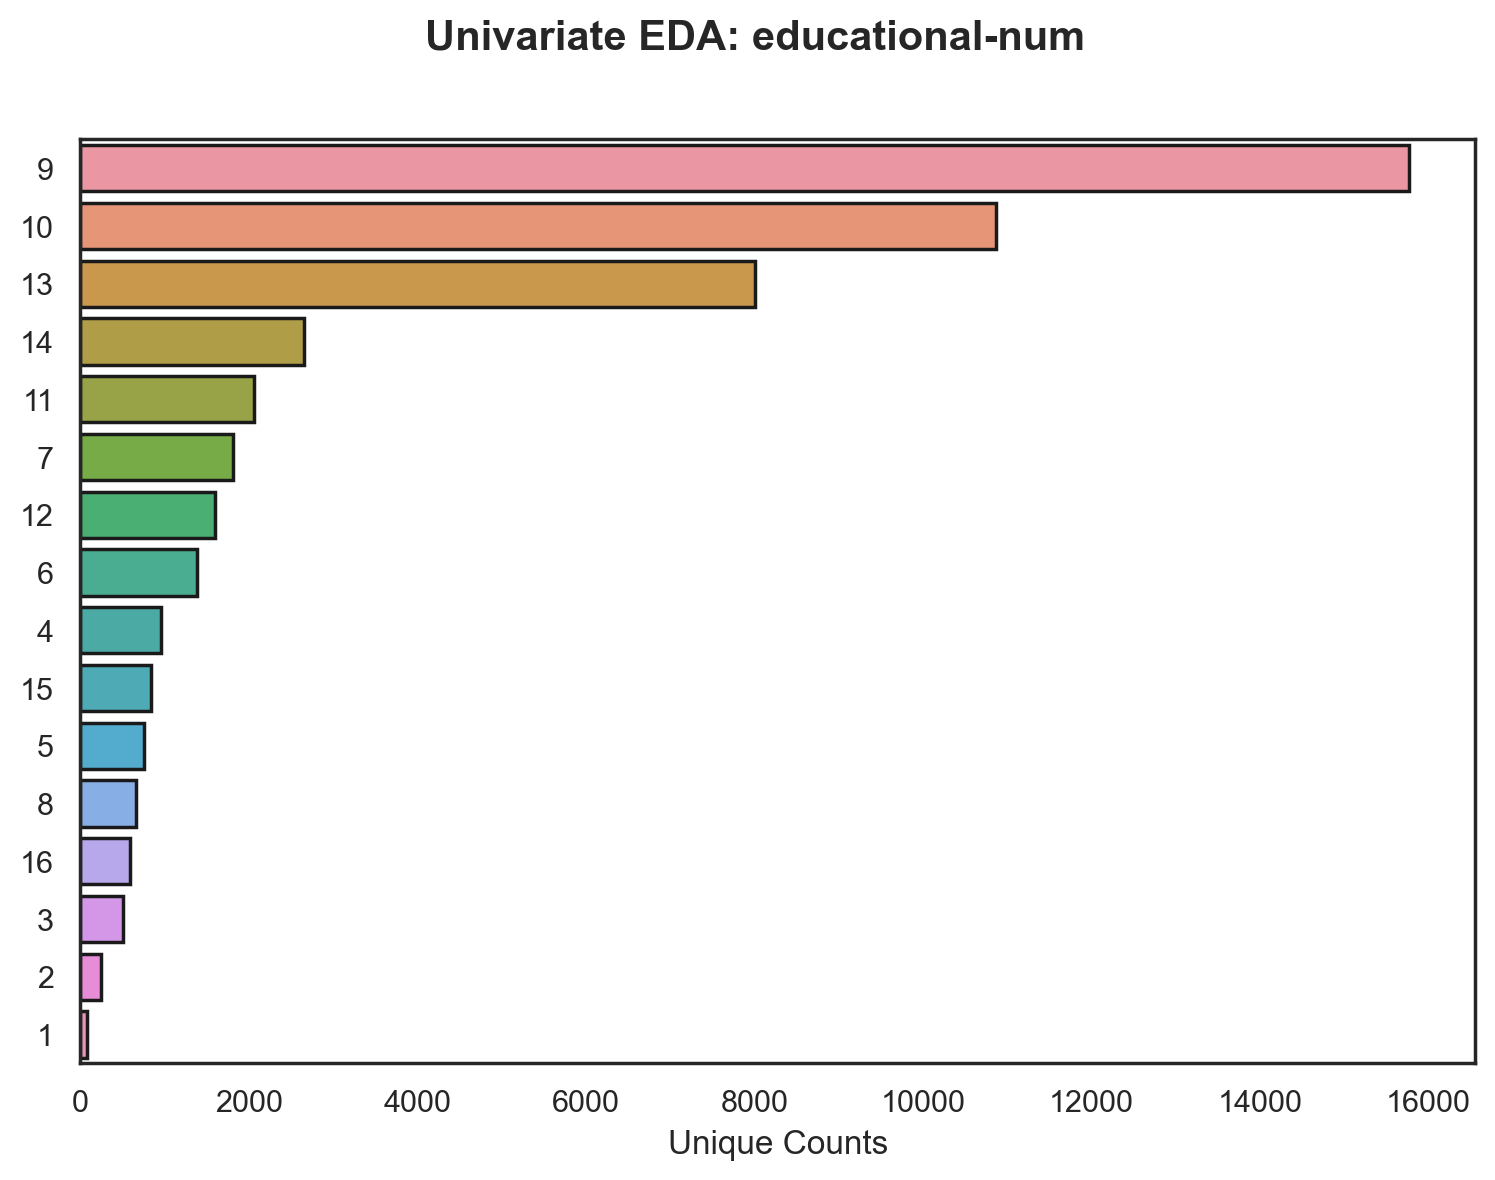

In [33]:
univariate_categorical_eda_udf (df_3, 'educational-num')

## marital-status

In [34]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'marital-status', print_counts=10)


marital-status: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 7 unique values.

Categorical Column: All Sorted Values (NaN first)


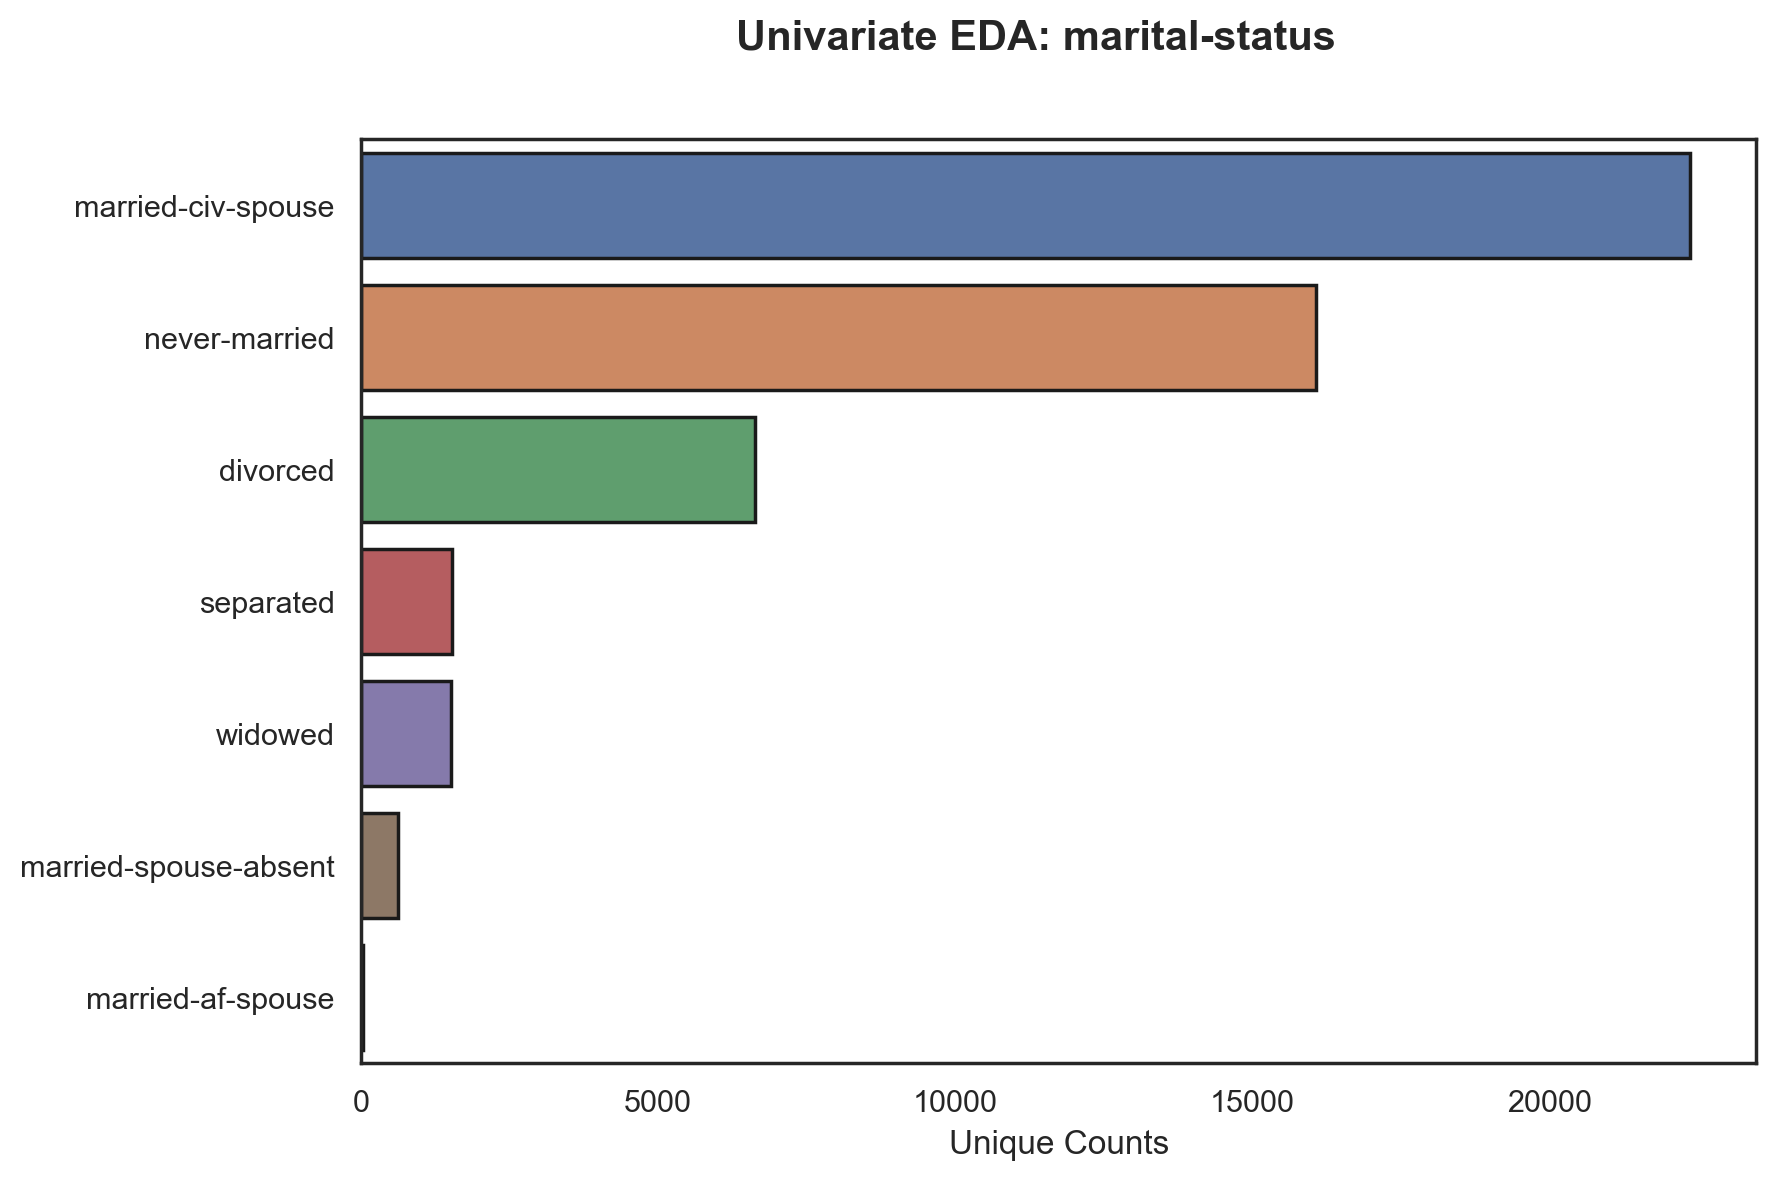

In [35]:
univariate_categorical_eda_udf (df_3, 'marital-status')

## occupation

In [36]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'occupation', print_counts=10)


occupation: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 15 unique values.

Categorical Column: All Sorted Values (NaN first)


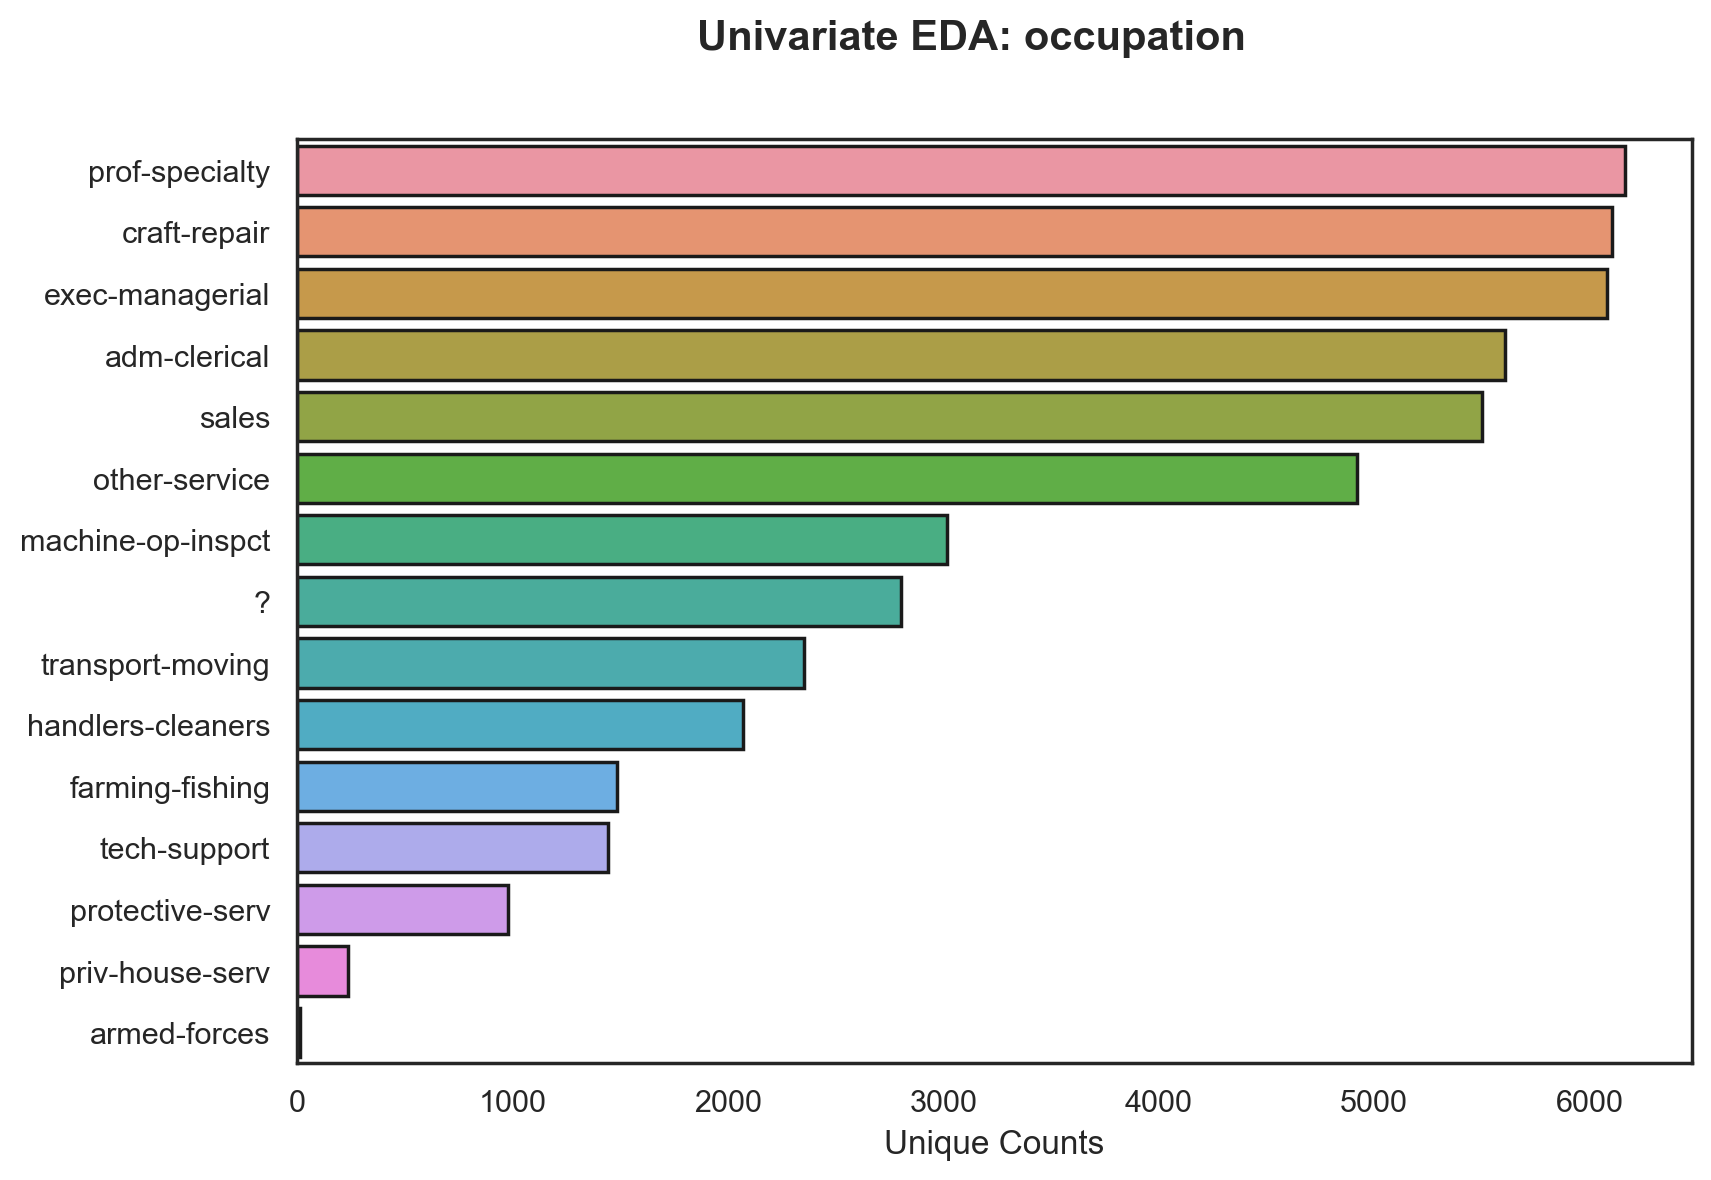

In [37]:
univariate_categorical_eda_udf (df_3, 'occupation')

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. Based on the results of the cross tab for workclass, the "?" values for occupation can be fixed as 'Never-worked"

In [38]:
# replacing bad values
df_3['occupation'] = df_3['occupation'].replace({'?':'never-worked'})

In [39]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'occupation', print_counts=10)


occupation: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 15 unique values.

Categorical Column: All Sorted Values (NaN first)


## race

In [40]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'race', print_counts=10)


race: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 5 unique values.

Categorical Column: All Sorted Values (NaN first)


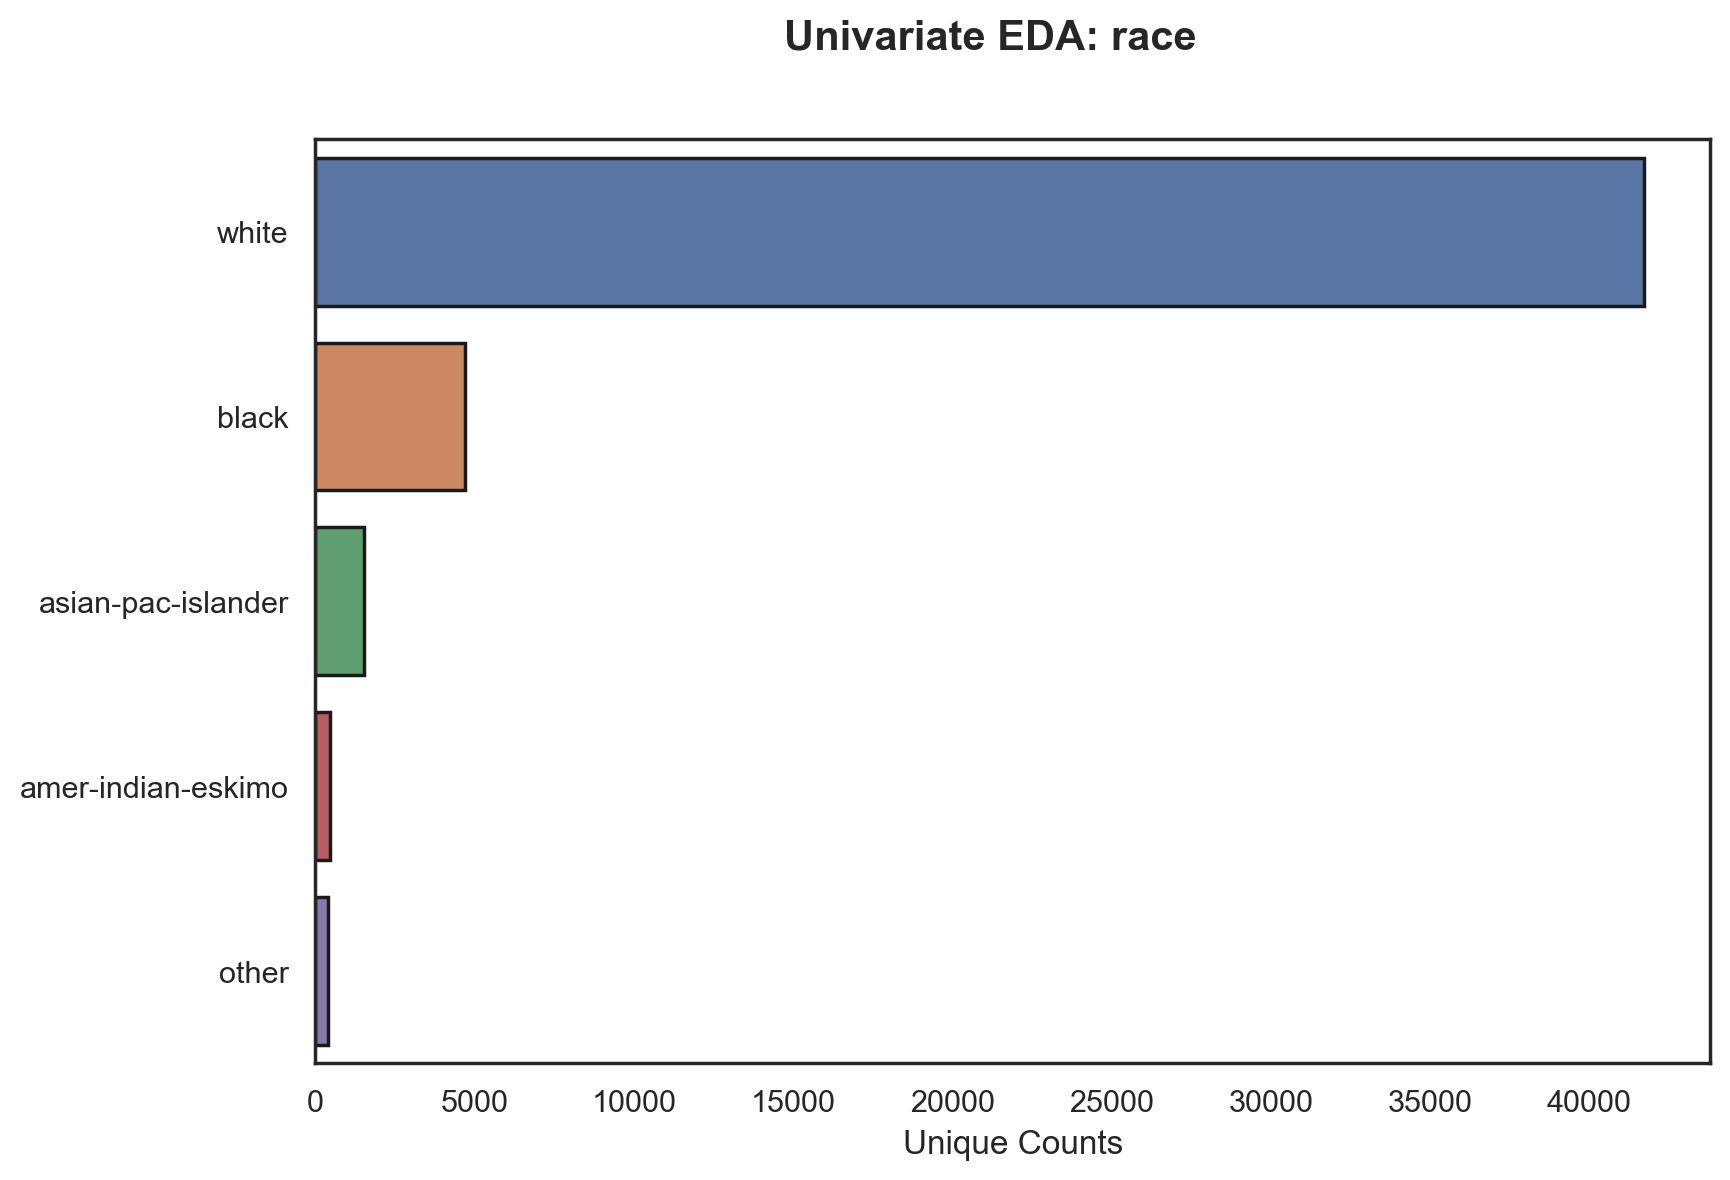

In [41]:
univariate_categorical_eda_udf (df_3, 'race')

## gender

In [42]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'gender', print_counts=10)


gender: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 2 unique values.

Categorical Column: All Sorted Values (NaN first)


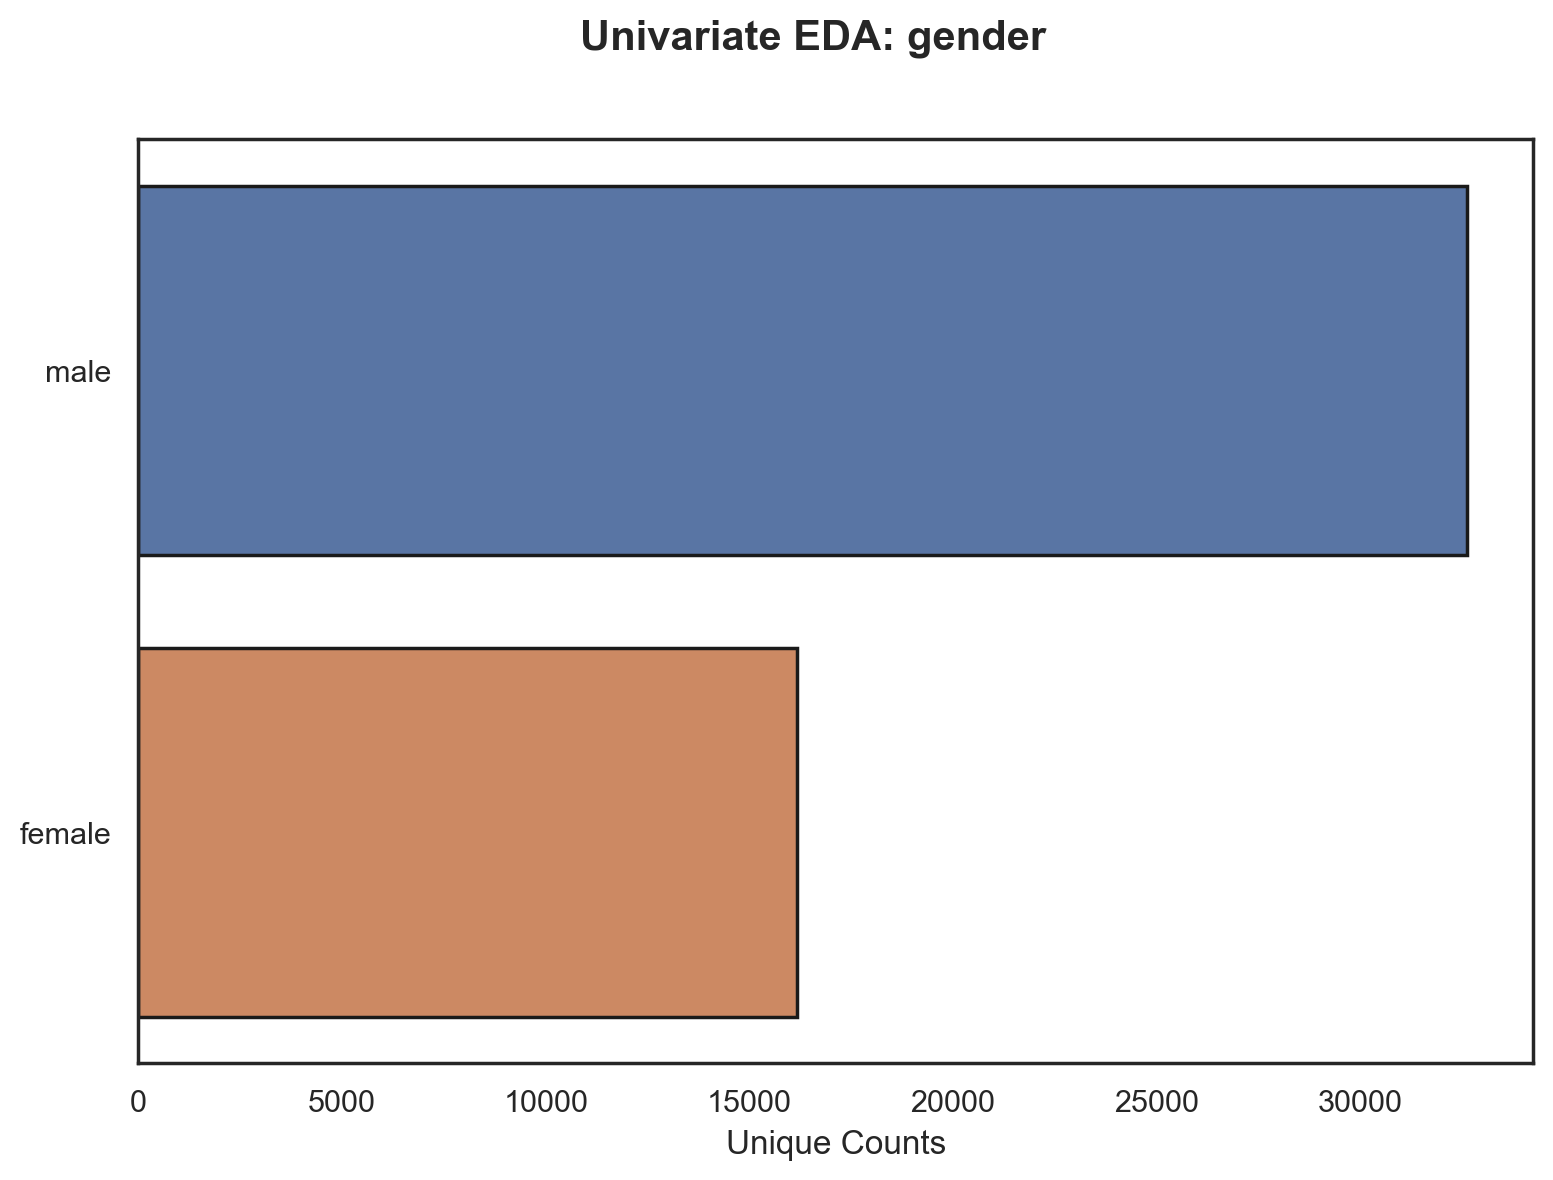

In [43]:
univariate_categorical_eda_udf (df_3, 'gender')

## capital-gain

In [44]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'capital-gain', print_counts=10)


capital-gain: High Level Profile
Data type: int64.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Numerical Column: Additional Metrics
Total Outlier Counts: 4,035.
Low limit is: 0 with 0 (0.0%) below this.
High limit is: 0 with 4,035 (827.0%) above this limit

Numerical Column: 10 Sorted Values (NaN first) 


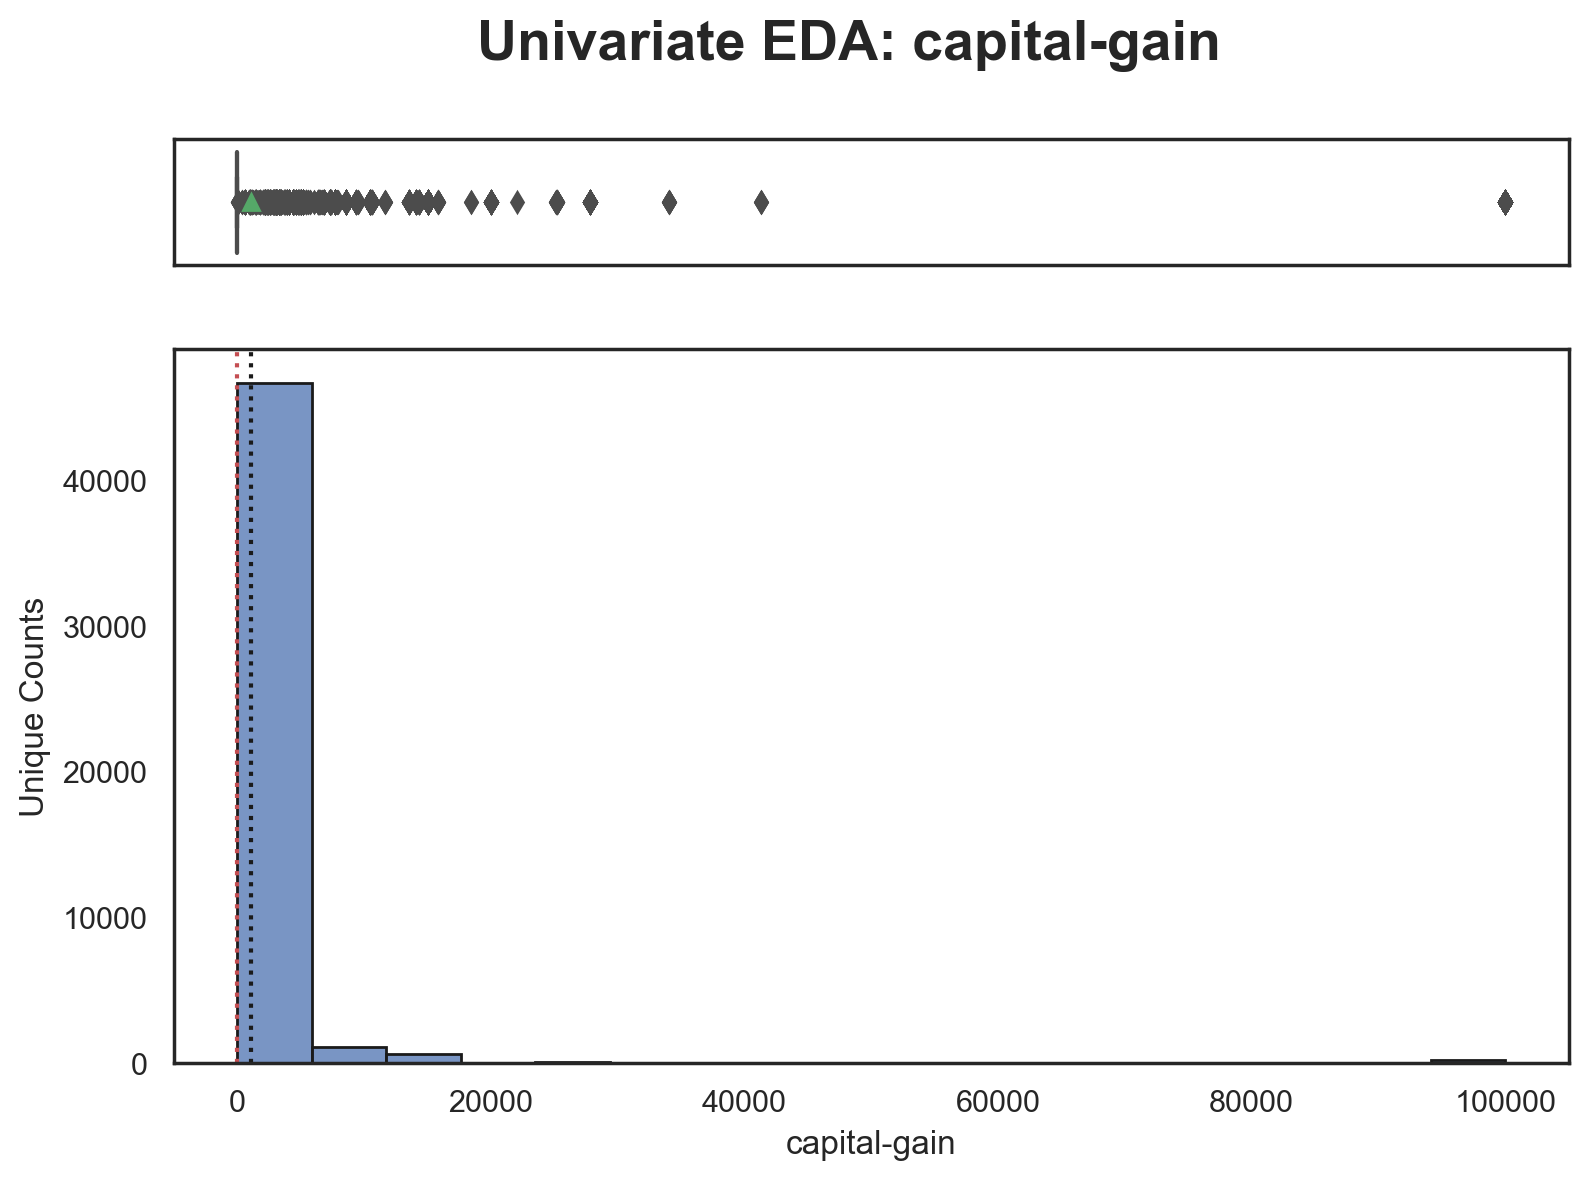

(<Figure size 900x600 with 2 Axes>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': ' '}, xlabel='capital-gain', ylabel='Unique Counts'>)

In [45]:
univariate_numerical_eda_udf (df_3, 'capital-gain')

## capital-loss

In [46]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'capital-loss', print_counts=10)


capital-loss: High Level Profile
Data type: int64.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Numerical Column: Additional Metrics
Total Outlier Counts: 2,282.
Low limit is: 0 with 0 (0.0%) below this.
High limit is: 0 with 2,282 (467.7%) above this limit

Numerical Column: 10 Sorted Values (NaN first) 


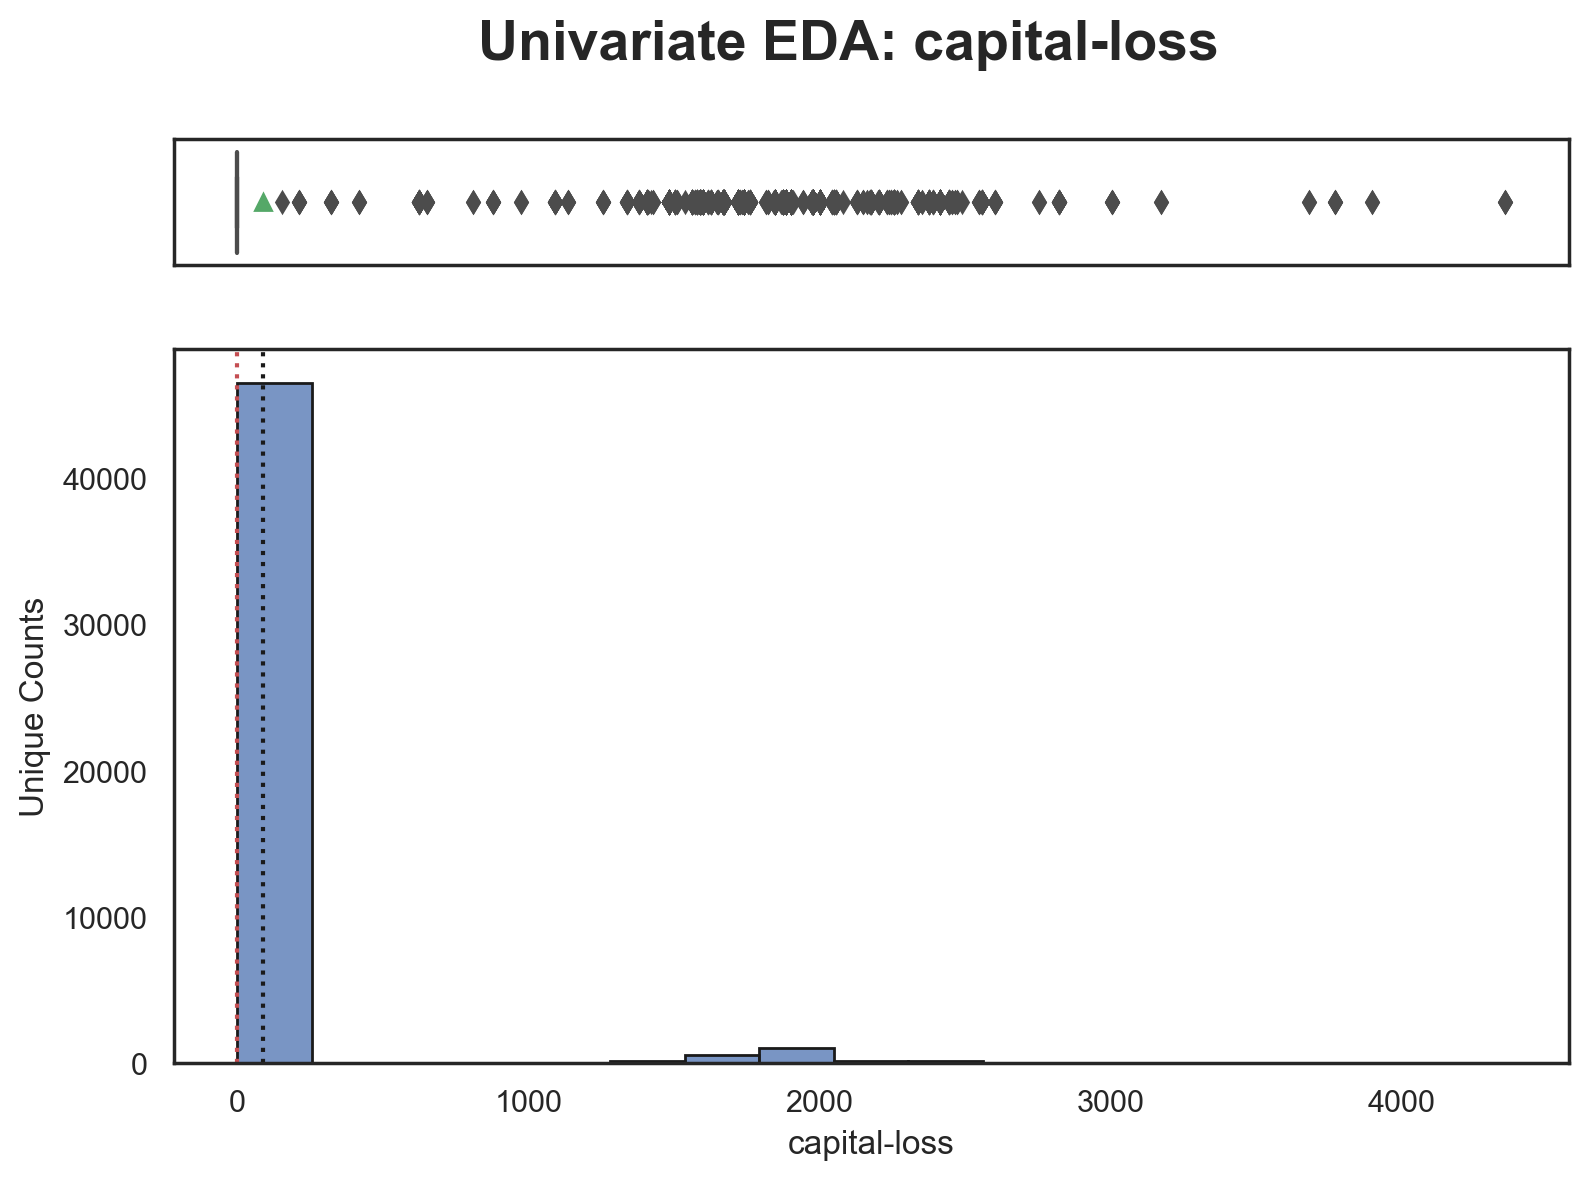

(<Figure size 900x600 with 2 Axes>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': ' '}, xlabel='capital-loss', ylabel='Unique Counts'>)

In [47]:
univariate_numerical_eda_udf (df_3, 'capital-loss')

## hours-per-week

In [48]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'hours-per-week', print_counts=10)


hours-per-week: High Level Profile
Data type: int64.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Numerical Column: Additional Metrics
Total Outlier Counts: 13,486.
Low limit is: 32 with 8,277 (1696.5%) below this.
High limit is: 52 with 5,209 (1067.6%) above this limit

Numerical Column: 10 Sorted Values (NaN first) 


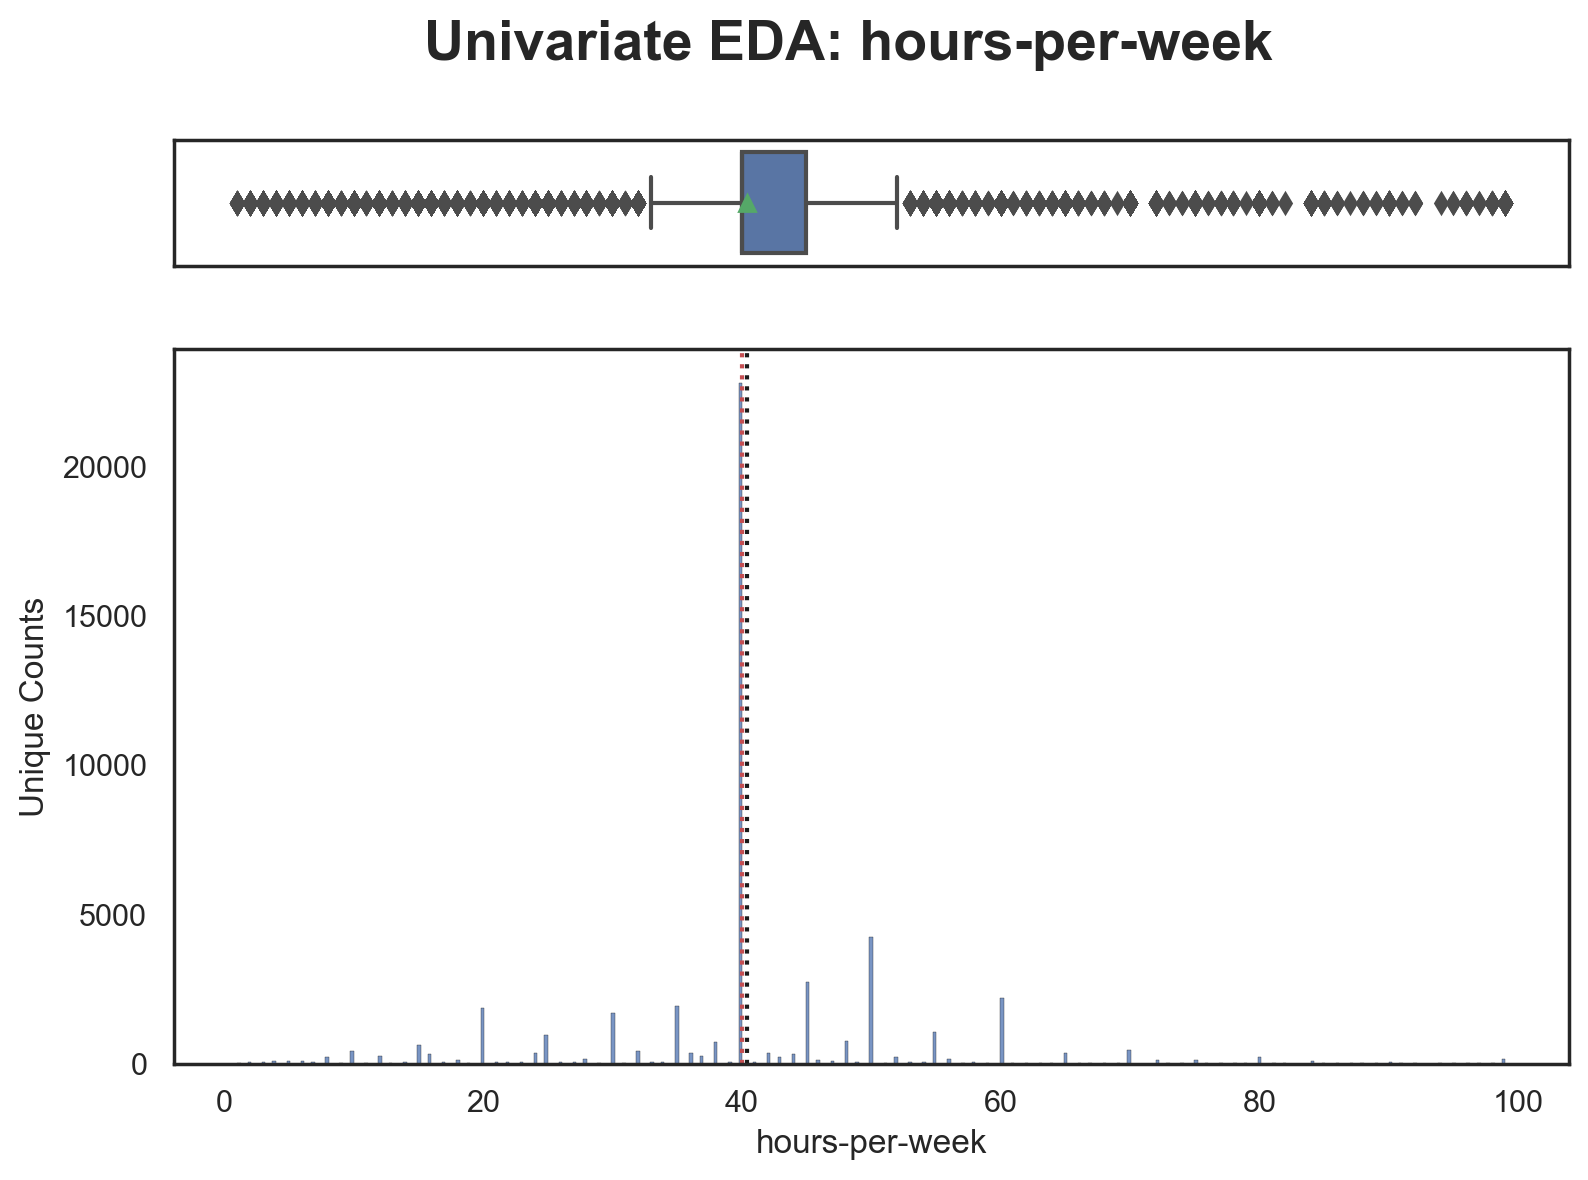

(<Figure size 900x600 with 2 Axes>,
 <AxesSubplot: >,
 <AxesSubplot: title={'center': ' '}, xlabel='hours-per-week', ylabel='Unique Counts'>)

In [49]:
univariate_numerical_eda_udf (df_3, 'hours-per-week')

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Huge amount of Outliers detected 

## native-country

In [50]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'native-country', print_counts=10)


native-country: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 42 unique values.

Categorical Column: All Sorted Values (NaN first)


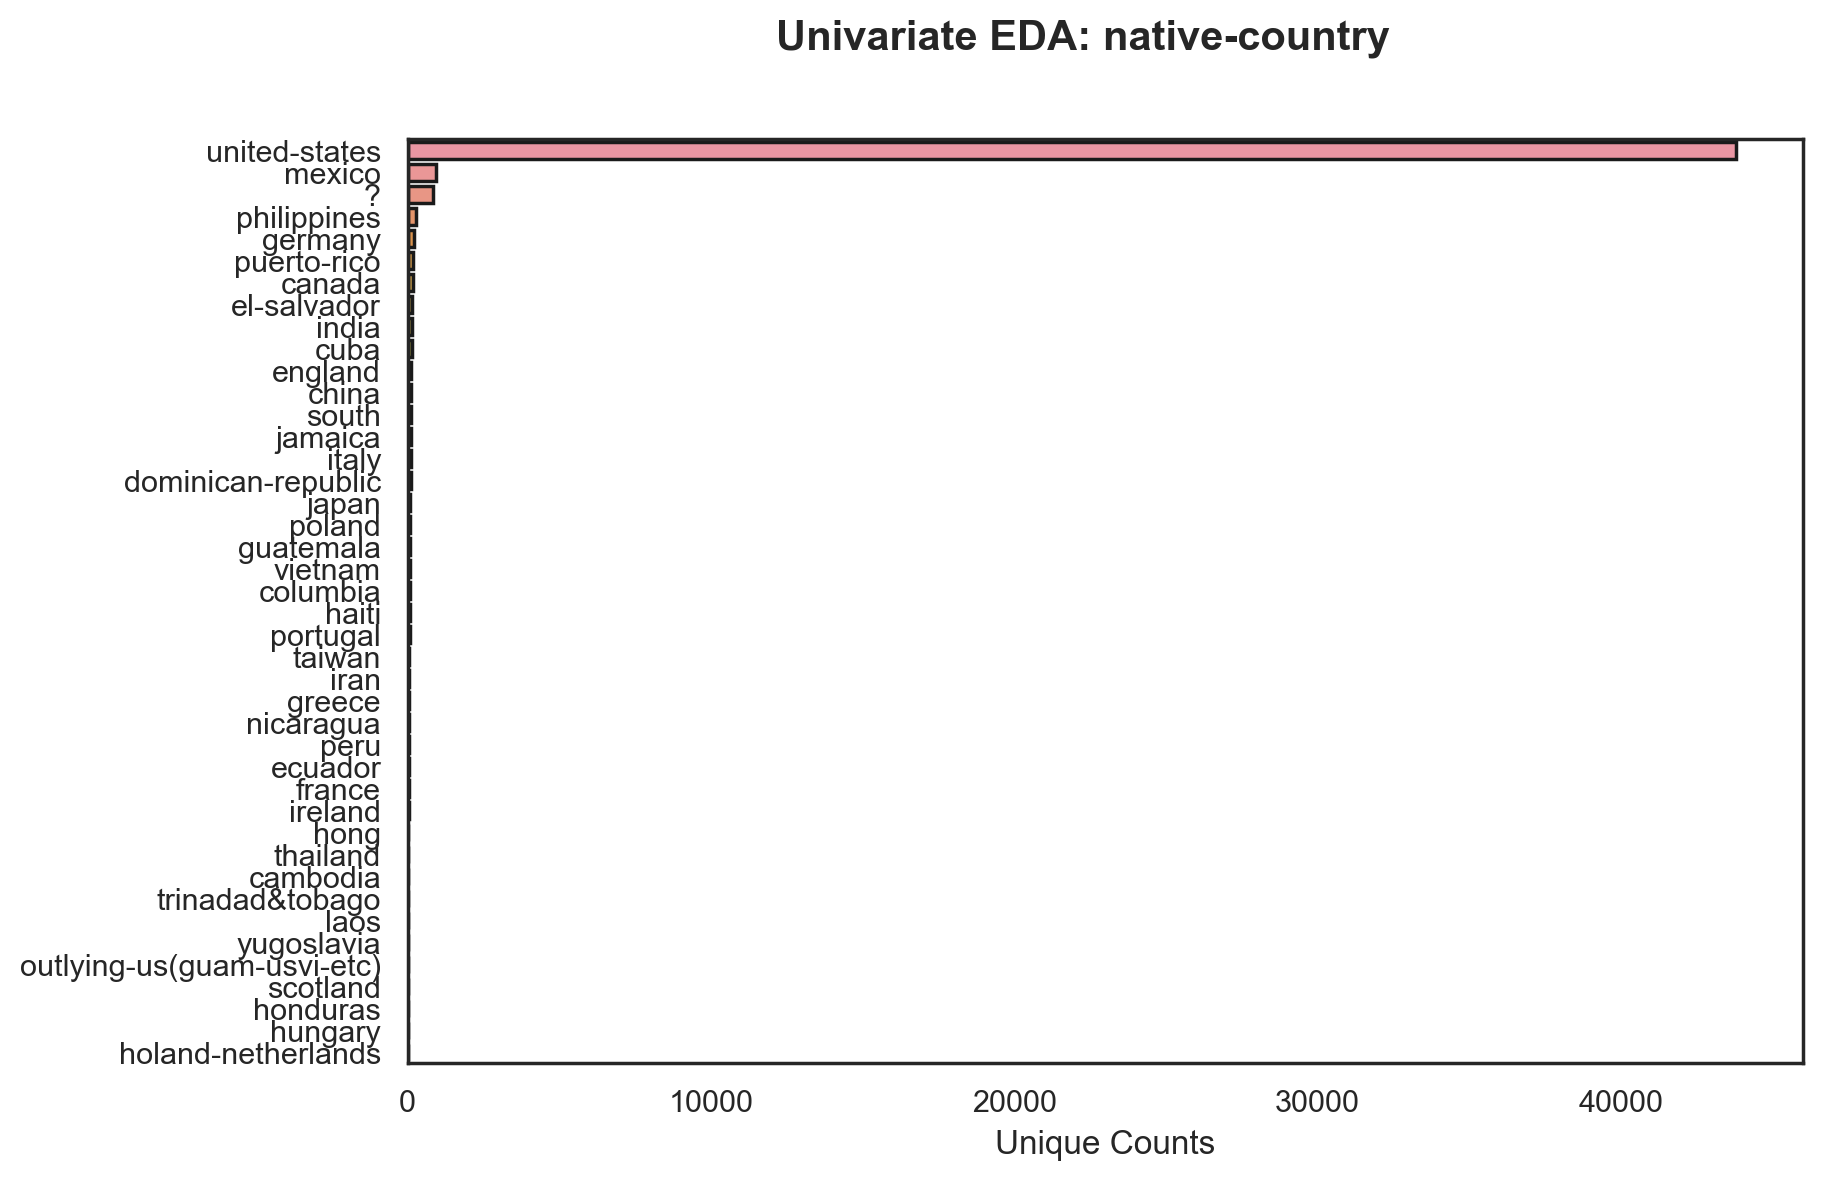

In [51]:
univariate_categorical_eda_udf (df_3, 'native-country')

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Changing bad value of "?" to the most frequent value which is United States

In [52]:
# replacing bad values
df_3['native-country'] = df_3['native-country'].replace({'?':'united-states'})

In [53]:
# qa
column_profile_udf (df_3, 'native-country', print_counts=10)


native-country: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 41 unique values.

Categorical Column: All Sorted Values (NaN first)


## income

In [54]:
# USAGE NOTES
# 1. Column name should have ''

column_profile_udf (df_3, 'income', print_counts=10)


income: High Level Profile
Data type: object.
Total rows: 48,790.
Missing values: 0 (0.0%).
 
Categorical Column: Additional Metrics
There are a total of 2 unique values.

Categorical Column: All Sorted Values (NaN first)


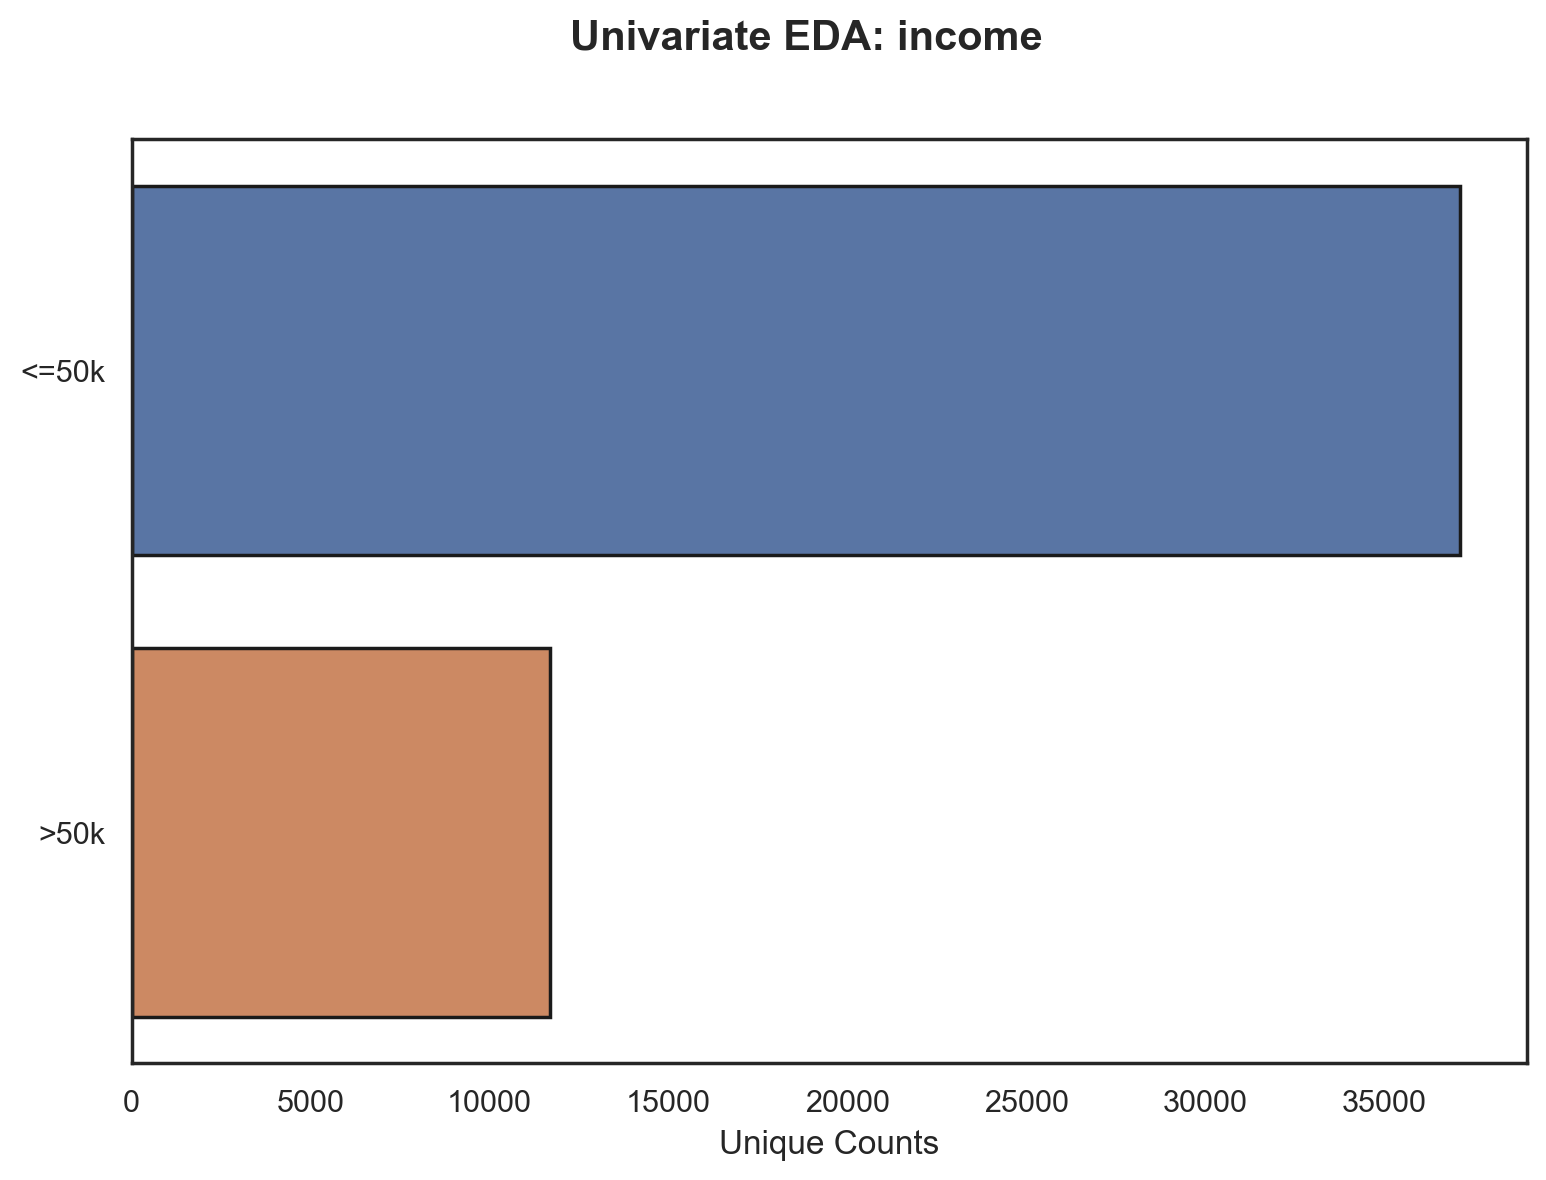

In [55]:
univariate_categorical_eda_udf (df_3, 'income')

<h1 style="color:green"><b>Missing values</b> </h1> 

In [56]:
# overall counts and missing values in the data frame
missing_values_udf (df_3)

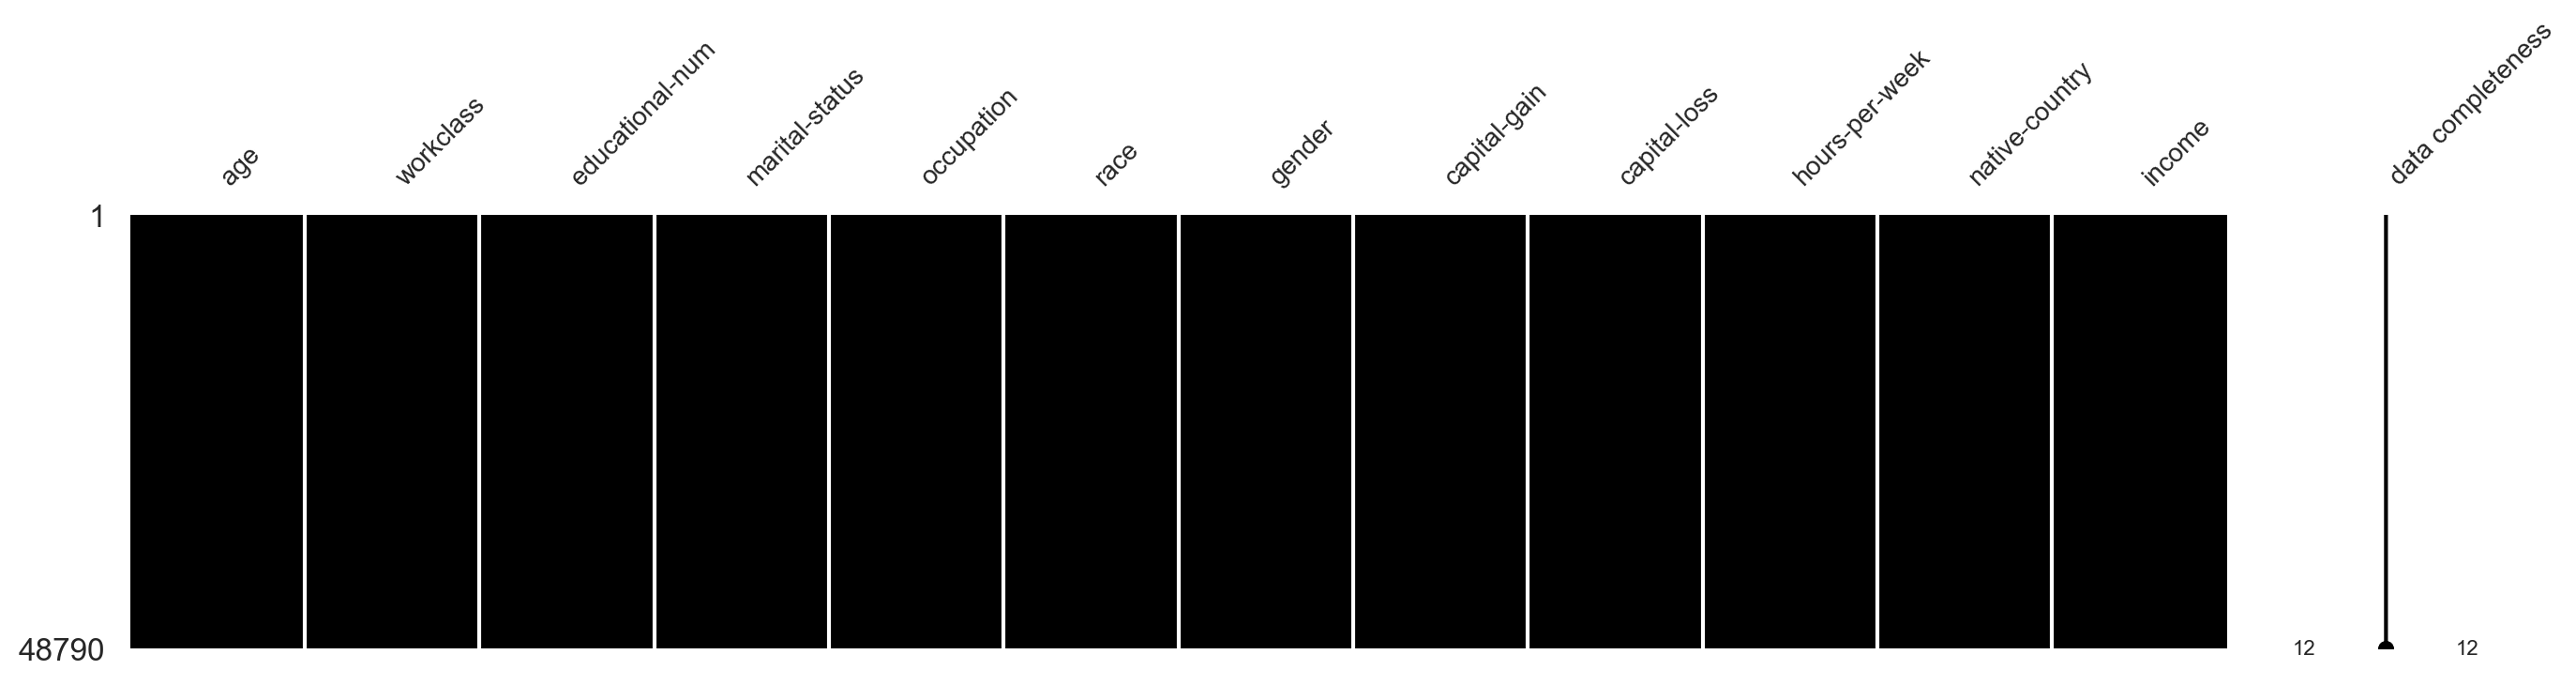

In [57]:
# Display missing values by column
msno.matrix(df_3, figsize=(16,3), labels=True, 
            fontsize=10, sort="descending", color=(0,0,0));

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

No missing values in exploration dataset

<h1 style="color:green"><b>Exploratory Analysis</b> </h1> 

## age & income 

<AxesSubplot: xlabel='income', ylabel='age'>

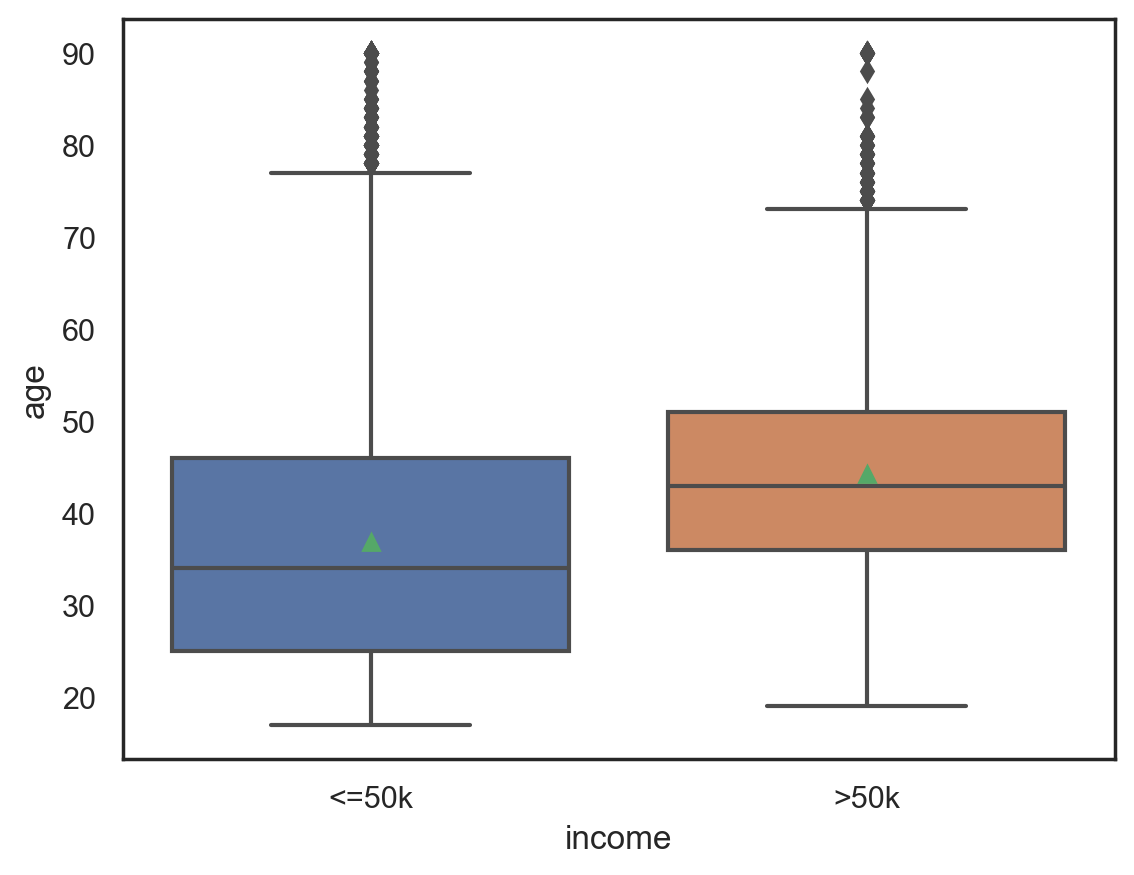

In [58]:
sns.boxplot(data=df_3, x = 'income', y='age', showmeans=True)

## capital-gain & income 

<AxesSubplot: xlabel='income', ylabel='capital-gain'>

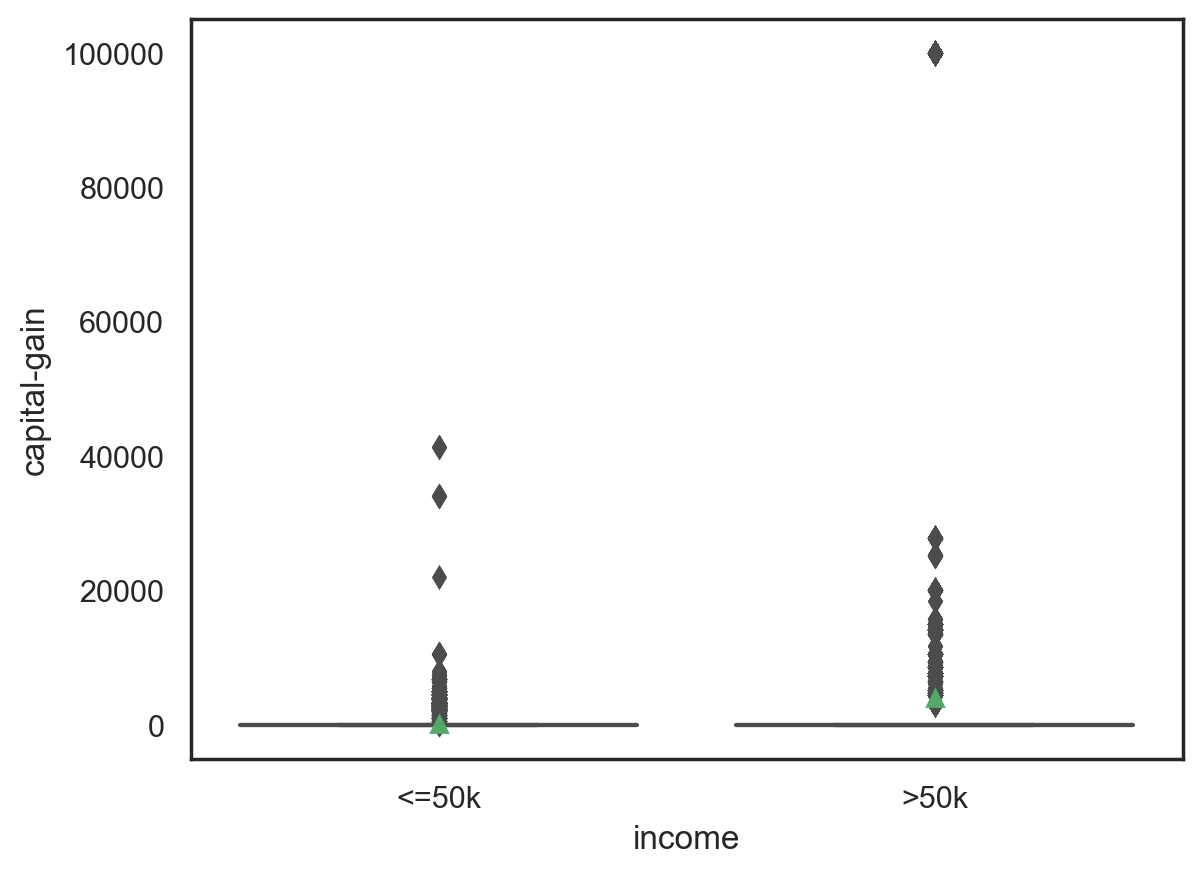

In [59]:
sns.boxplot(data=df_3, x = 'income', y='capital-gain', showmeans=True)

## capital-loss & income 

<AxesSubplot: xlabel='income', ylabel='capital-loss'>

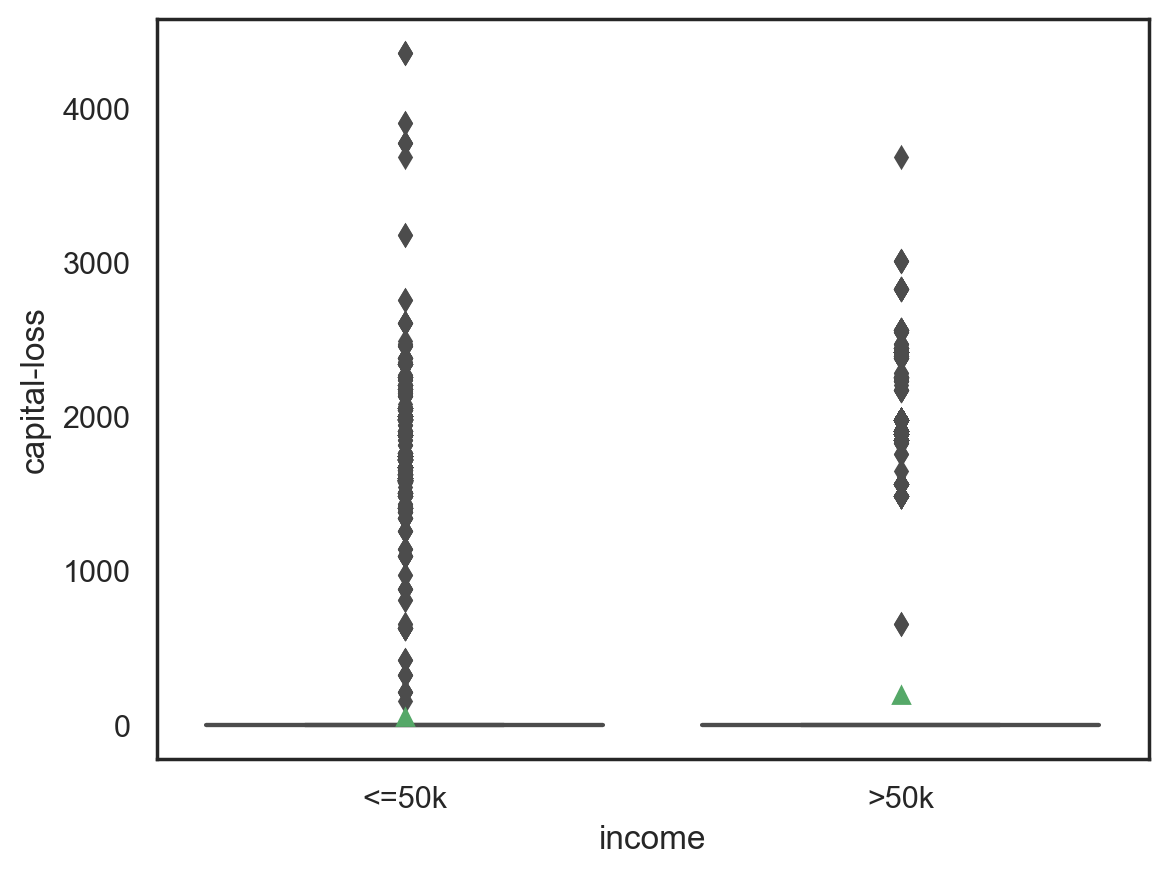

In [60]:
sns.boxplot(data=df_3, x = 'income', y='capital-loss', showmeans=True)

## hours per week & income

<AxesSubplot: xlabel='income', ylabel='hours-per-week'>

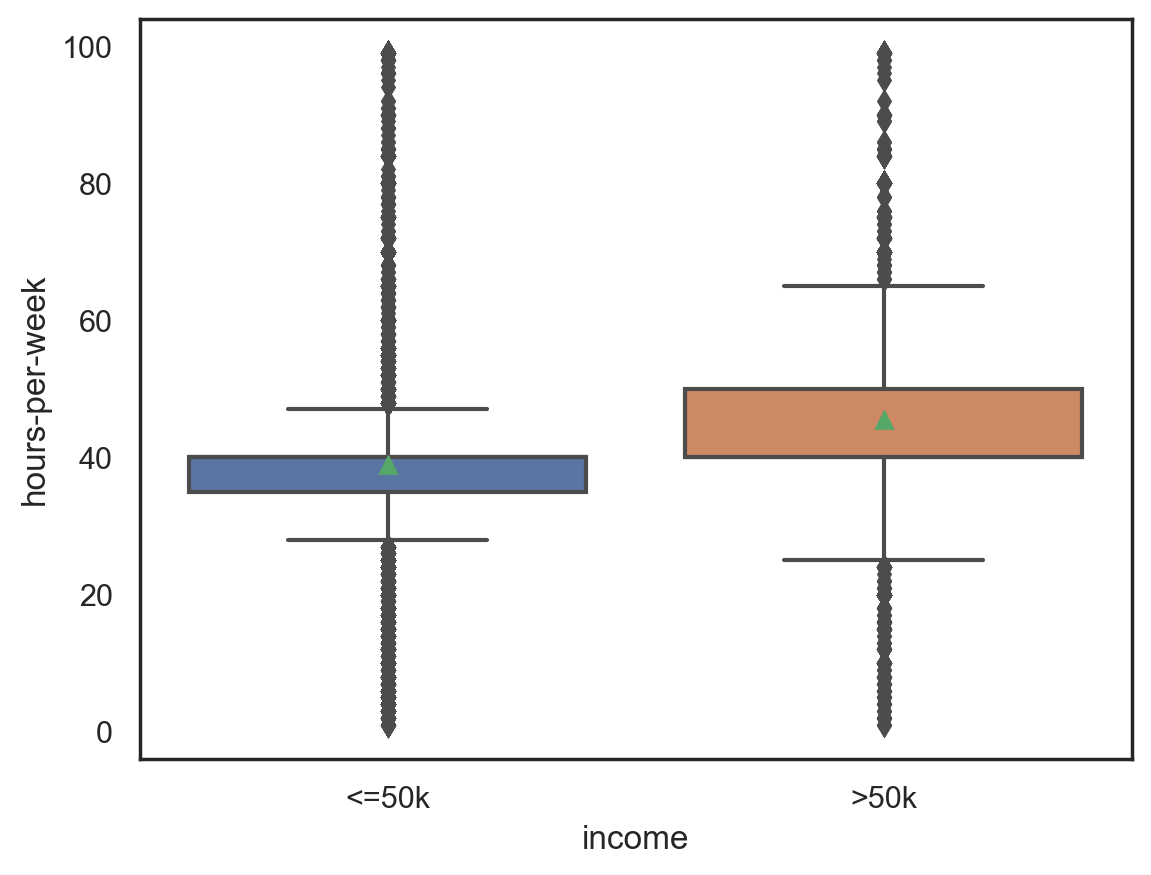

In [61]:
sns.boxplot(data=df_3, x = 'income', y='hours-per-week', showmeans=True)

## workclass & income

<AxesSubplot: xlabel='workclass', ylabel='Count'>

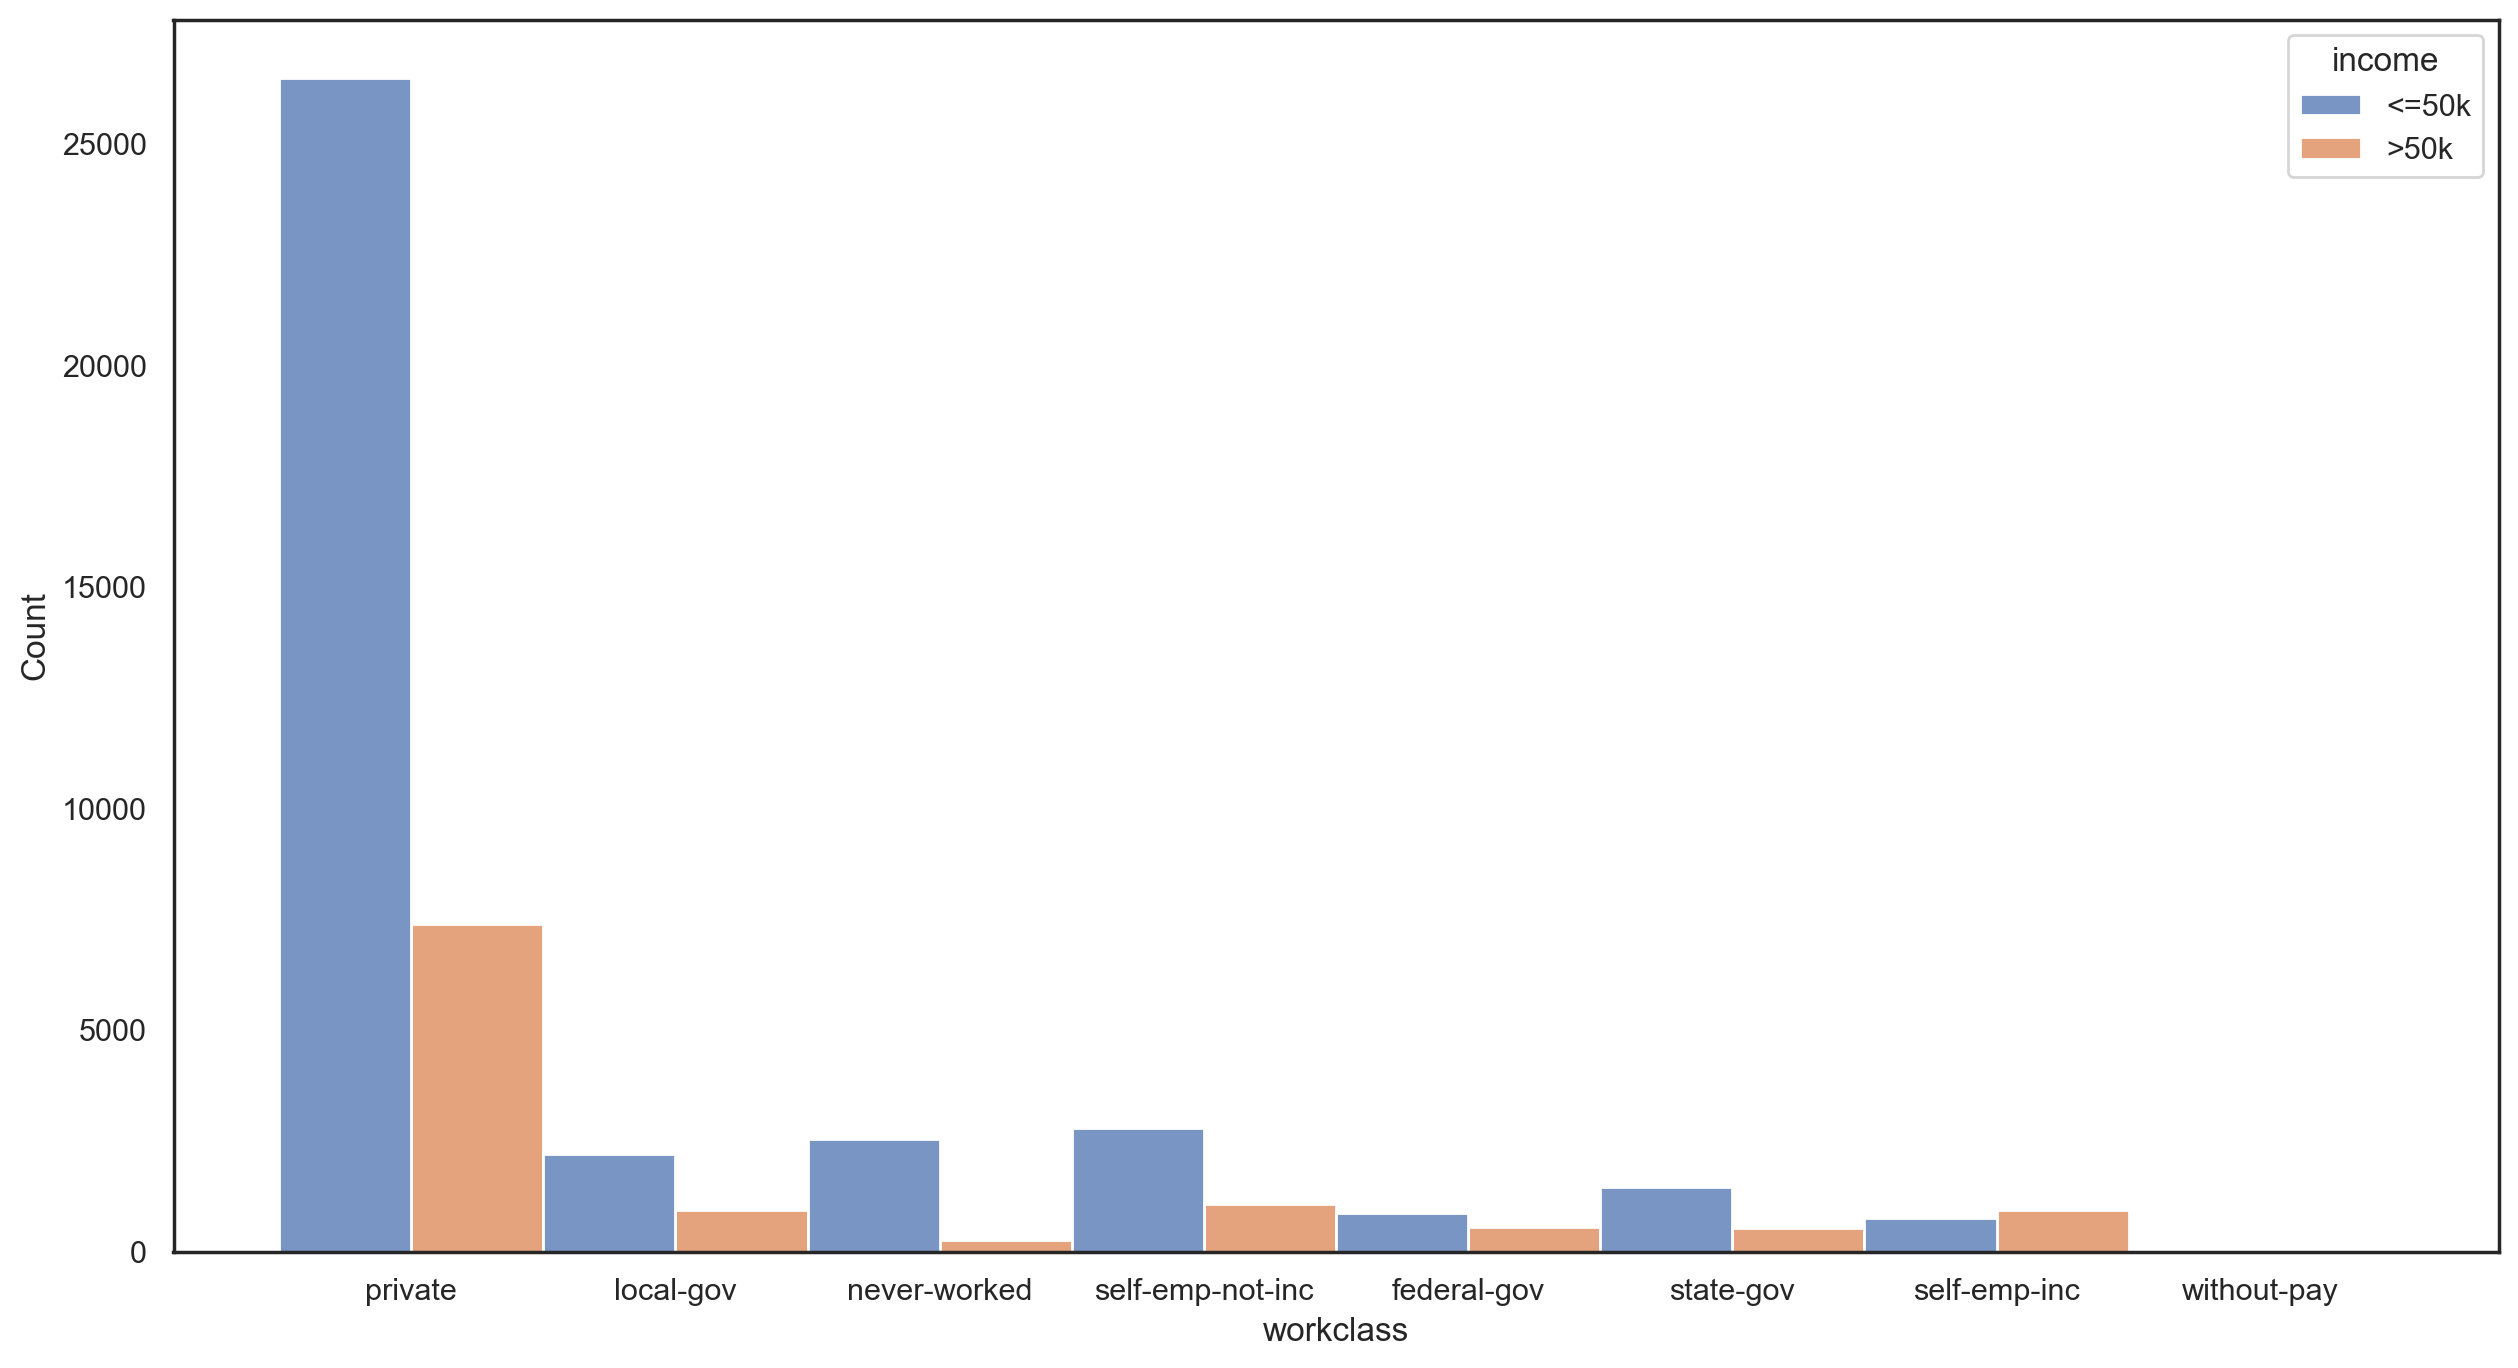

In [62]:
plt.figure(figsize=(15,8))
sns.histplot(binwidth=1,
            x='workclass',
            hue='income',
            data=df_3,
            stat="count",
            multiple="dodge")

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

In the sample the people working in the private sector make the most income 

## education number & income

<AxesSubplot: xlabel='educational-num', ylabel='Count'>

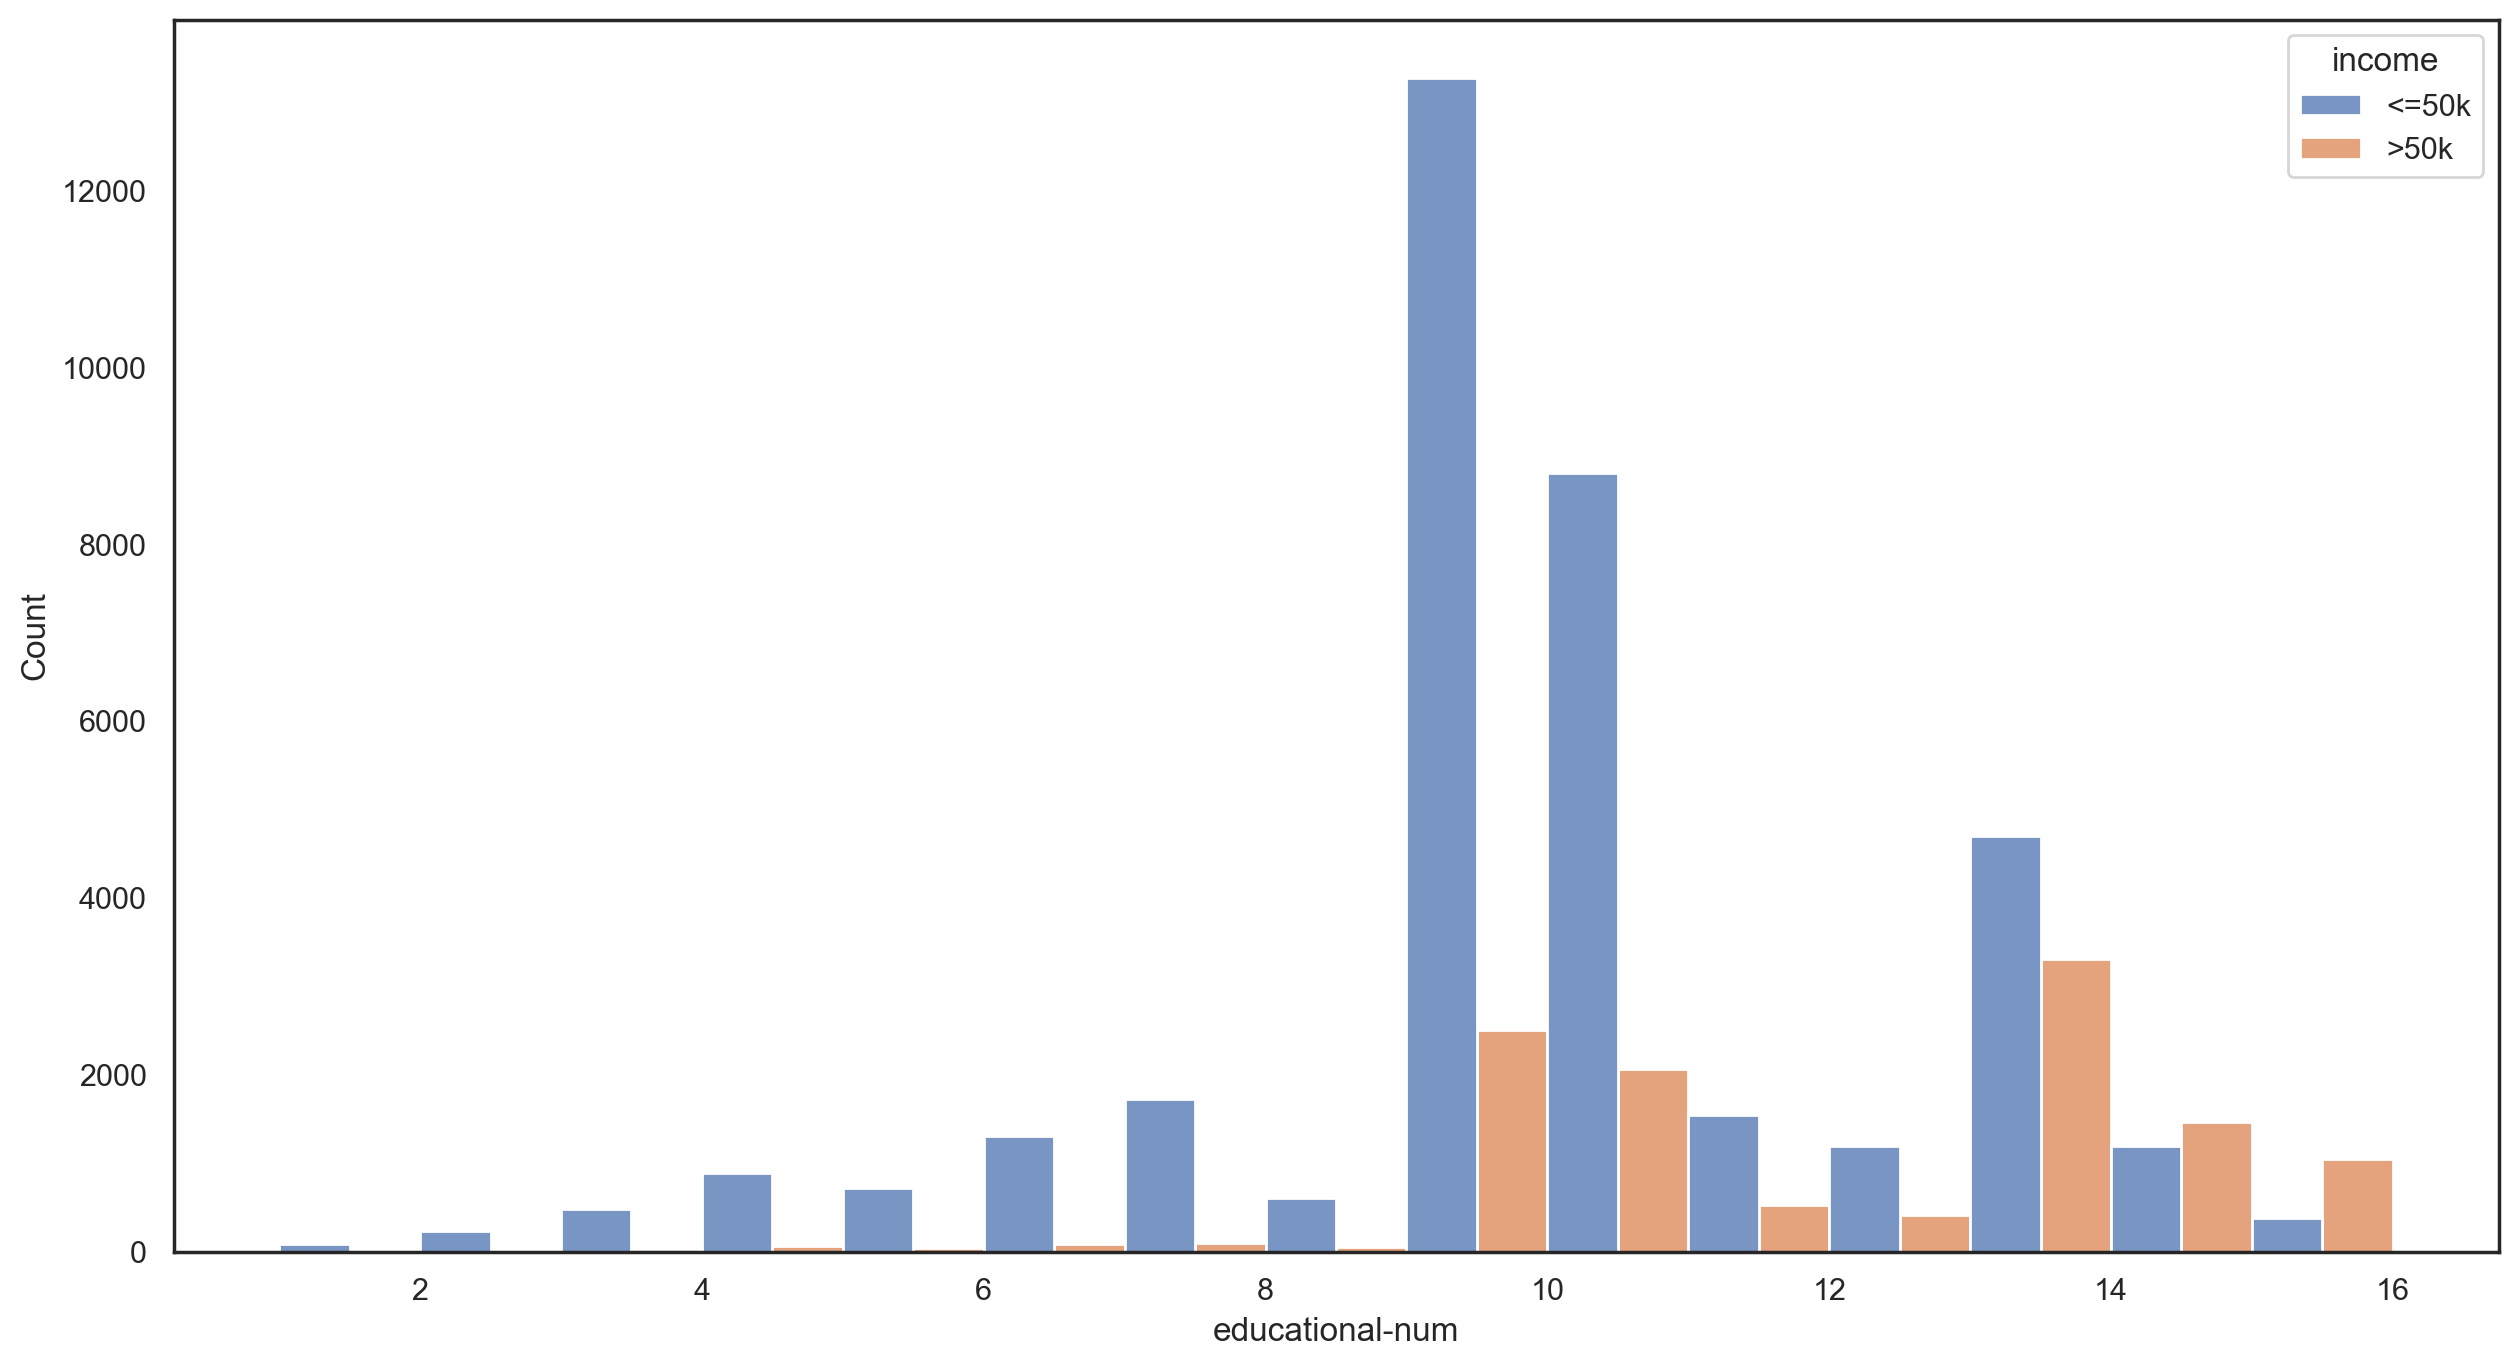

In [63]:
plt.figure(figsize=(15,8))
sns.histplot(binwidth=1,
            x='educational-num',
            hue='income',
            data=df_3,
            stat="count",
            multiple="dodge")

## marital status & income

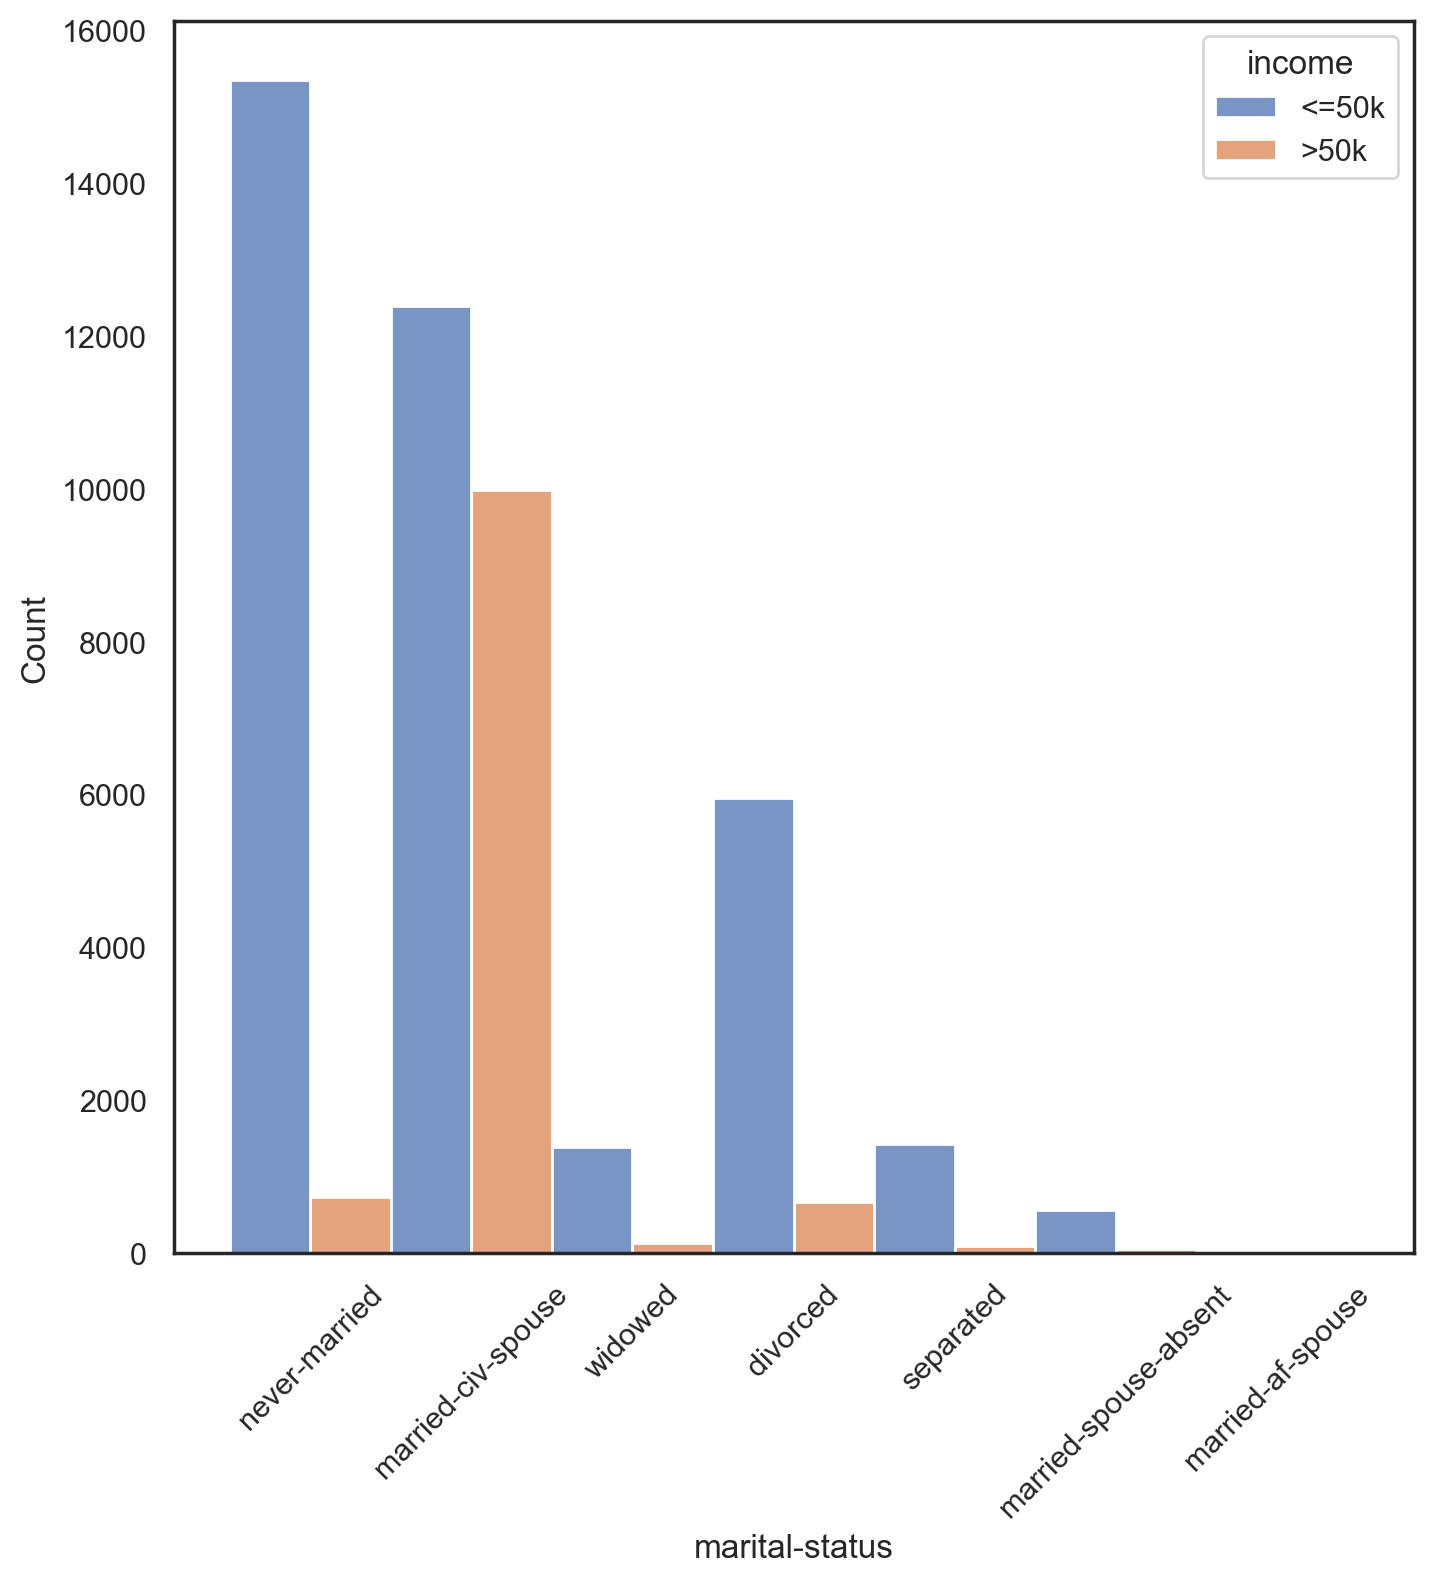

In [64]:
plt.figure(figsize=(8,8))
sns.histplot(binwidth=1,
            x='marital-status',
            hue='income',
            data=df_3,
            stat="count",
            multiple="dodge")
a = plt.xticks(rotation=45)

## occupation & income

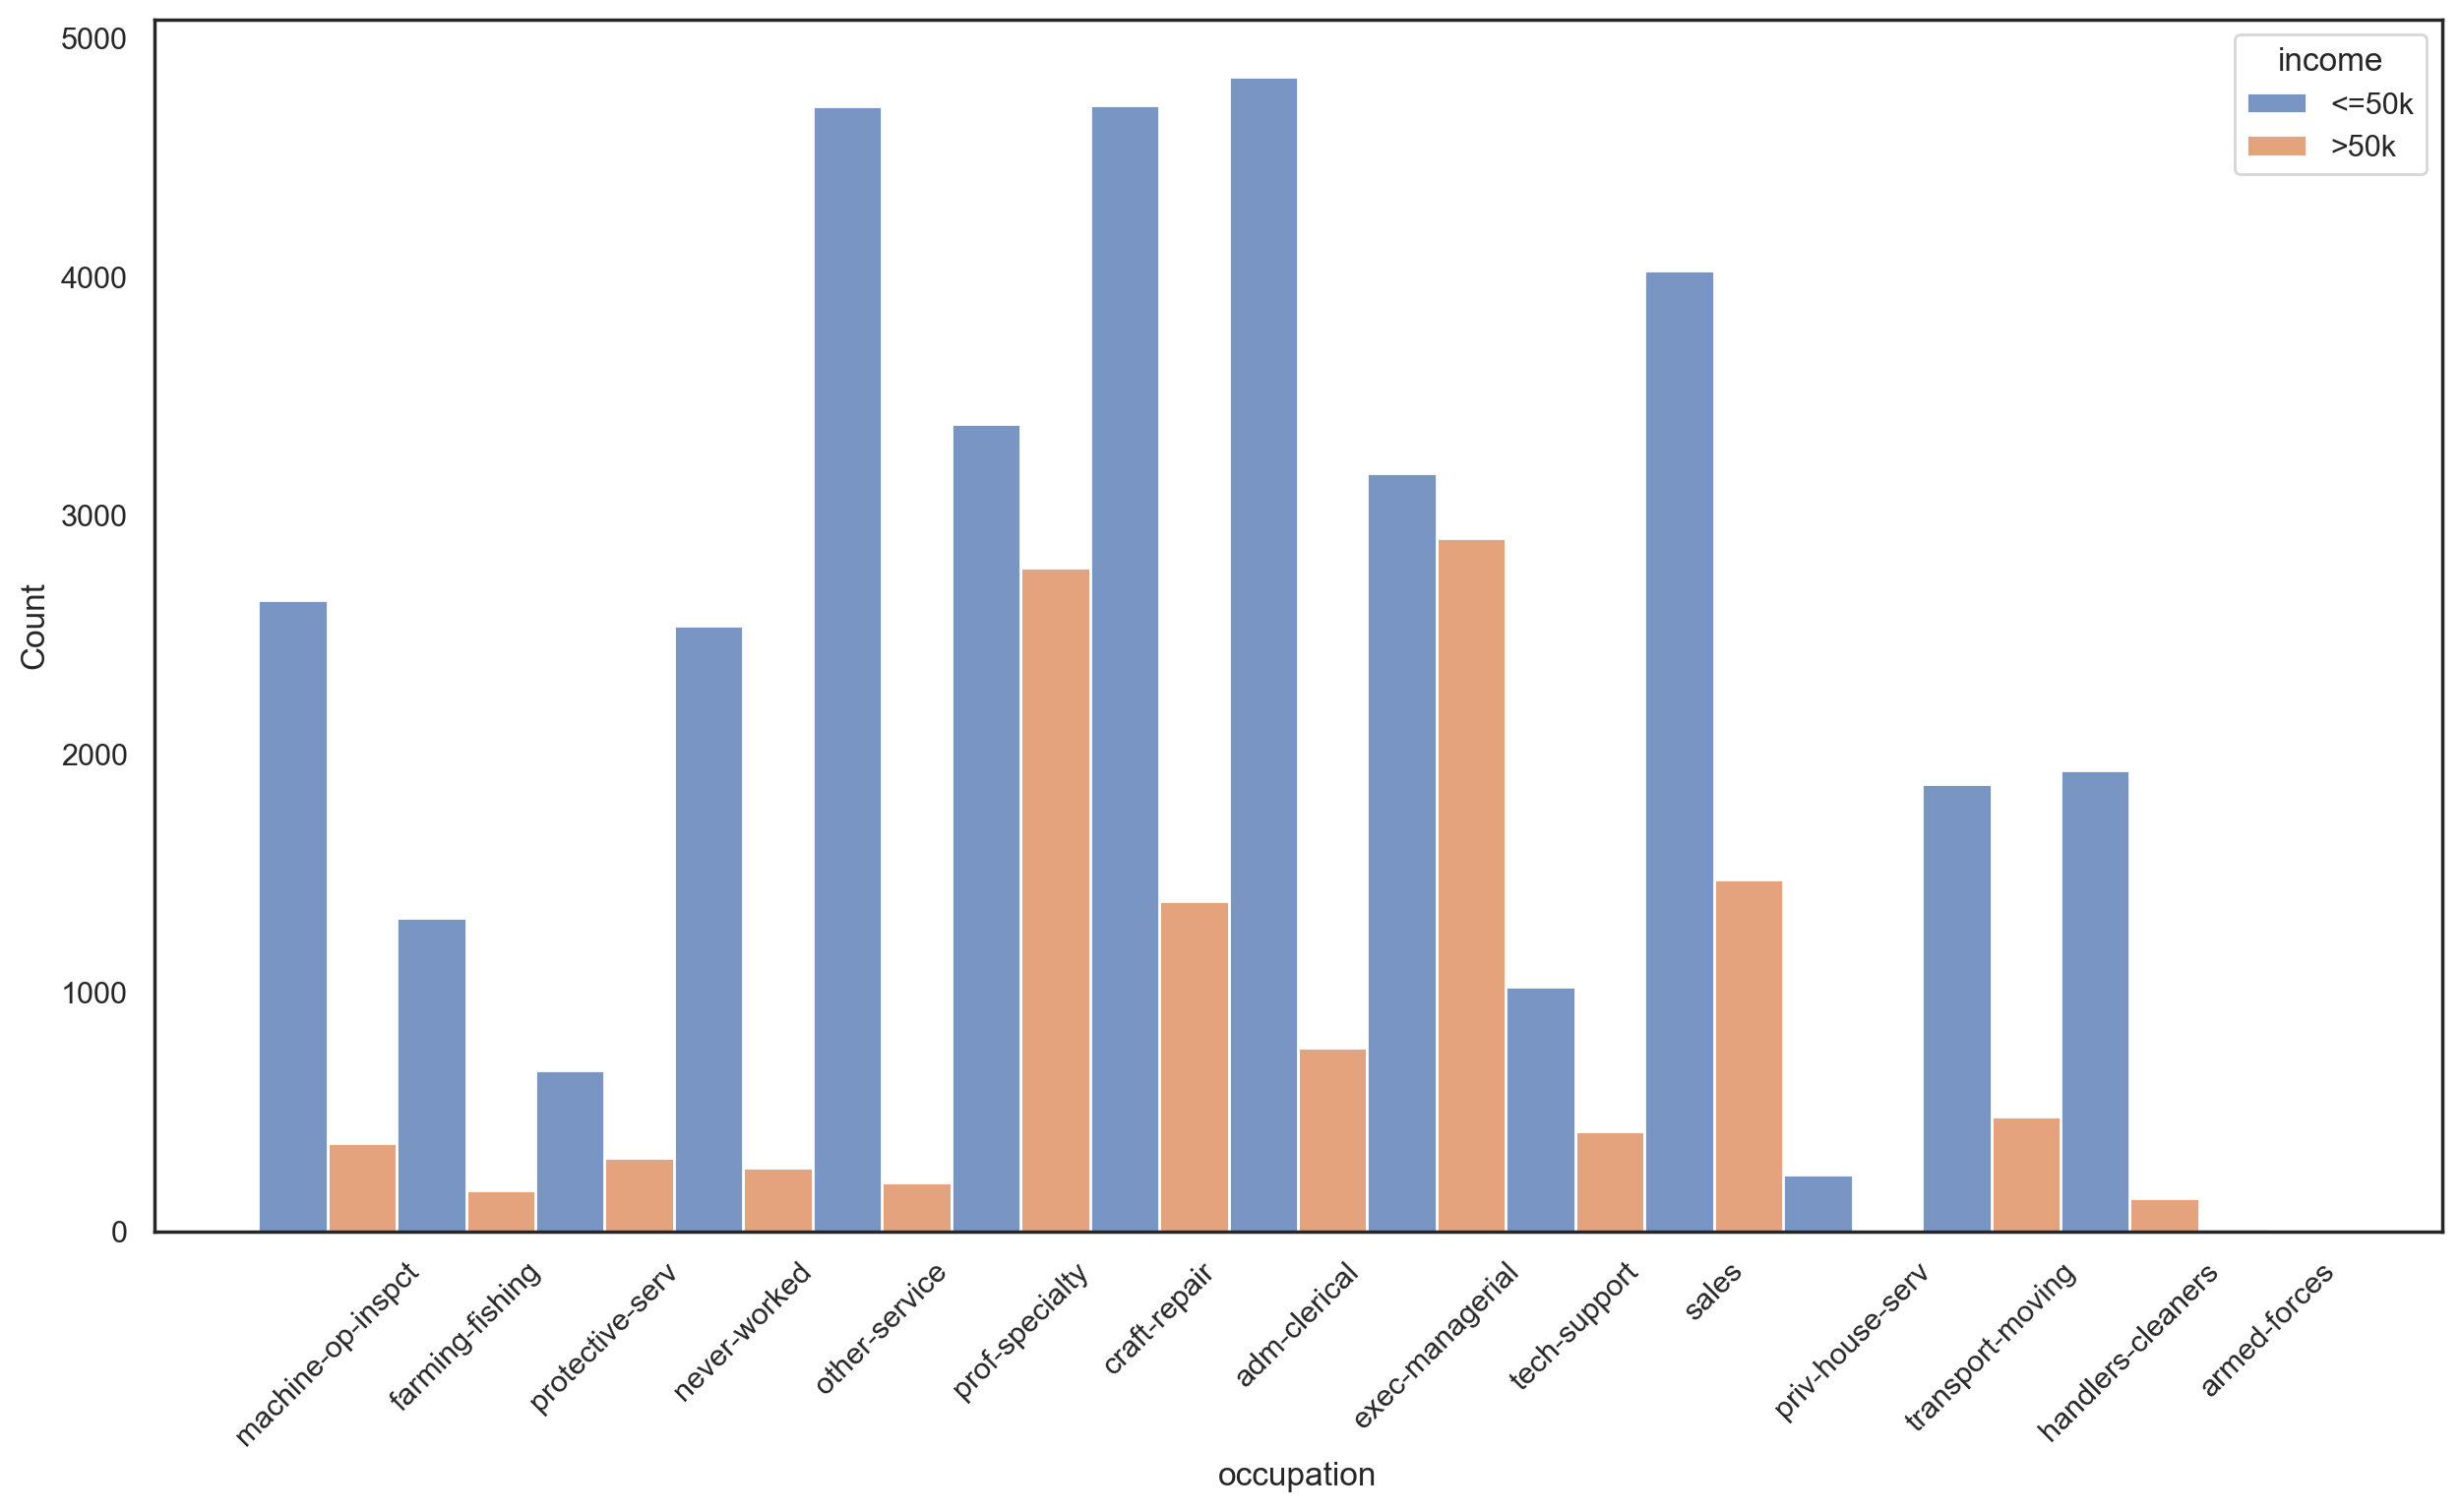

In [65]:
plt.figure(figsize=(15,8))
sns.histplot(binwidth=1,
            x='occupation',
            hue='income',
            data=df_3,
            stat="count",
            multiple="dodge")
a = plt.xticks(rotation=45)

## race & income

<AxesSubplot: xlabel='income', ylabel='Count'>

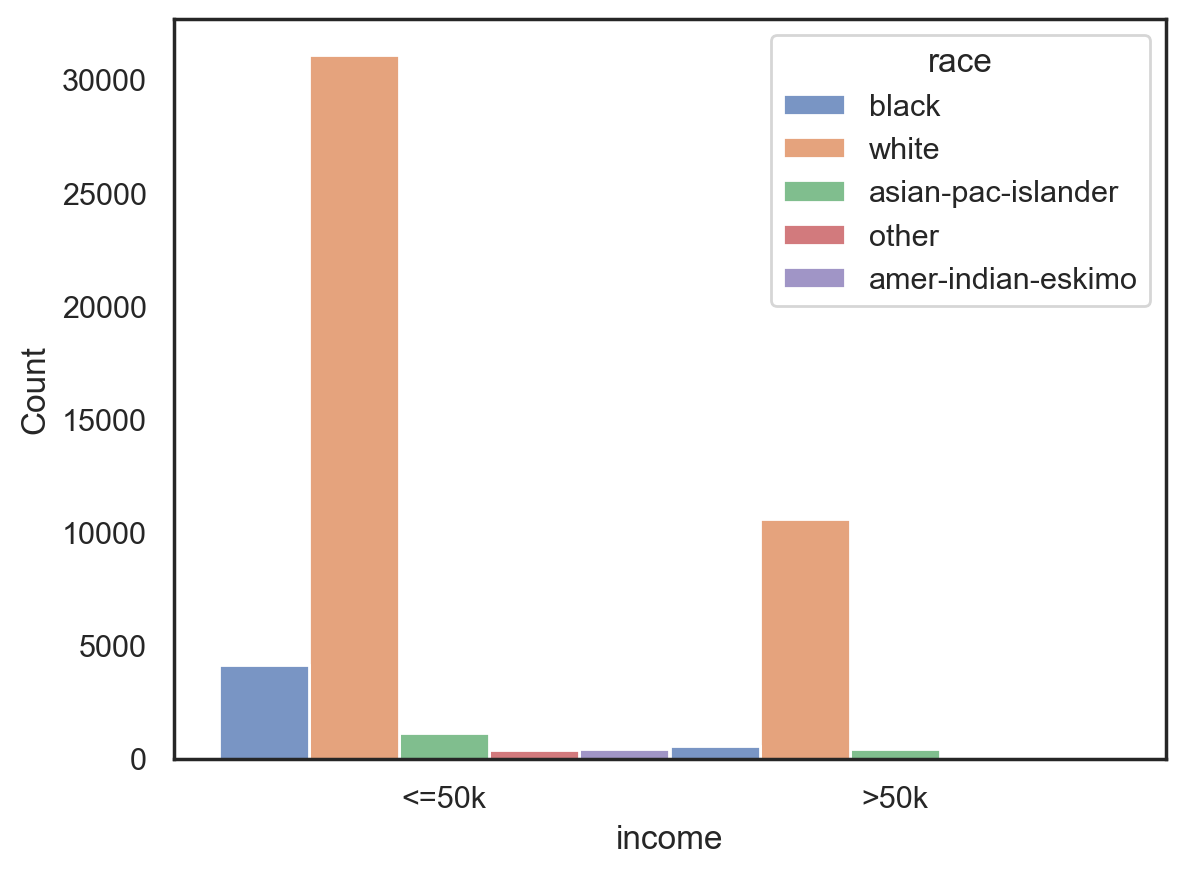

In [66]:
sns.histplot(binwidth=1,
            x='income',
            hue='race',
            data=df_3,
            stat="count",
            multiple="dodge")

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

The sample data skew white race. Hence race should be used cautiously to avoid misrepresentation in the model fit process

## gender & income

<AxesSubplot: xlabel='gender', ylabel='Count'>

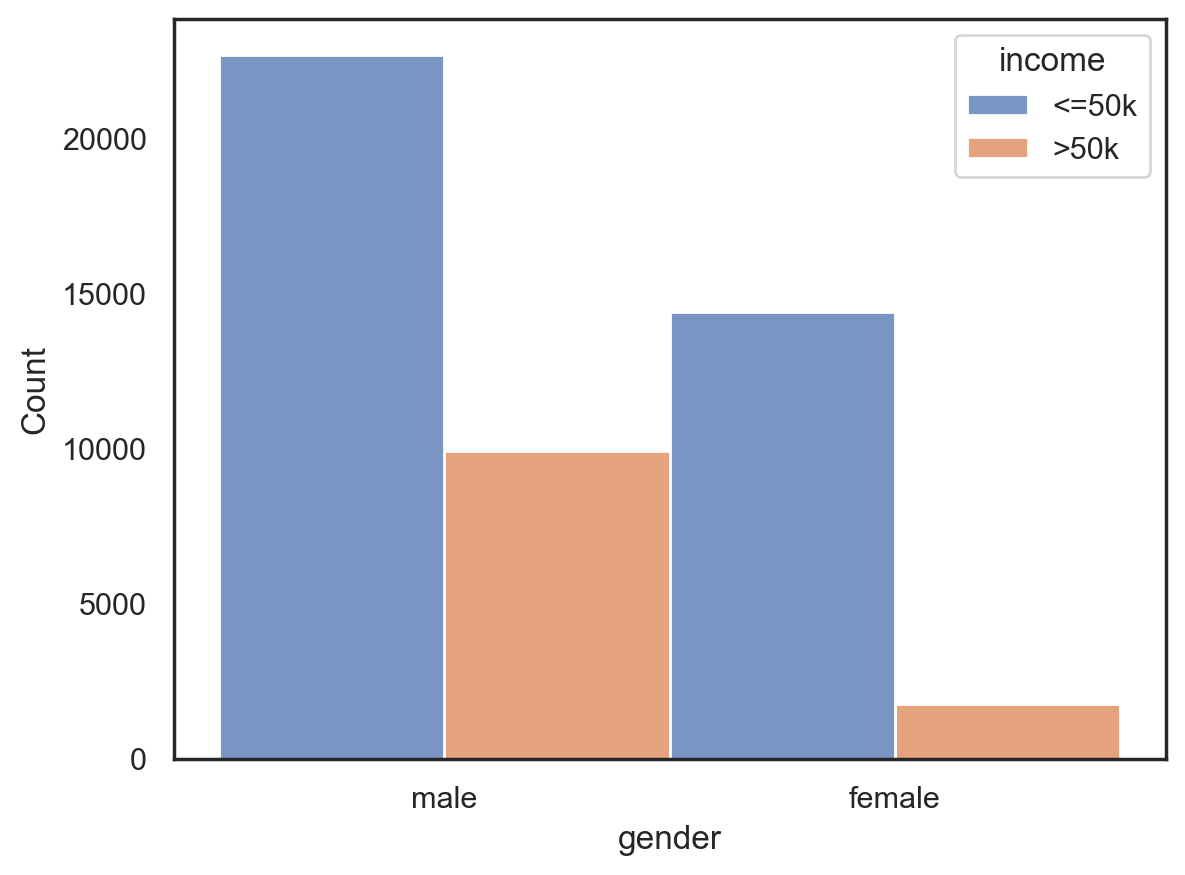

In [67]:
sns.histplot(binwidth=1,
            x='gender',
            hue='income',
            data=df_3,
            stat="count",
            multiple="dodge")

## native country & income

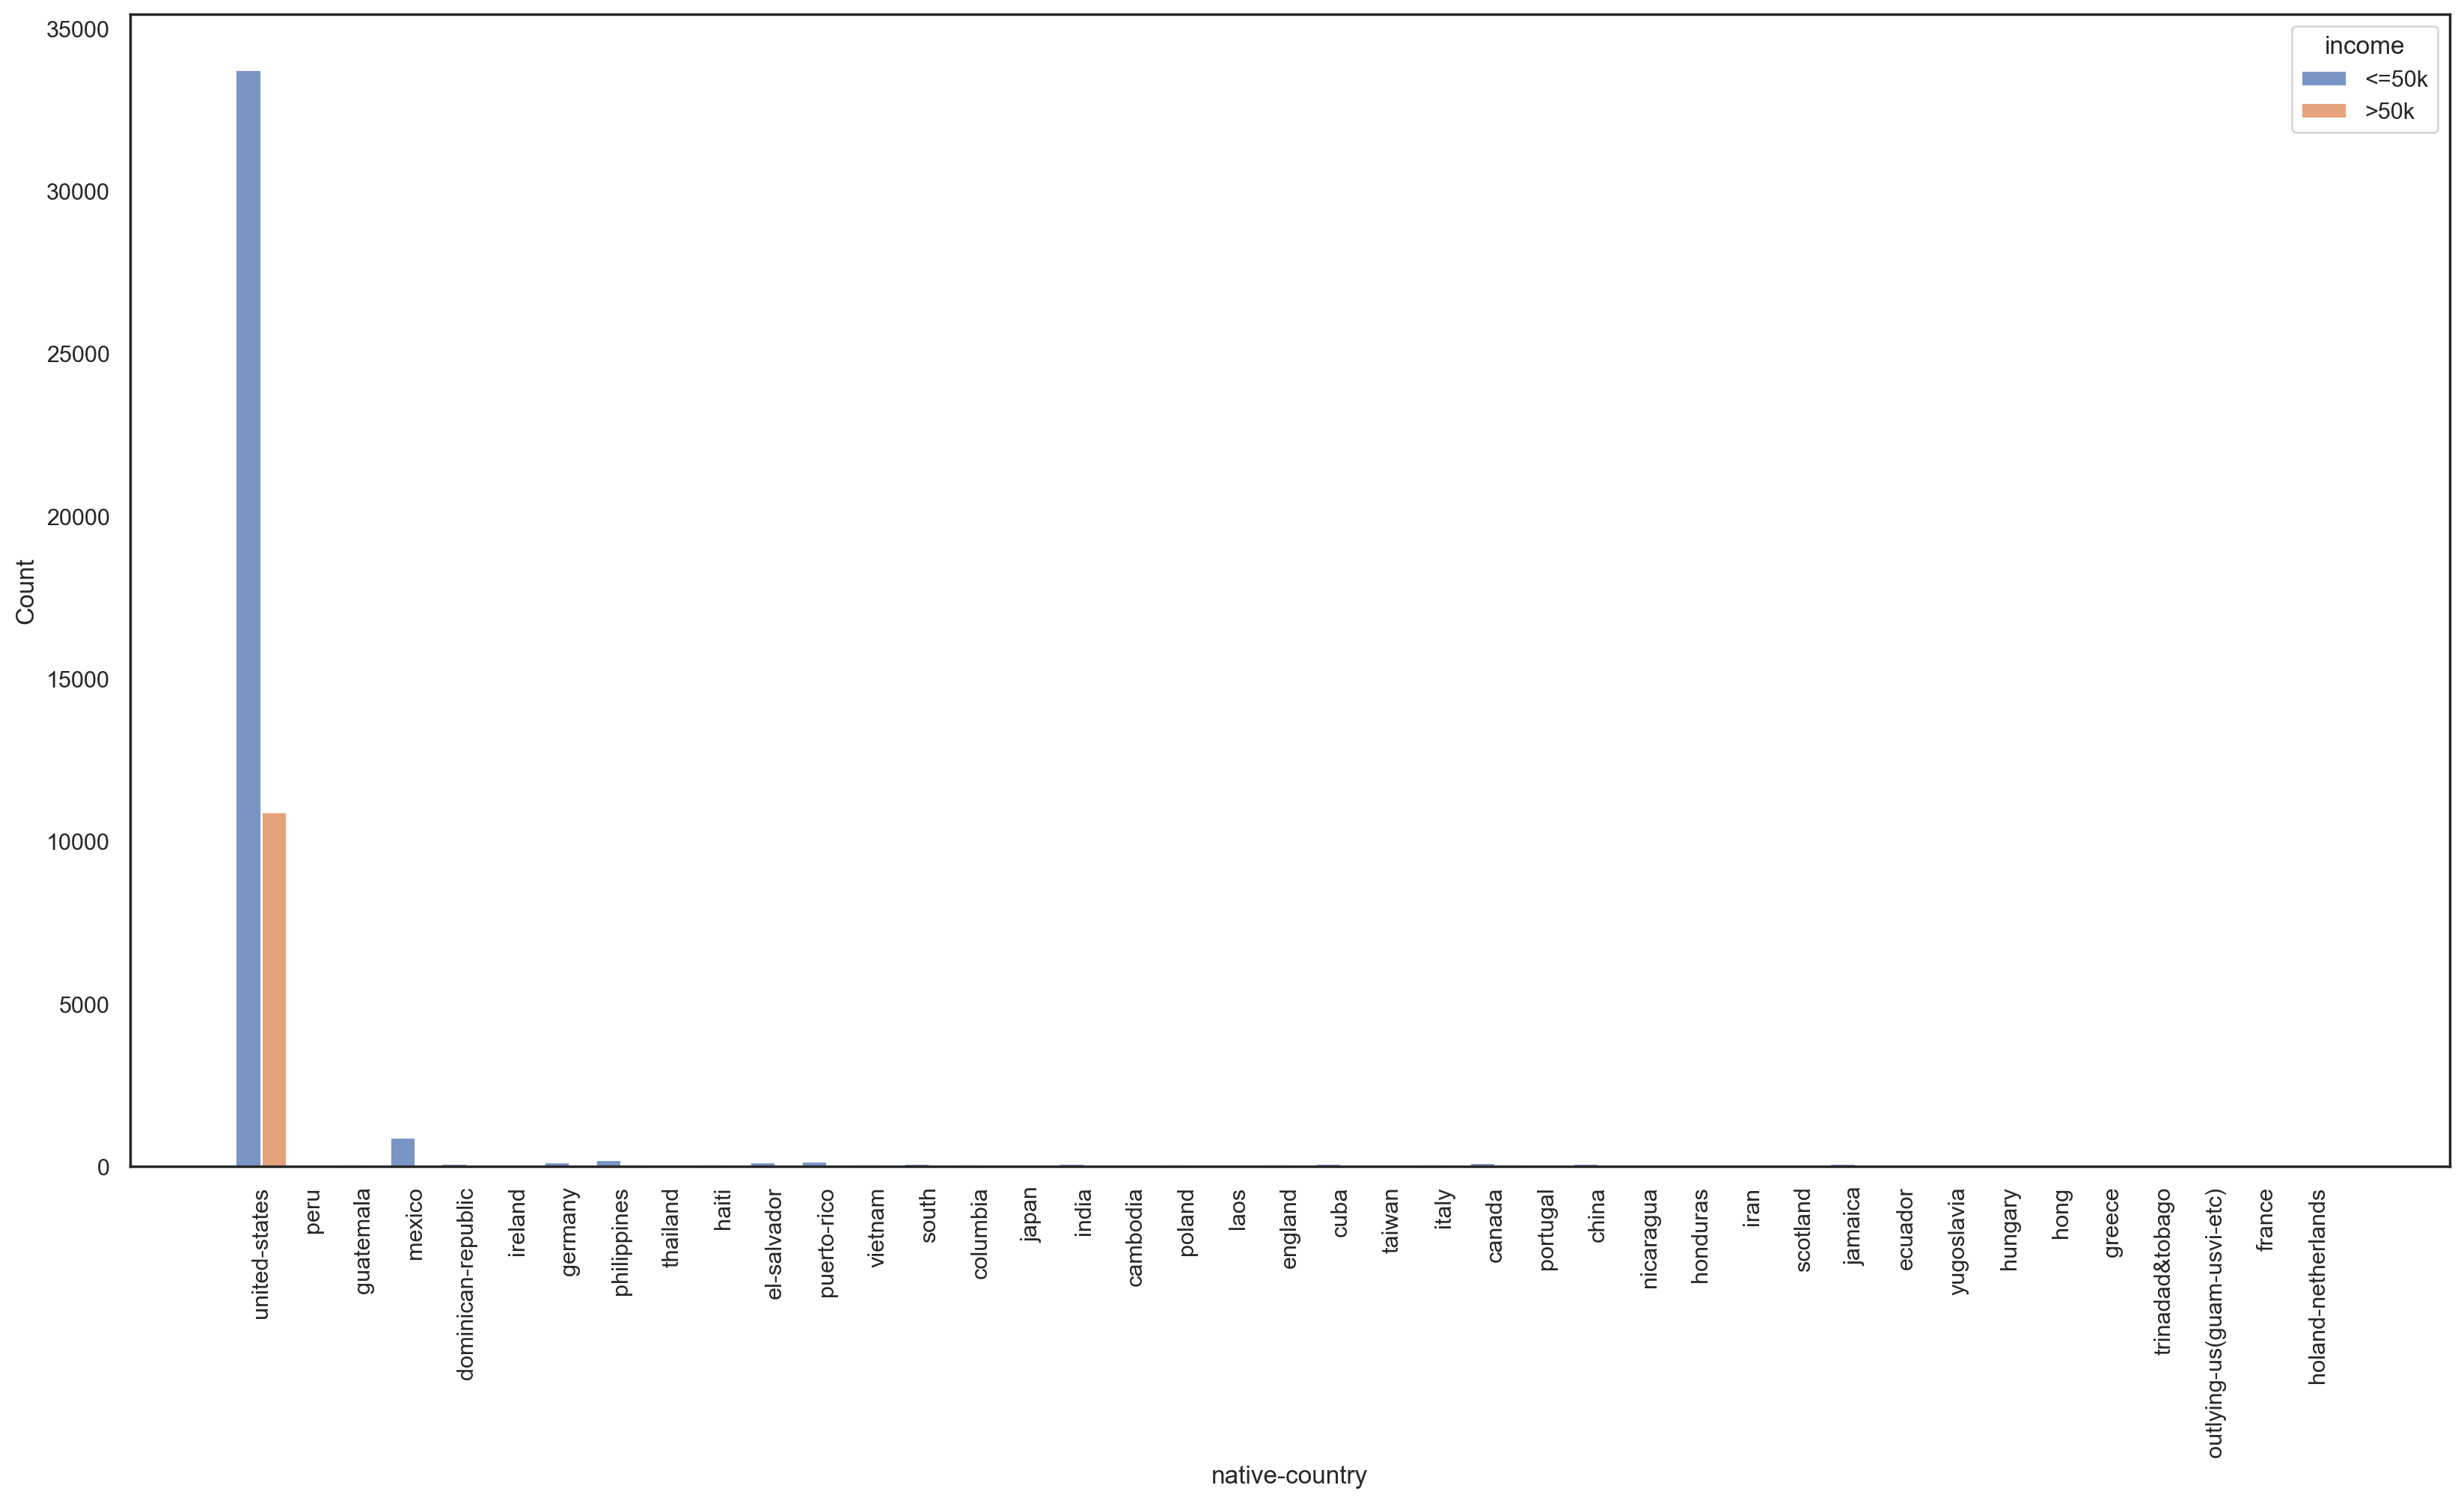

In [68]:
plt.figure(figsize=(20,10))

sns.histplot(binwidth=1,
            x='native-country',
            hue='income',
            data=df_3,
            stat="count",
            multiple="dodge")

a = plt.xticks(rotation=90)

<h1 style="color:green"><b>Explainatory Analysis</b> </h1> 

## Pairplot to get an overall view

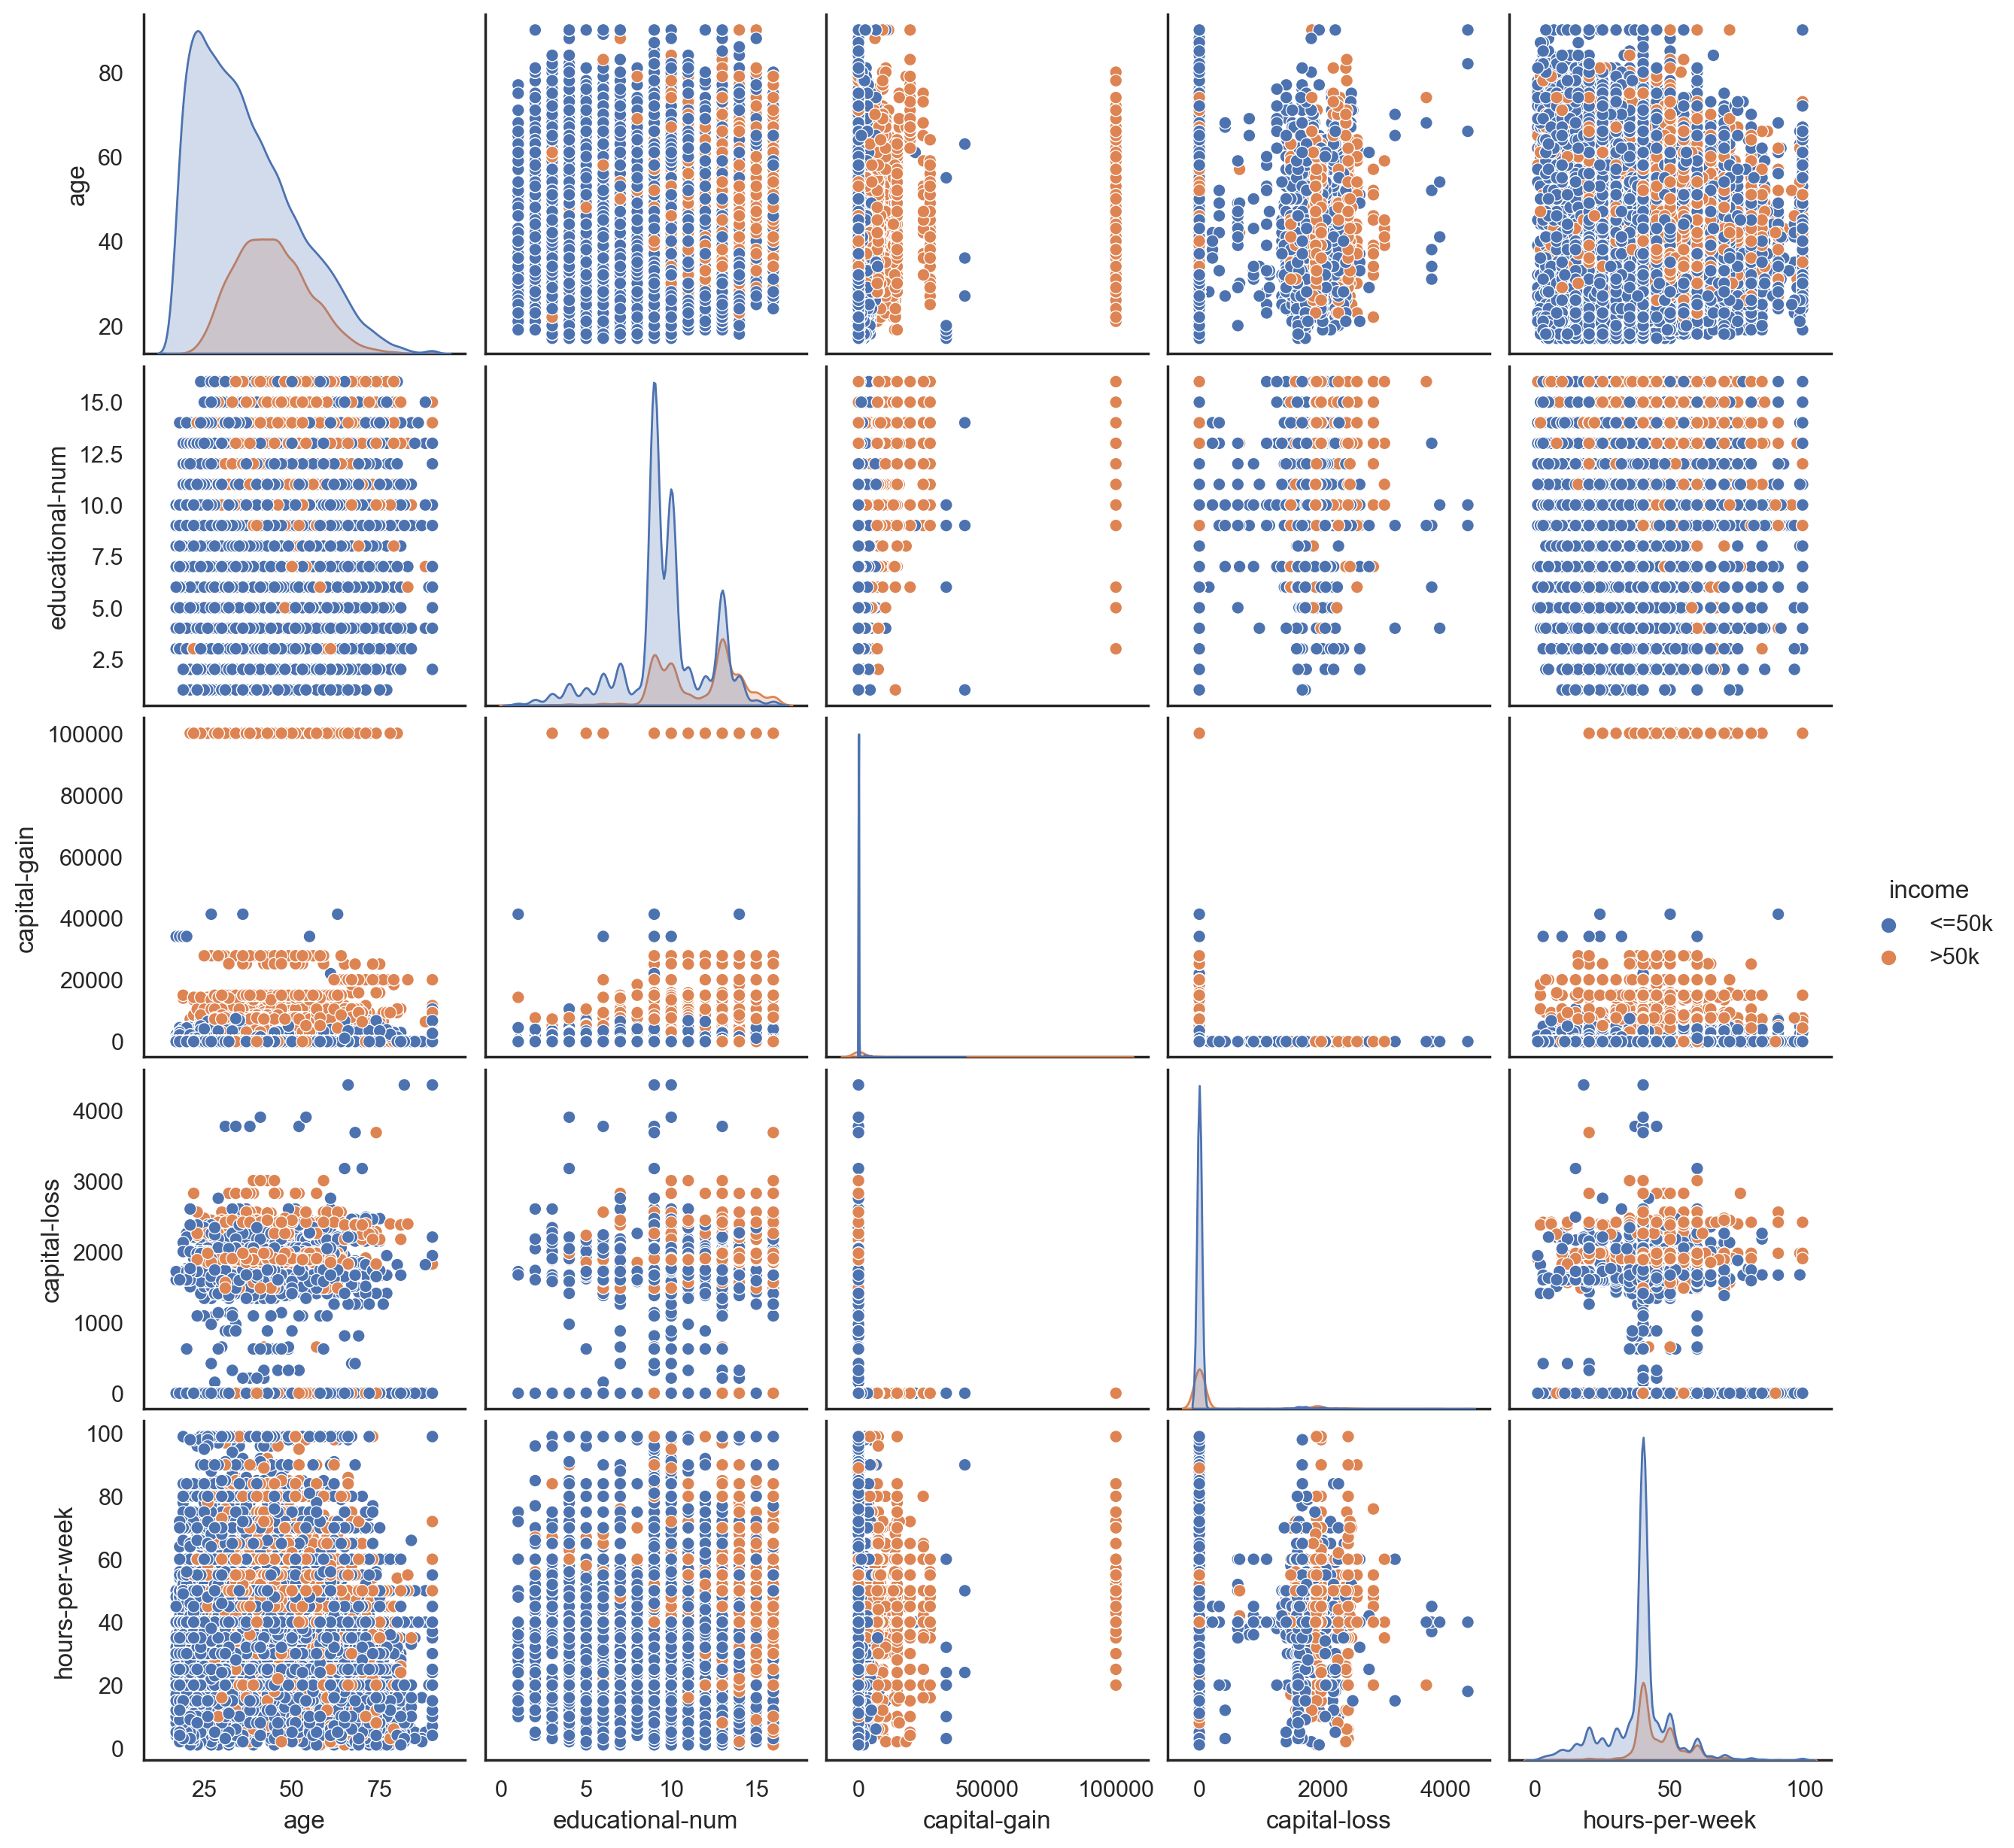

In [69]:
sns.pairplot(df_3, hue='income')

## Plot to get trends for age and income

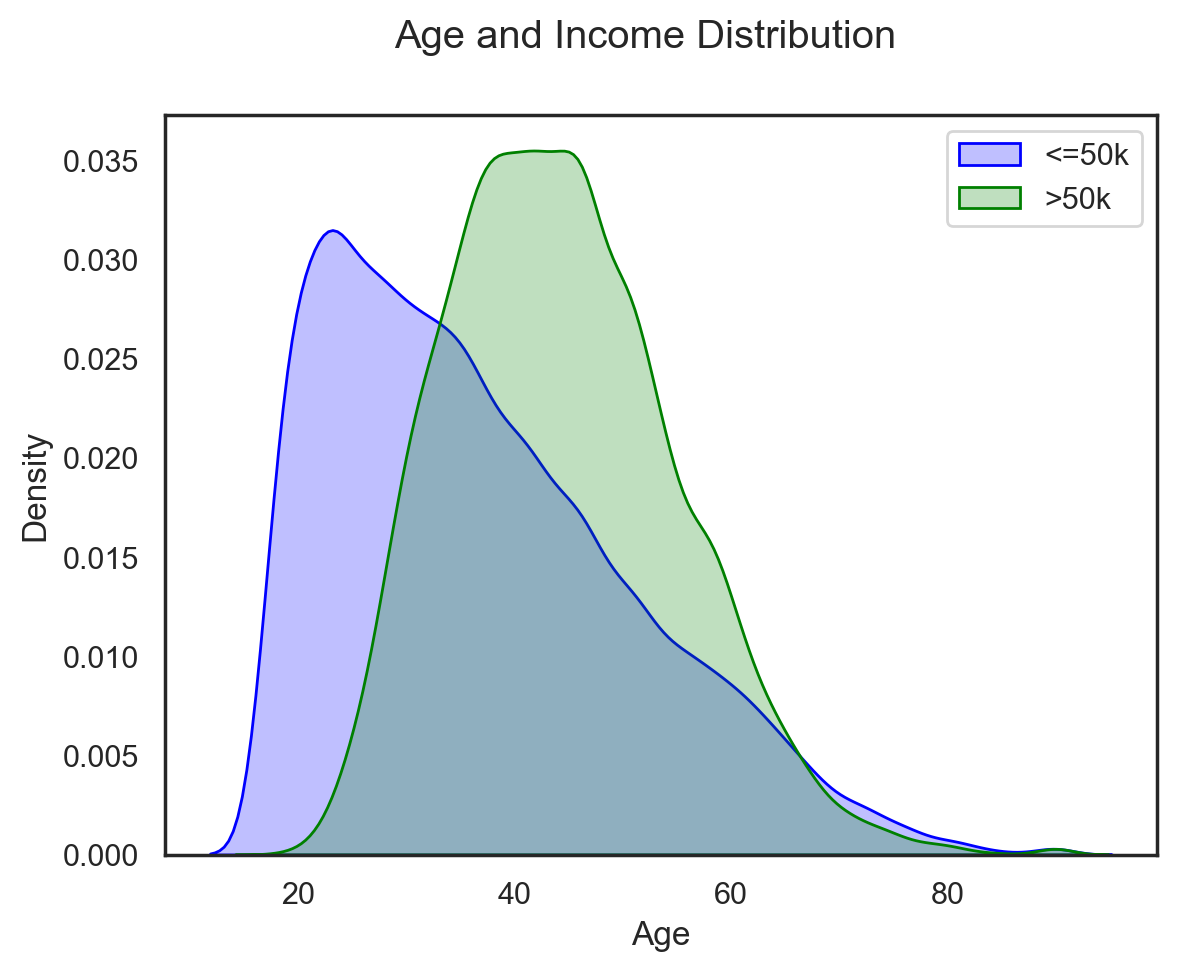

In [70]:
fig, ax = plt.subplots()

sns.kdeplot(df_3[df_3["income"]=='<=50k']["age"], fill=True, color="blue", label="<=50k")
sns.kdeplot(df_3[df_3["income"]=='>50k']["age"], fill=True, color="green", label=">50k")

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age and Income Distribution")
plt.legend()

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

In the sample income level of <=50K is more commonly observed in younger age group representing early career jobs. Where ass income of >50k is observed more in the middle age group

## Plot to get trends for educational-num and income

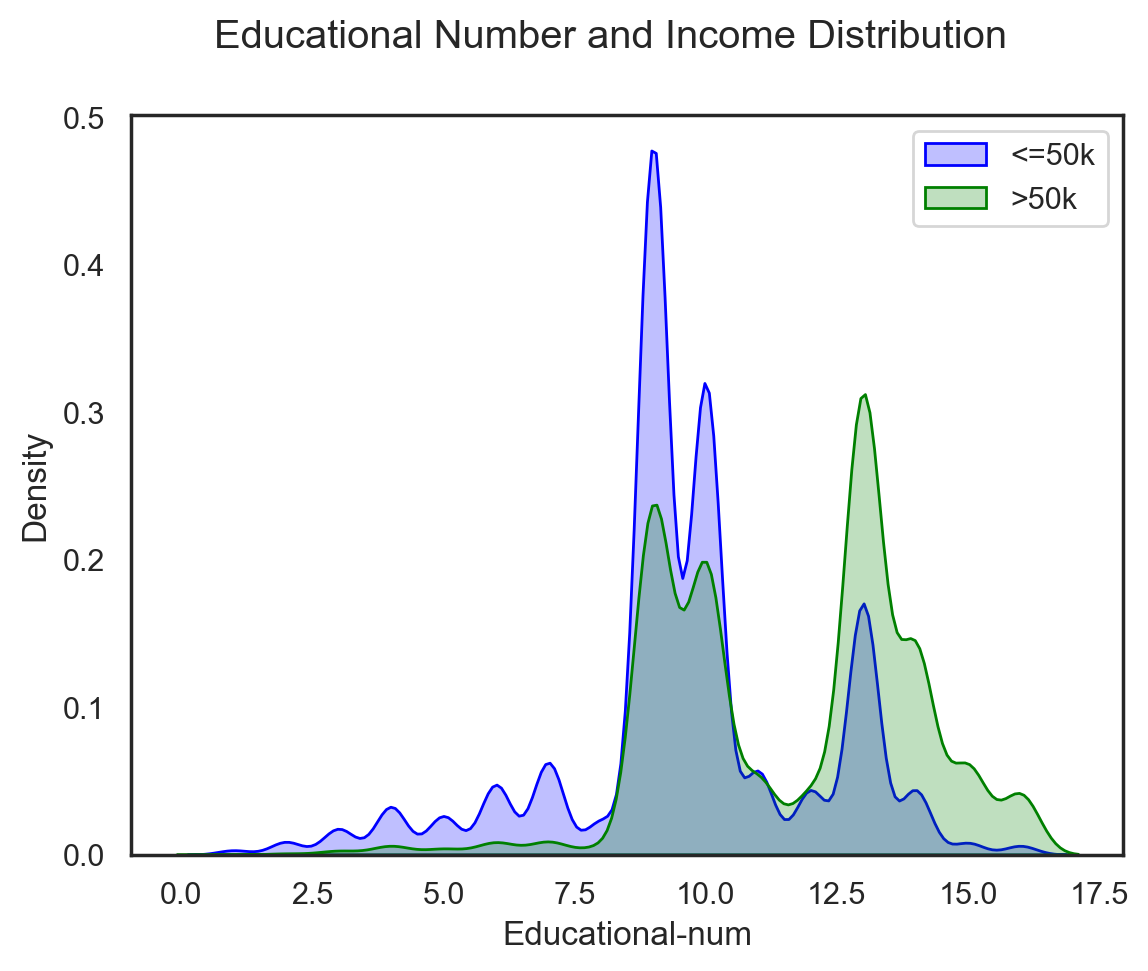

In [71]:
fig, ax = plt.subplots()

sns.kdeplot(df_3[df_3["income"]=='<=50k']["educational-num"], fill=True, color="blue", label="<=50k")
sns.kdeplot(df_3[df_3["income"]=='>50k']["educational-num"], fill=True, color="green", label=">50k")

ax.set_xlabel("Educational-num")
ax.set_ylabel("Density")

fig.suptitle("Educational Number and Income Distribution")
plt.legend()

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

In the sample income level of >50K is more commonly observed in the individuals with more education.

In [72]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   educational-num  48790 non-null  object
 3   marital-status   48790 non-null  object
 4   occupation       48790 non-null  object
 5   race             48790 non-null  object
 6   gender           48790 non-null  object
 7   capital-gain     48790 non-null  int64 
 8   capital-loss     48790 non-null  int64 
 9   hours-per-week   48790 non-null  int64 
 10  native-country   48790 non-null  object
 11  income           48790 non-null  object
dtypes: int64(4), object(8)
memory usage: 5.8+ MB


## Scatterplot showing hours per week with age for both income levels

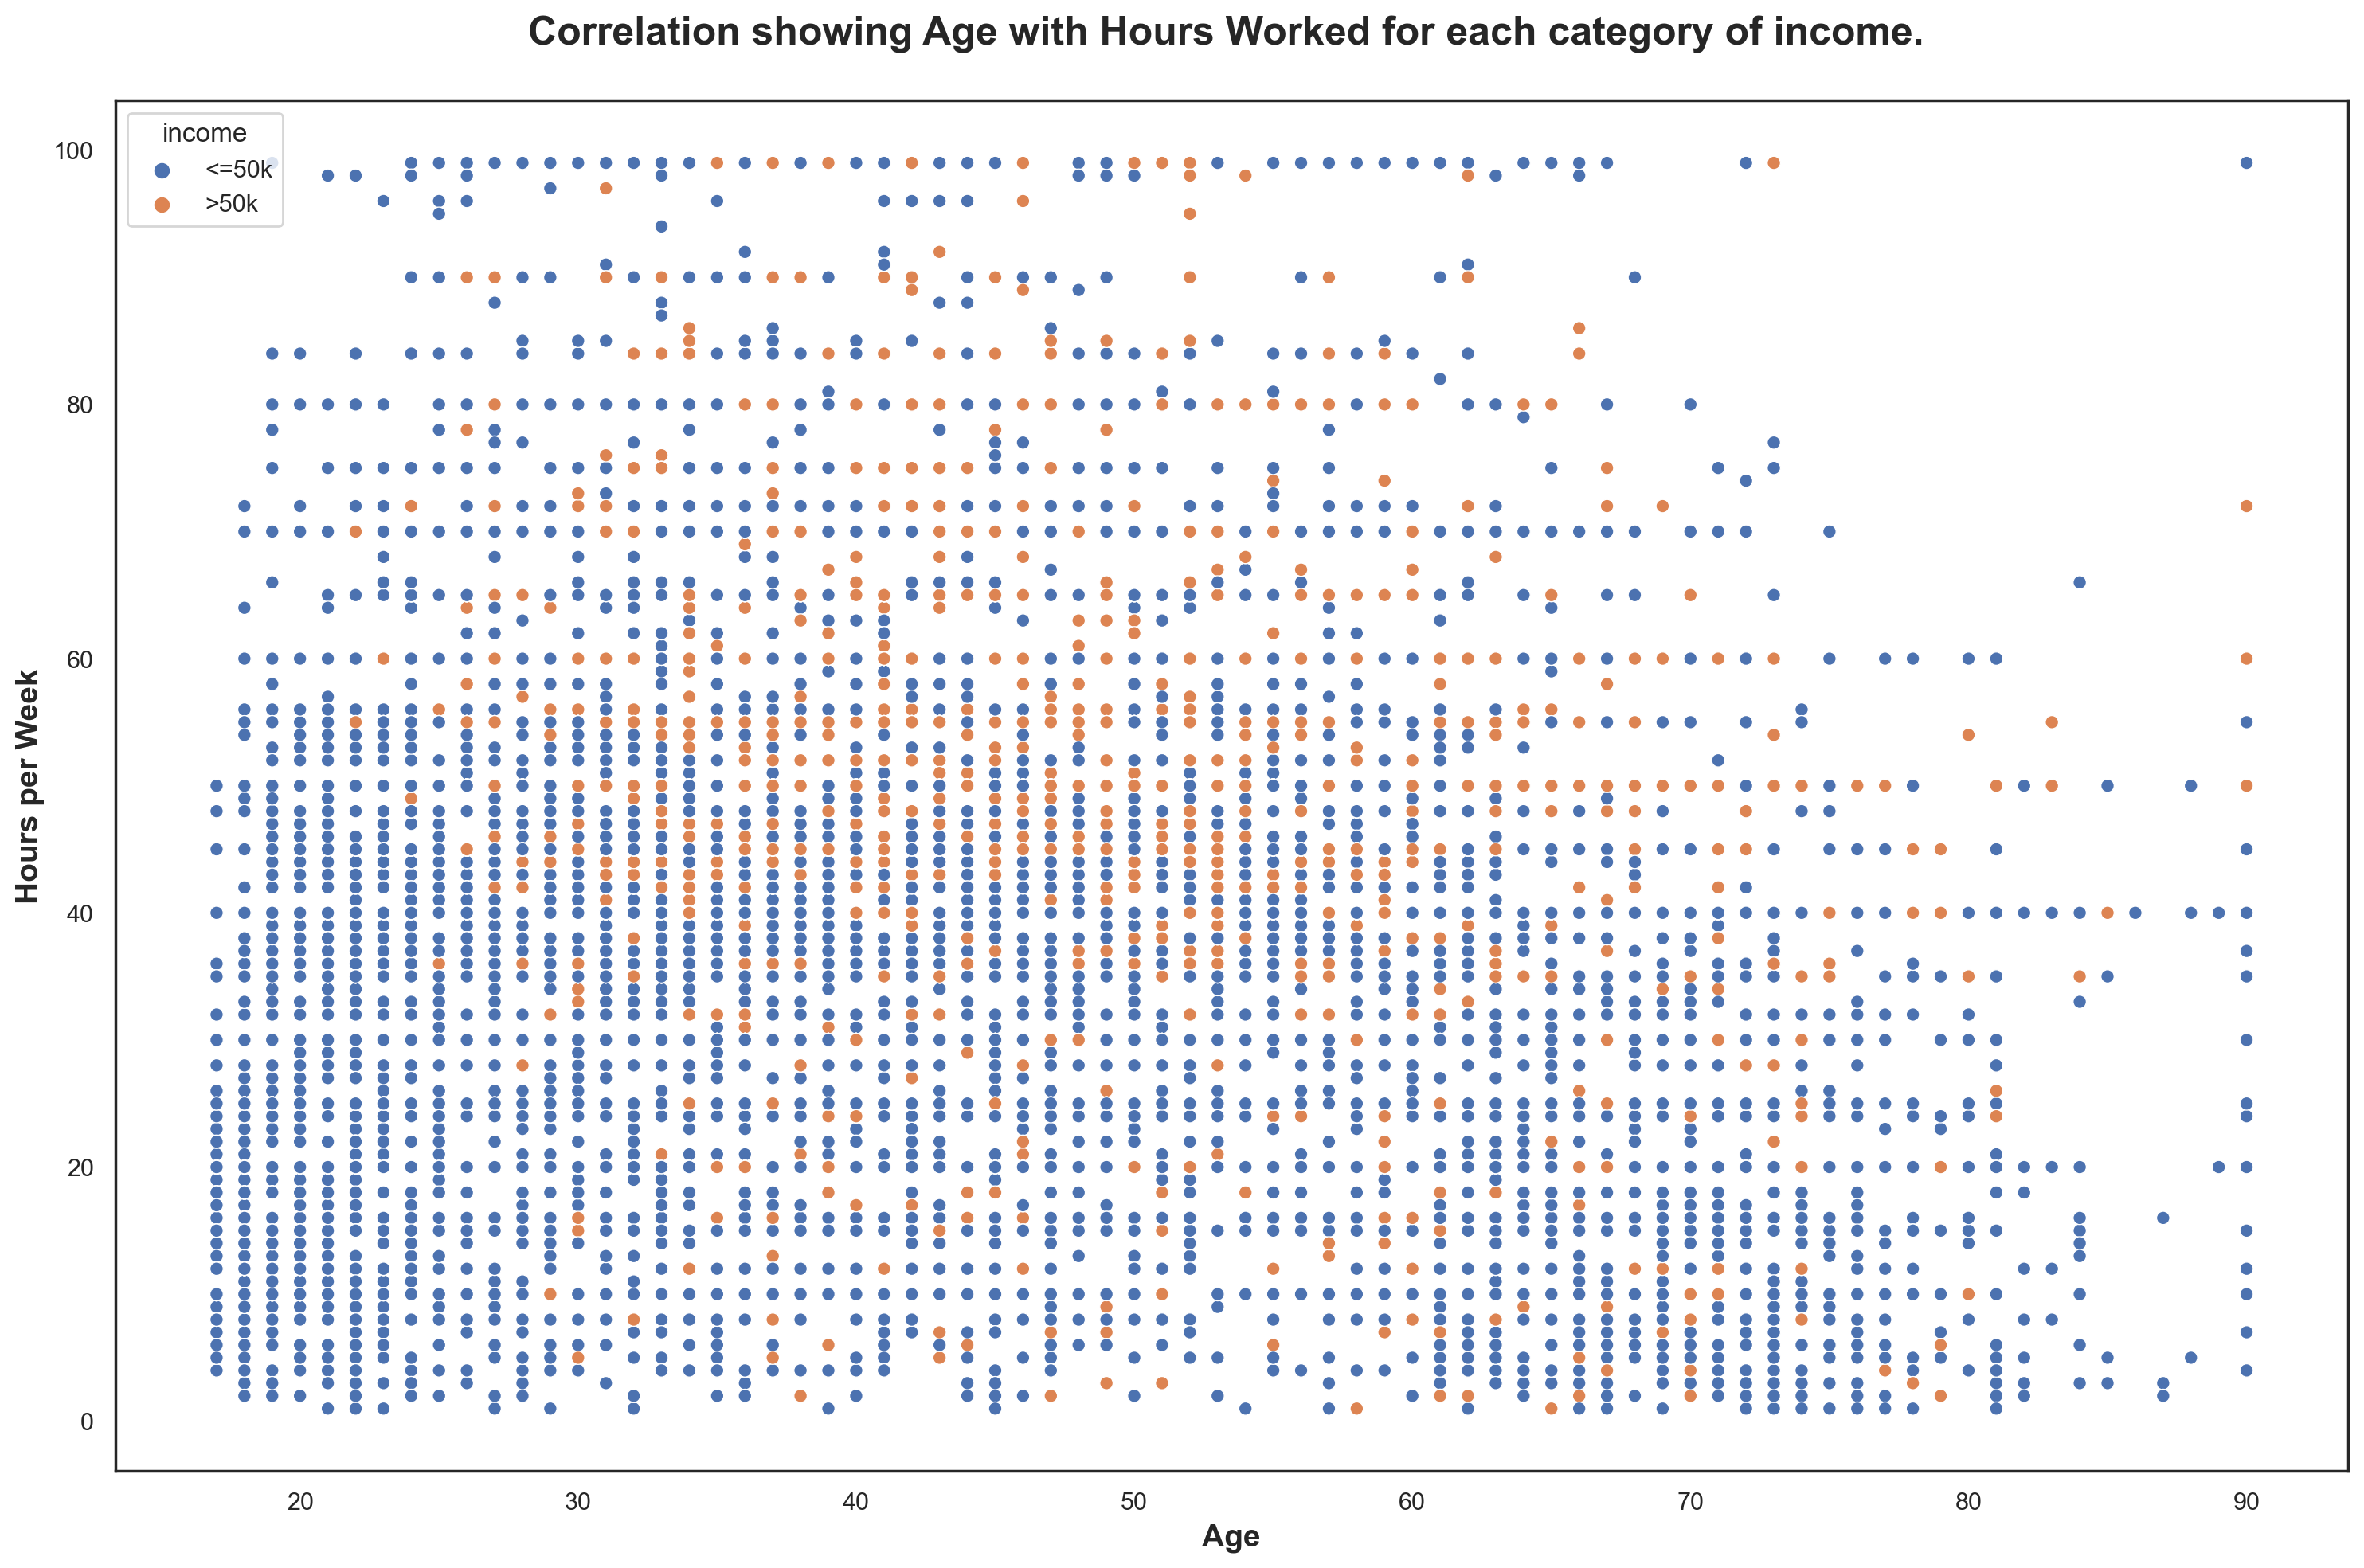

In [73]:
x=df_3['age']
y=df_3['hours-per-week']

fig, ax = plt.subplots(figsize=(15,10), facecolor='w')

sns.scatterplot(x=x, y=y, hue="income", data=df)

plt.title(f'Correlation showing Age with Hours Worked for each category of income. \n', fontsize = 18, weight='bold')
plt.xlabel('Age', fontsize = 14, weight='bold')
plt.ylabel('Hours per Week', fontsize = 14, weight='bold');

plt.tight_layout()
plt.show;

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Amongst the members in this sample, those who are making an income of >50K, typically work more than 40 hours per week.  

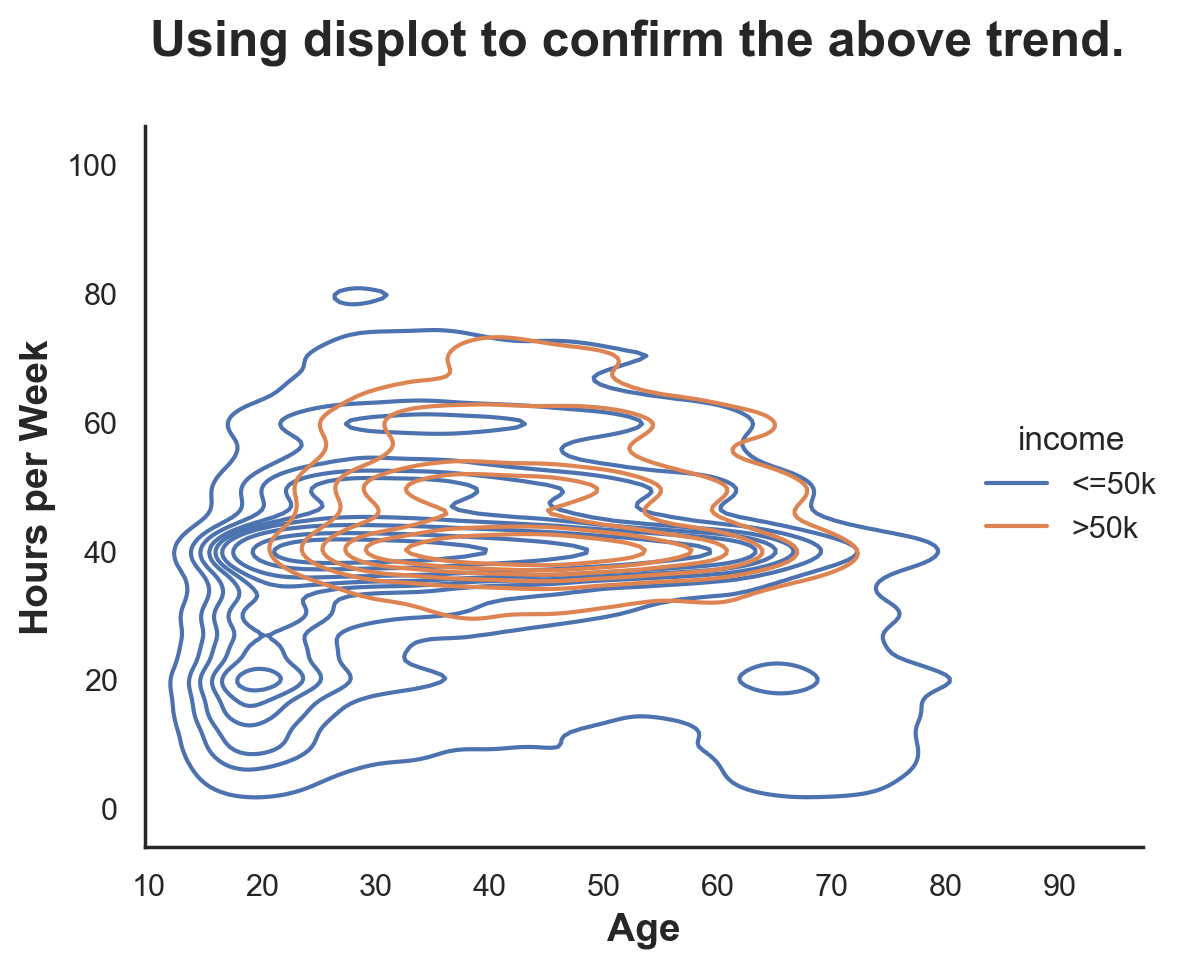

In [74]:
x=df_3['age']
y=df_3['hours-per-week']

sns.displot(x=x, y=y, hue="income", data=df, kind="kde")

plt.title(f'Using displot to confirm the above trend. \n', fontsize = 18, weight='bold')
plt.xlabel('Age', fontsize = 14, weight='bold')
plt.ylabel('Hours per Week', fontsize = 14, weight='bold');

plt.tight_layout()
plt.show;

## Correlation plot

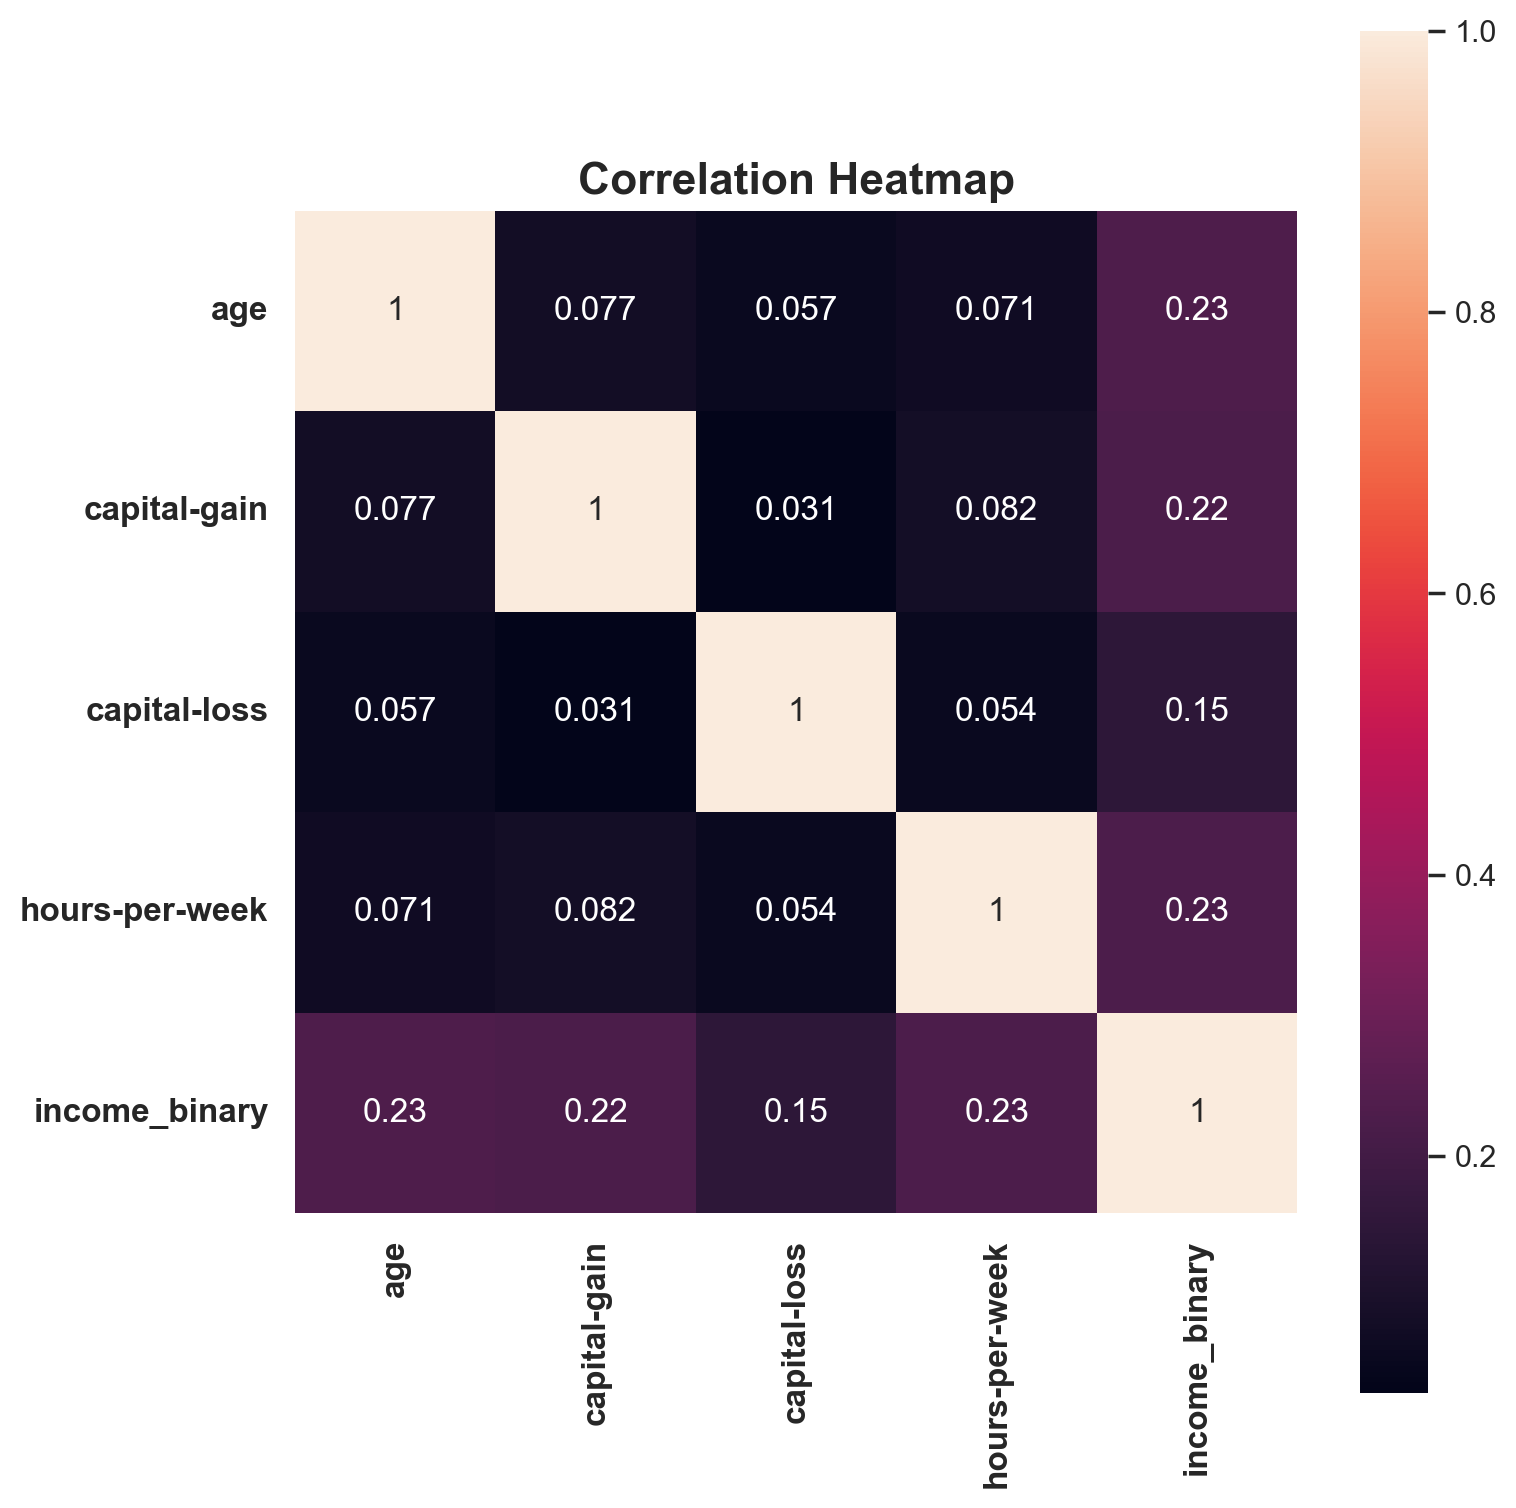

In [75]:
df_3['income_binary'] = df_3['income'].replace(['<=50k', '>50k'],[0,1])

# Plot Correlation Heatmap
plt.figure(figsize = (8,8),facecolor='w')
corr = df_3.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, annot=True);
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.xticks(fontsize = 12, weight='bold', rotation=90)
plt.yticks(fontsize = 12, weight='bold', rotation=0);
plt.tight_layout()
plt.show;

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Among all features, higher income (>50k) has stronger correlation with age followed by capital gains. Suggesting as age and capital gains increase, the income also increases. 

<h1 style="color:green"><b>ML Preprocessing</b> </h1> 

## Dataframe copy

In [76]:
df_ml = df_3.drop(columns=['income_binary'])

In [77]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   educational-num  48790 non-null  object
 3   marital-status   48790 non-null  object
 4   occupation       48790 non-null  object
 5   race             48790 non-null  object
 6   gender           48790 non-null  object
 7   capital-gain     48790 non-null  int64 
 8   capital-loss     48790 non-null  int64 
 9   hours-per-week   48790 non-null  int64 
 10  native-country   48790 non-null  object
 11  income           48790 non-null  object
dtypes: int64(4), object(8)
memory usage: 5.8+ MB


## Convert target to numeric

In [78]:
df_ml['income'] = df_ml['income'].replace({'<=50k':0,
                                           '>50k':1})

In [79]:
df_ml['income'].value_counts(normalize=False)

0    37109
1    11681
Name: income, dtype: int64

In [80]:
df_ml['income'].value_counts(normalize=True)

0    0.760586
1    0.239414
Name: income, dtype: float64

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Seems like there is no class imbalance

## Validation split

In [81]:
# Split feature and target 
target = 'income'
X = df_ml.drop(columns = [target]).copy()
y = df_ml[target].copy()

In [82]:
# qa the slit 
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   educational-num  48790 non-null  object
 3   marital-status   48790 non-null  object
 4   occupation       48790 non-null  object
 5   race             48790 non-null  object
 6   gender           48790 non-null  object
 7   capital-gain     48790 non-null  int64 
 8   capital-loss     48790 non-null  int64 
 9   hours-per-week   48790 non-null  int64 
 10  native-country   48790 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.5+ MB


In [83]:
# QA the split
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 48790 entries, 0 to 48841
Series name: income
Non-Null Count  Dtype
--------------  -----
48790 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


In [84]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [85]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

0    0.760576
1    0.239424
Name: income, dtype: float64

In [86]:
# Check how many samples of each class are present for test
y_test.value_counts(normalize=True)

0    0.760616
1    0.239384
Name: income, dtype: float64

## Column Selector 

In [87]:
# Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [88]:
# QA
num_selector(X_train)

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [89]:
# QA
cat_selector(X_train)

['workclass',
 'educational-num',
 'marital-status',
 'occupation',
 'race',
 'gender',
 'native-country']

## Transformers

In [90]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

## Instantiate Pipeline

In [91]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [92]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## Tuples

In [93]:
# Create tuples
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

## Column Transformer

In [94]:
# Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])

<h1 style="color:green"><b>No Feature Engineering Model Build</b> </h1> 

## Random Forest  

### Basic Model

In [95]:
# fit and evaluate a RandomForestClassifier
rf_pipe1 = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
rf_pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27831
           1       0.96      0.93      0.95      8761

    accuracy                           0.97     36592
   macro avg       0.97      0.96      0.96     36592
weighted avg       0.97      0.97      0.97     36592



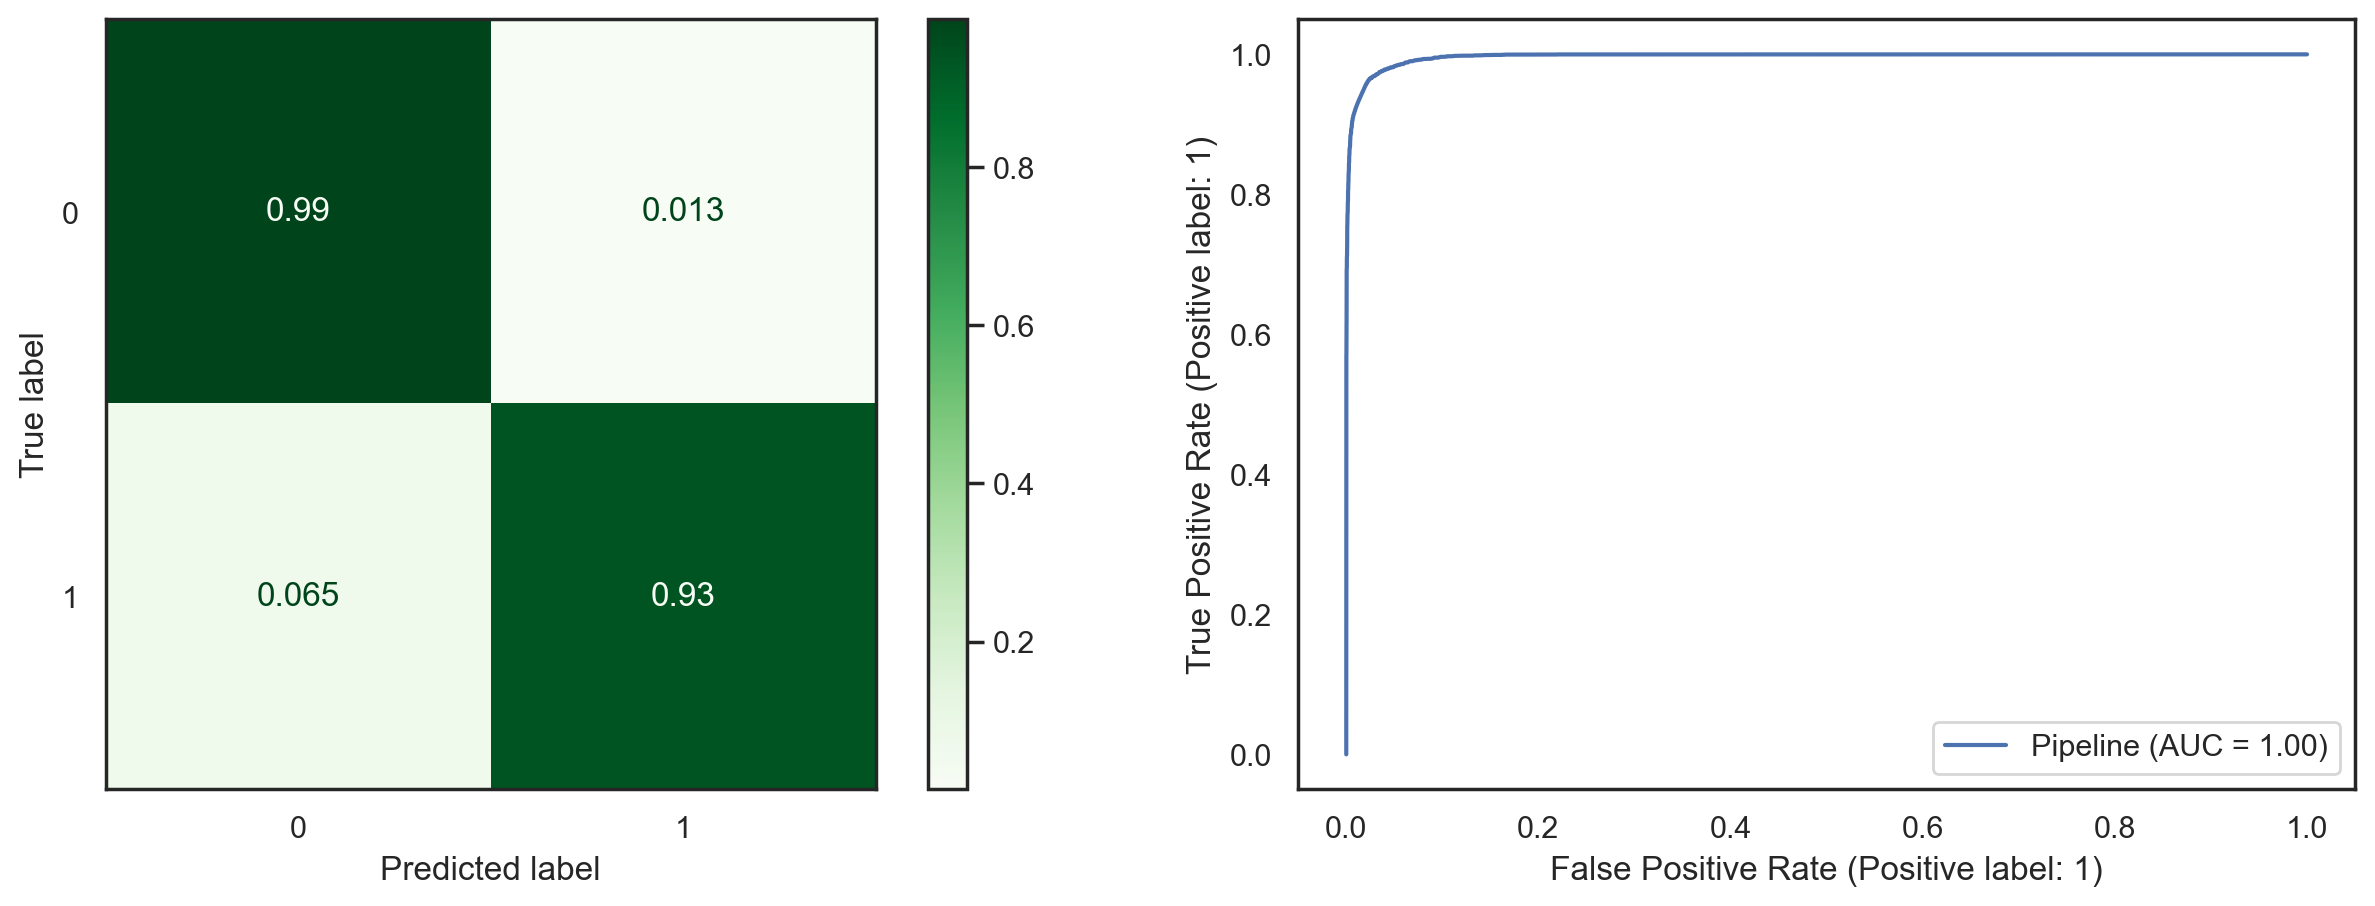

In [96]:
evaluate_classiffication(rf_pipe1, X_train, y_train, label='Train Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      9278
           1       0.71      0.61      0.65      2920

    accuracy                           0.85     12198
   macro avg       0.79      0.76      0.78     12198
weighted avg       0.84      0.85      0.84     12198



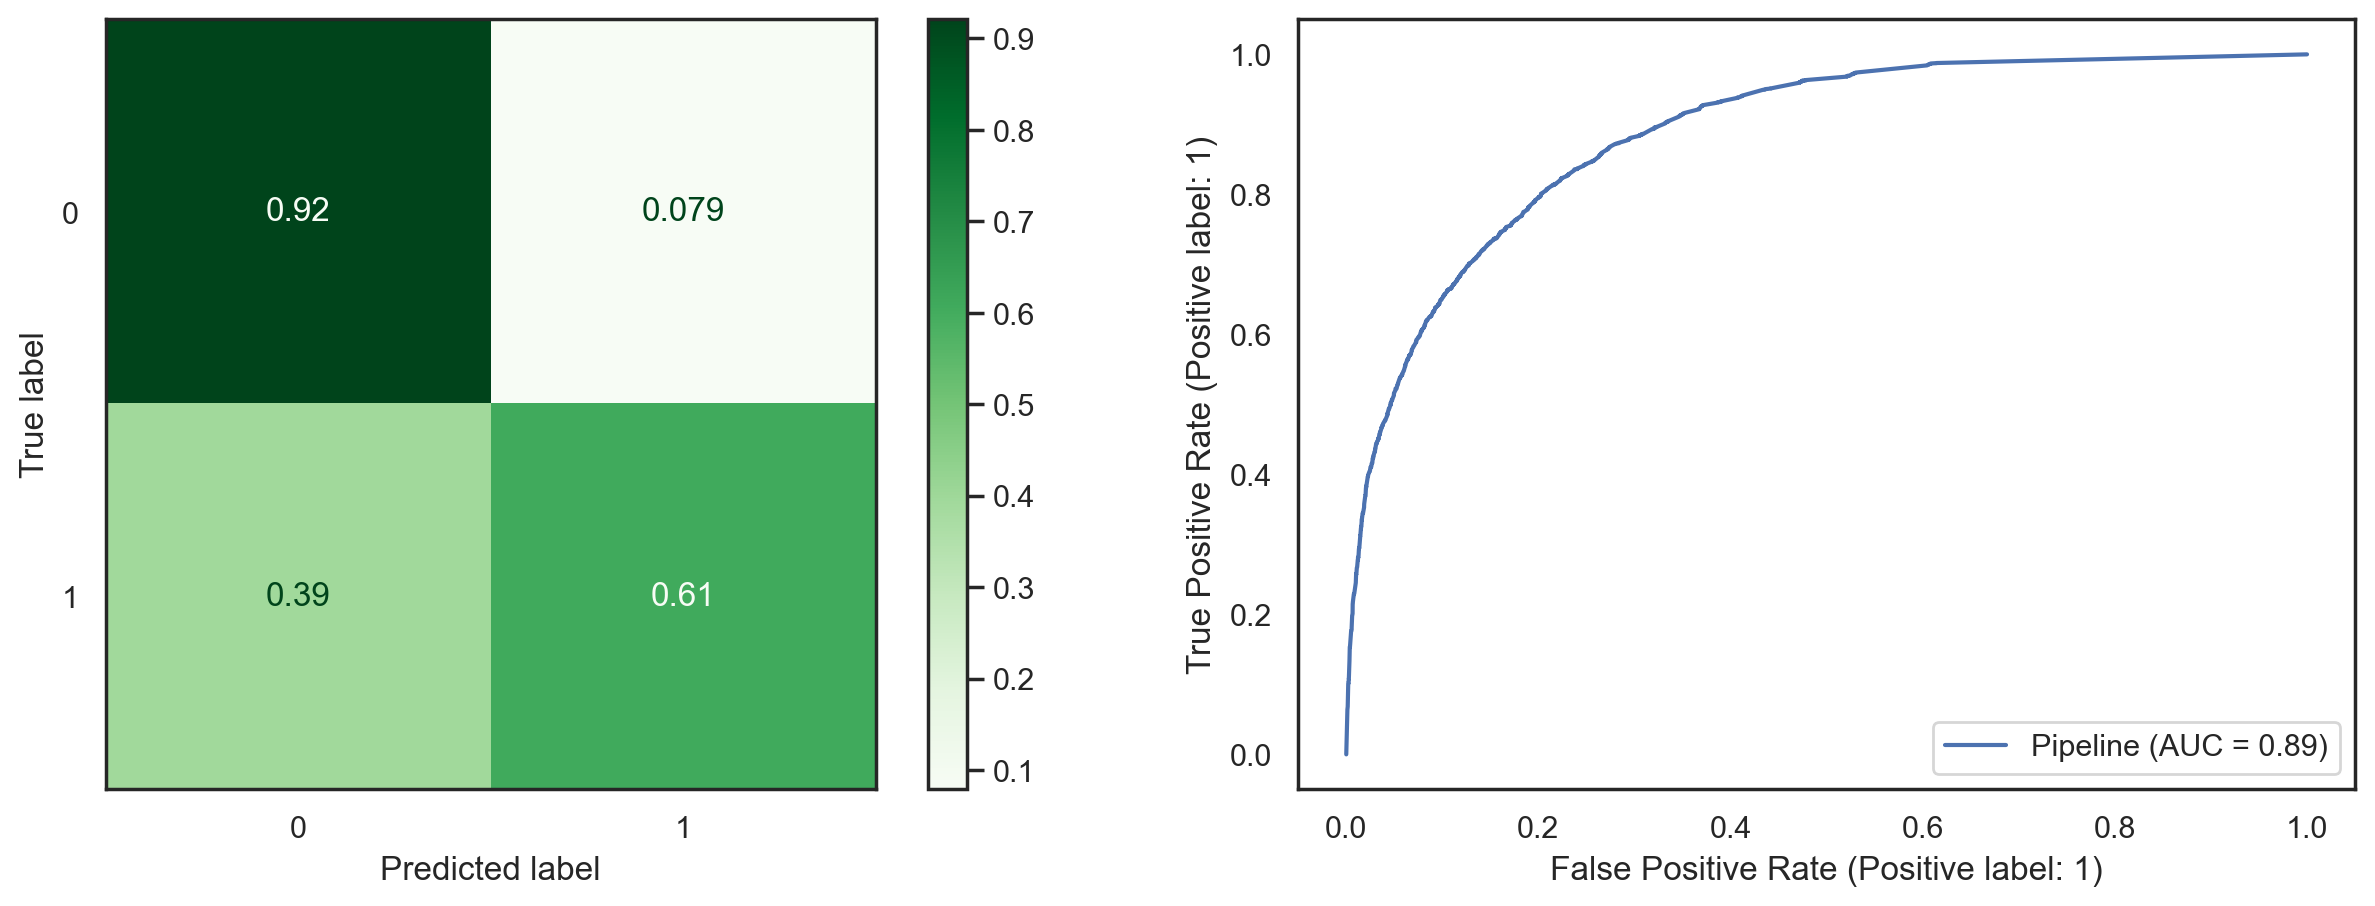

In [97]:
evaluate_classiffication(rf_pipe1, X_test, y_test, label='Test Data')

### Tuning

In [98]:
rf_grid1 = { 'randomforestclassifier__n_estimators': [200, 500],
                'randomforestclassifier__max_depth' : [4, 6, 8],
                'randomforestclassifier__criterion' :['gini', 'entropy']  
             }

In [99]:
# instantiate 
gs_rf_pipe1 = GridSearchCV(rf_pipe1, param_grid=rf_grid1)
gs_rf_pipe1

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [4, 6, 8],
                         'randomforestclassifier__n_estimators': [200, 500]})

In [100]:
%%time
# fit
gs_rf_pipe1.fit(X_train, y_train)

Wall time: 5min 37s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [4, 6, 8],
                         'randomforestclassifier__n_estimators': [200, 500]})

In [101]:
gs_rf_pipe1.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 8,
 'randomforestclassifier__n_estimators': 500}

### Best Model

In [102]:
# Best model 
rf_best1 = RandomForestClassifier(n_estimators=500, max_depth=8 ,criterion='gini')
rf_best1

RandomForestClassifier(max_depth=8, n_estimators=500)

In [103]:
rf_pipe1_best = make_pipeline(preprocessor, rf_best1)
rf_pipe1_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, n_estimators=500))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     27831
           1       0.87      0.46      0.60      8761

    accuracy                           0.85     36592
   macro avg       0.86      0.72      0.75     36592
weighted avg       0.86      0.85      0.84     36592



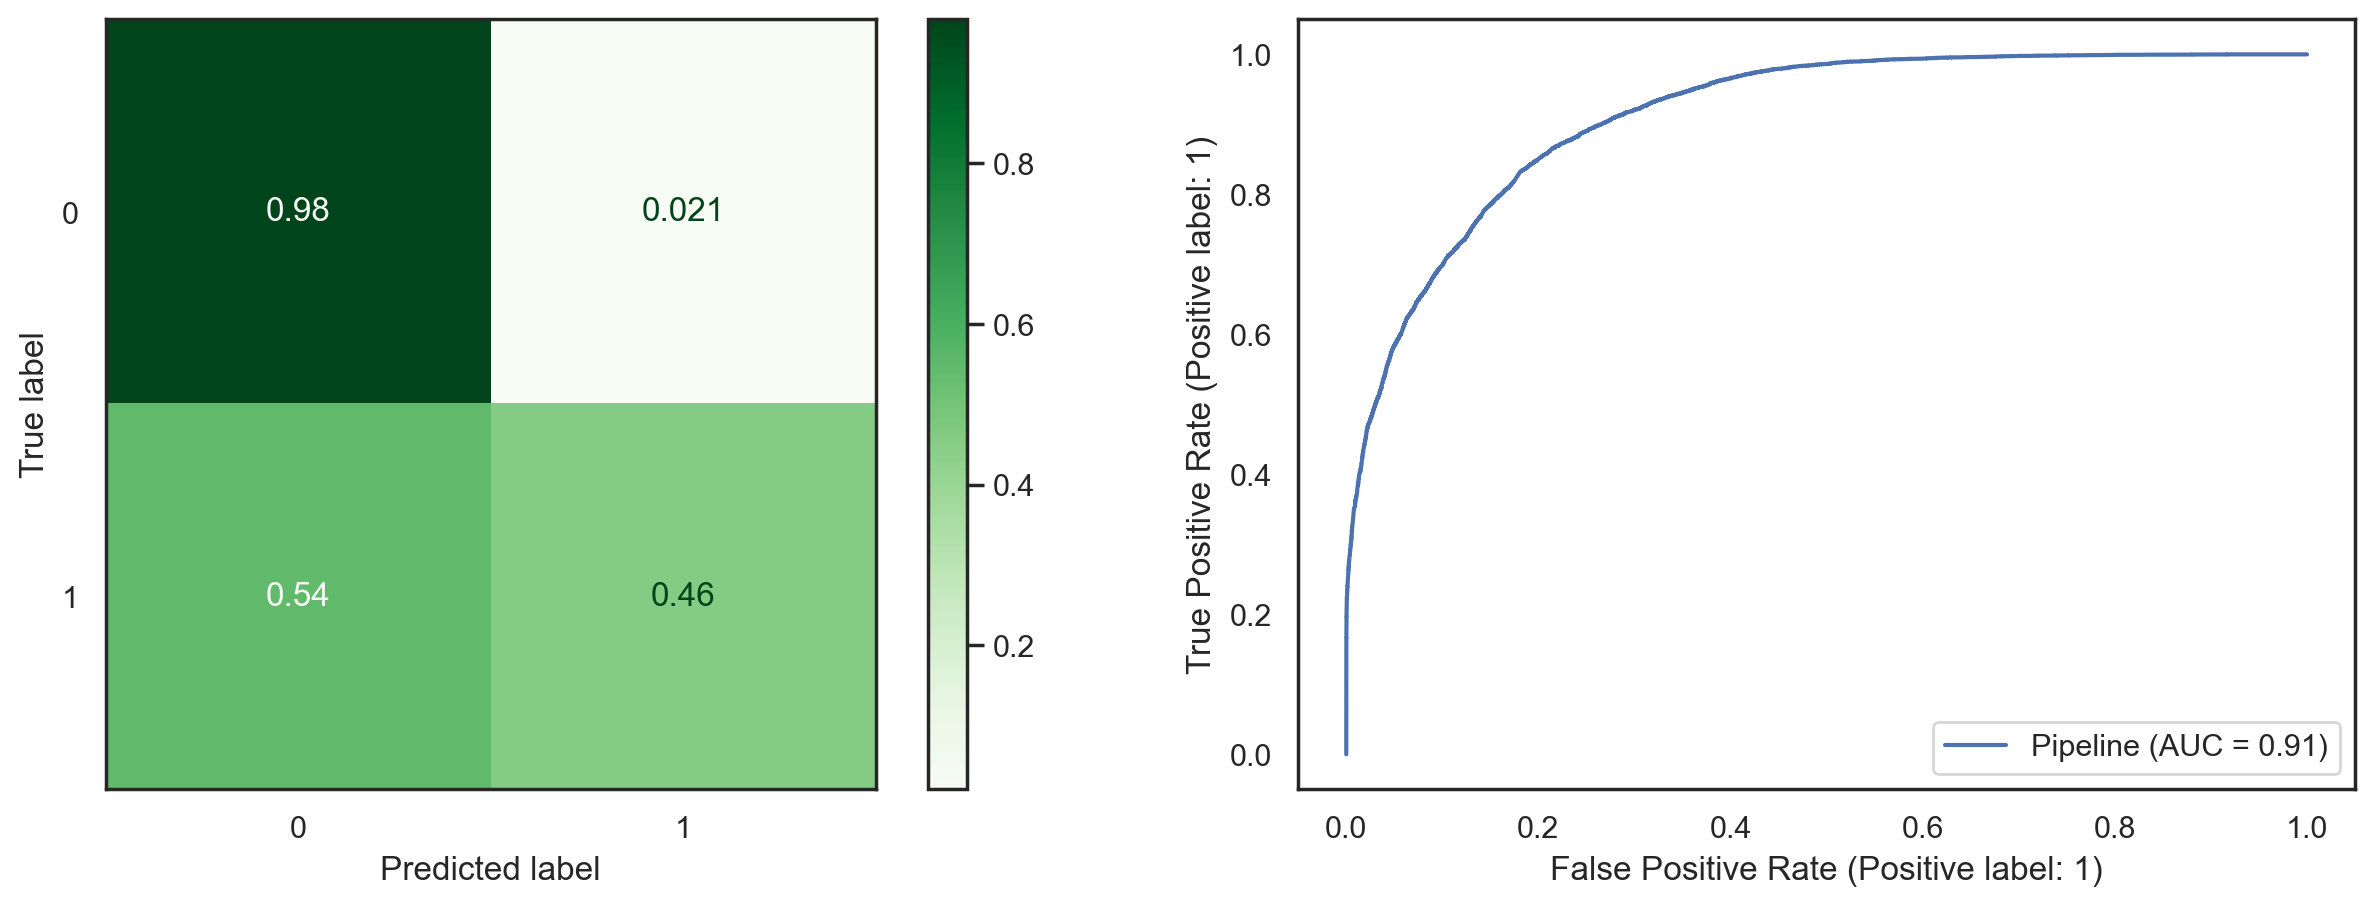

In [104]:
evaluate_classiffication(rf_pipe1_best, X_train, y_train, label='Train Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      9278
           1       0.87      0.43      0.58      2920

    accuracy                           0.85     12198
   macro avg       0.86      0.71      0.74     12198
weighted avg       0.85      0.85      0.83     12198



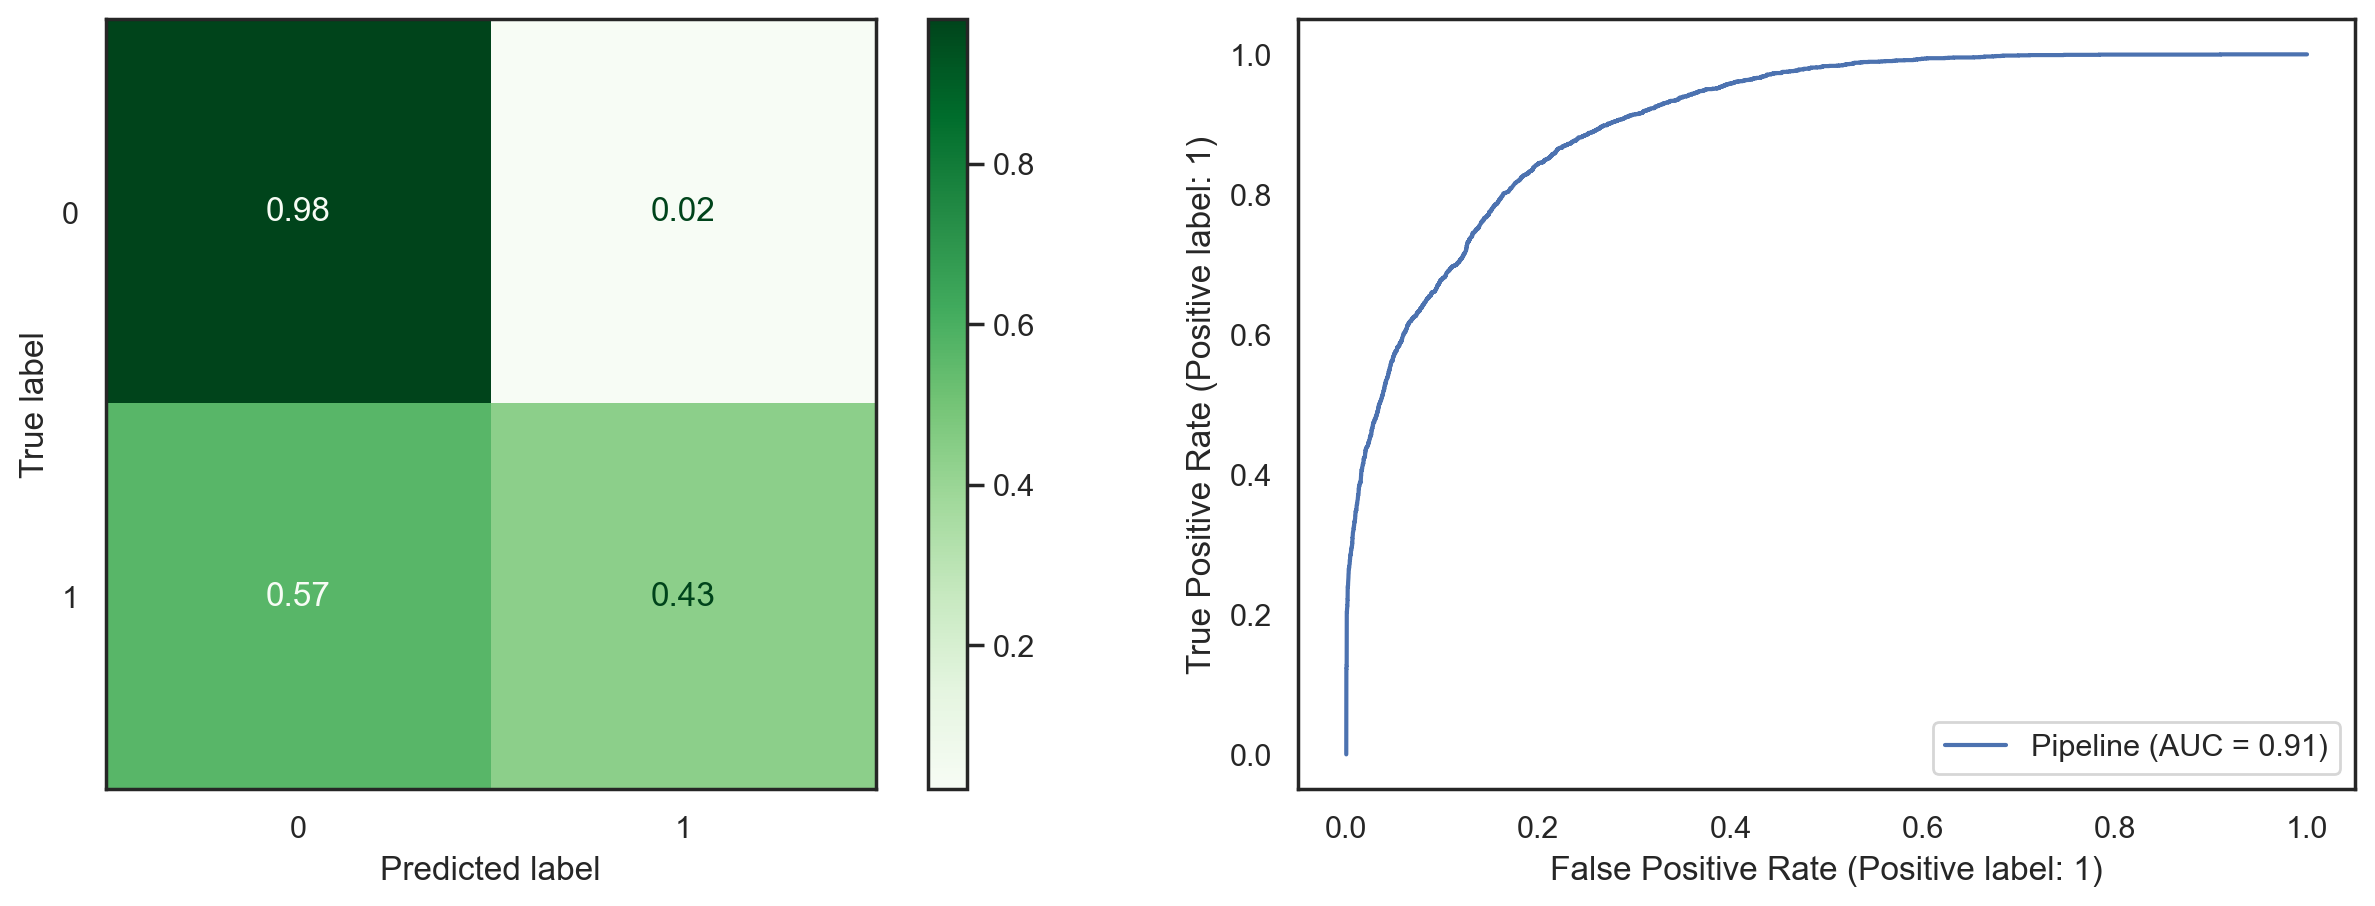

In [105]:
evaluate_classiffication(rf_pipe1_best, X_test, y_test, label='Test Data')

### Call Outs

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. <strong> Accuracy</strong> should be the most imporant metric for this analysis as we need to correctly predict the salaries. 
2. <strong>Higher Accuracy </strong>means a better model. 
3. Basic Model and the Tuned model both have the same Accuracy score, however, the AUC curve for tuned model is showed marginal improvement. Hence **tuned model is the winning model.** 
4. Relevant scores of the above two models are below: <br>

**Model Type** | **Score Type** | **Score**
--- | --- | -- 
Basic Model | Accuracy | 85%
Tuned Model | Accuracy | 85%
Basic Model | AUC Scores | 89% 
Tuned Model | AUC Scores | 91% 

## KNN 

### Basic Model

In [106]:
# fit and evaluate a RandomForestClassifier
knn_pipe1 = make_pipeline(preprocessor, KNeighborsClassifier())
knn_pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     27831
           1       0.78      0.71      0.74      8761

    accuracy                           0.88     36592
   macro avg       0.85      0.82      0.83     36592
weighted avg       0.88      0.88      0.88     36592



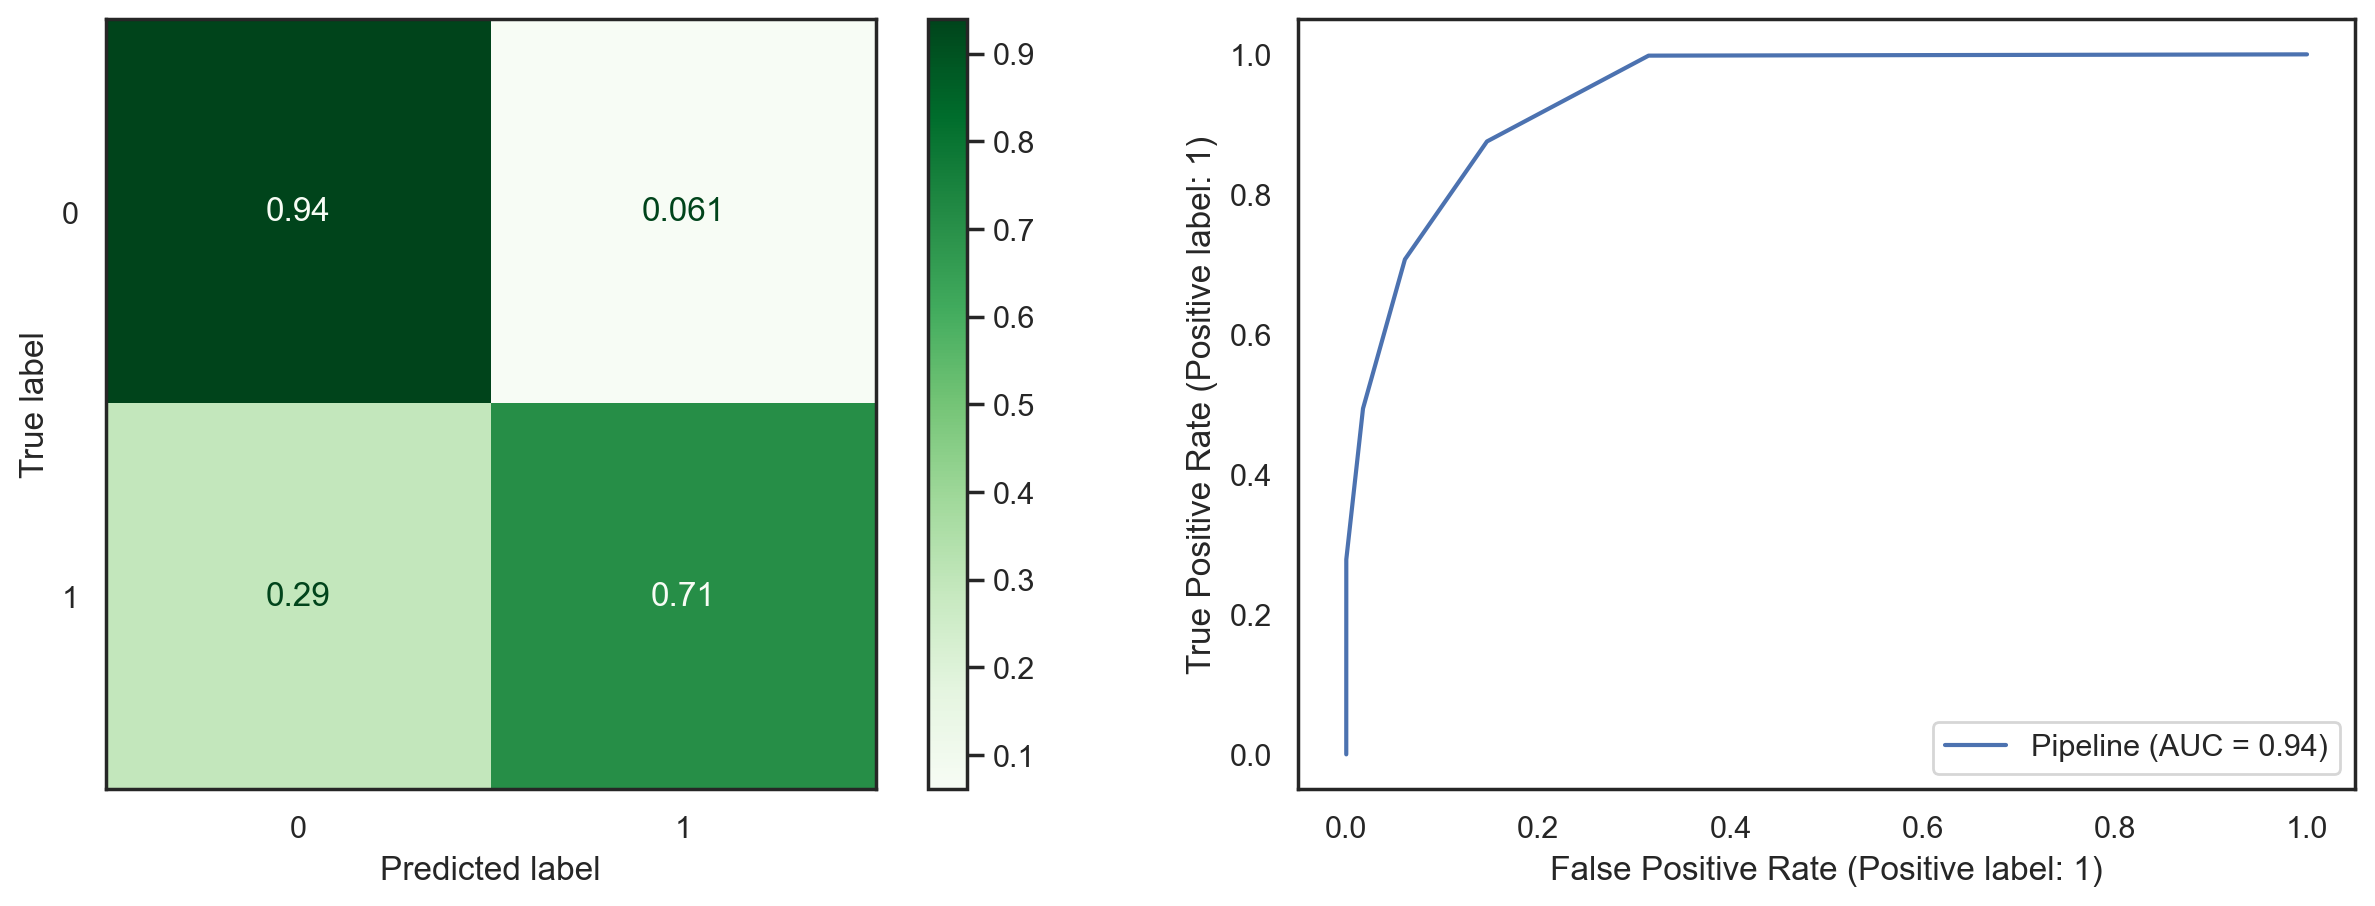

In [107]:
evaluate_classiffication(knn_pipe1, X_train, y_train, label='Train Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      9278
           1       0.68      0.59      0.63      2920

    accuracy                           0.83     12198
   macro avg       0.78      0.75      0.76     12198
weighted avg       0.83      0.83      0.83     12198



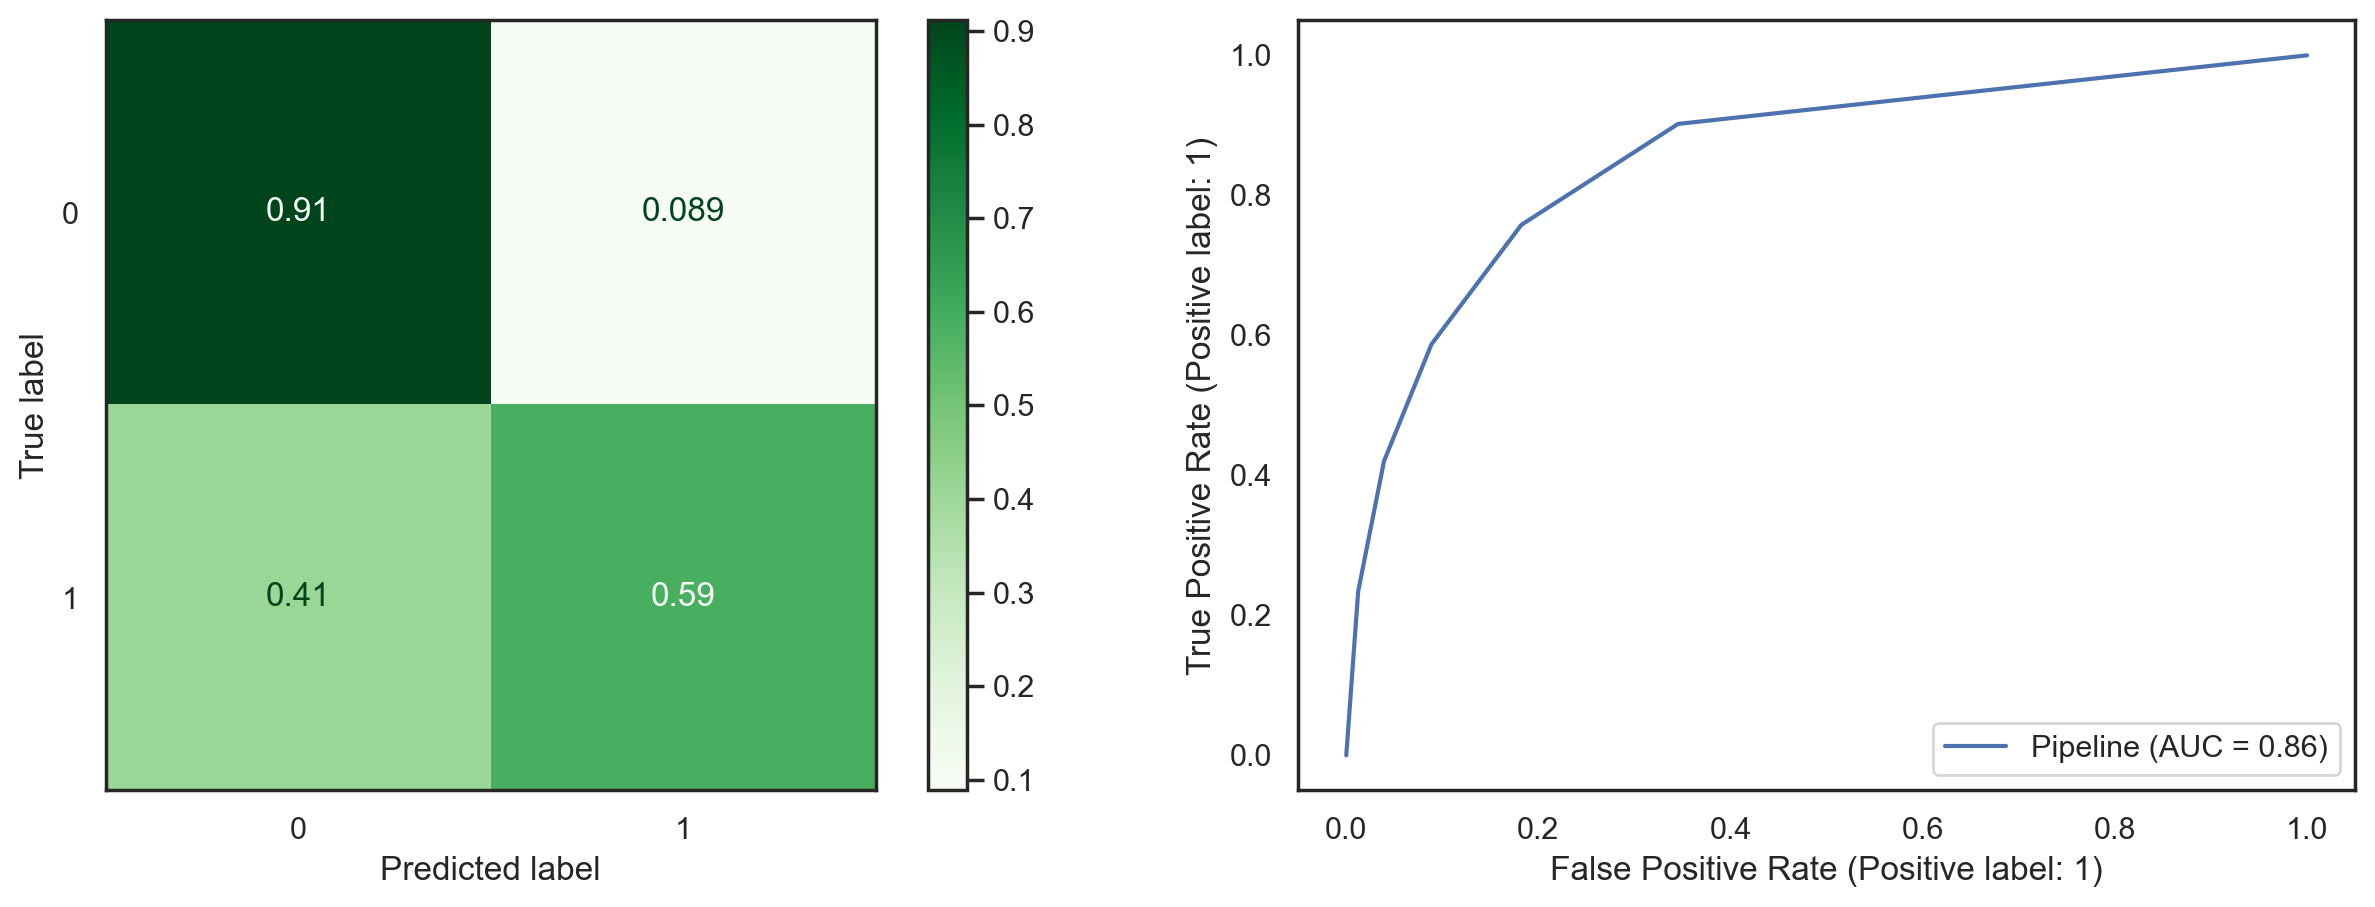

In [108]:
evaluate_classiffication(knn_pipe1, X_test, y_test, label='Test Data')

### Tuning

In [109]:
knn_parameters1 = { 'kneighborsclassifier__n_neighbors': [8, 10, 12, 14], 
                    'kneighborsclassifier__leaf_size':   [2, 5, 10, 15]} 

In [110]:
# Instantiate 
gs_knn_pipe1 = GridSearchCV(knn_pipe1, knn_parameters1)
gs_knn_pipe1

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [2, 5, 10, 15],
                         'kneighborsclassifier__n_neighbors': [8, 10, 12, 14]})

In [111]:
%%time 
# Fit GridSearch
gs_knn_pipe1.fit(X_train, y_train)

Wall time: 5min 54s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [2, 5, 10, 15],
                         'kneighborsclassifier__n_neighbors': [8, 10, 12, 14]})

In [112]:
gs_knn_pipe1.best_params_

{'kneighborsclassifier__leaf_size': 2, 'kneighborsclassifier__n_neighbors': 14}

### Best Model

In [113]:
# Extract KNN Model with best hyperparameters.
knn_best = KNeighborsClassifier(leaf_size=2, n_neighbors=14 )
knn_best

KNeighborsClassifier(leaf_size=2, n_neighbors=14)

In [114]:
knn_pipe1_best = make_pipeline(preprocessor, knn_best)
knn_pipe1_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=14))])

In [115]:
knn_pipe1_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=14))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27831
           1       0.78      0.60      0.68      8761

    accuracy                           0.86     36592
   macro avg       0.83      0.77      0.79     36592
weighted avg       0.86      0.86      0.86     36592



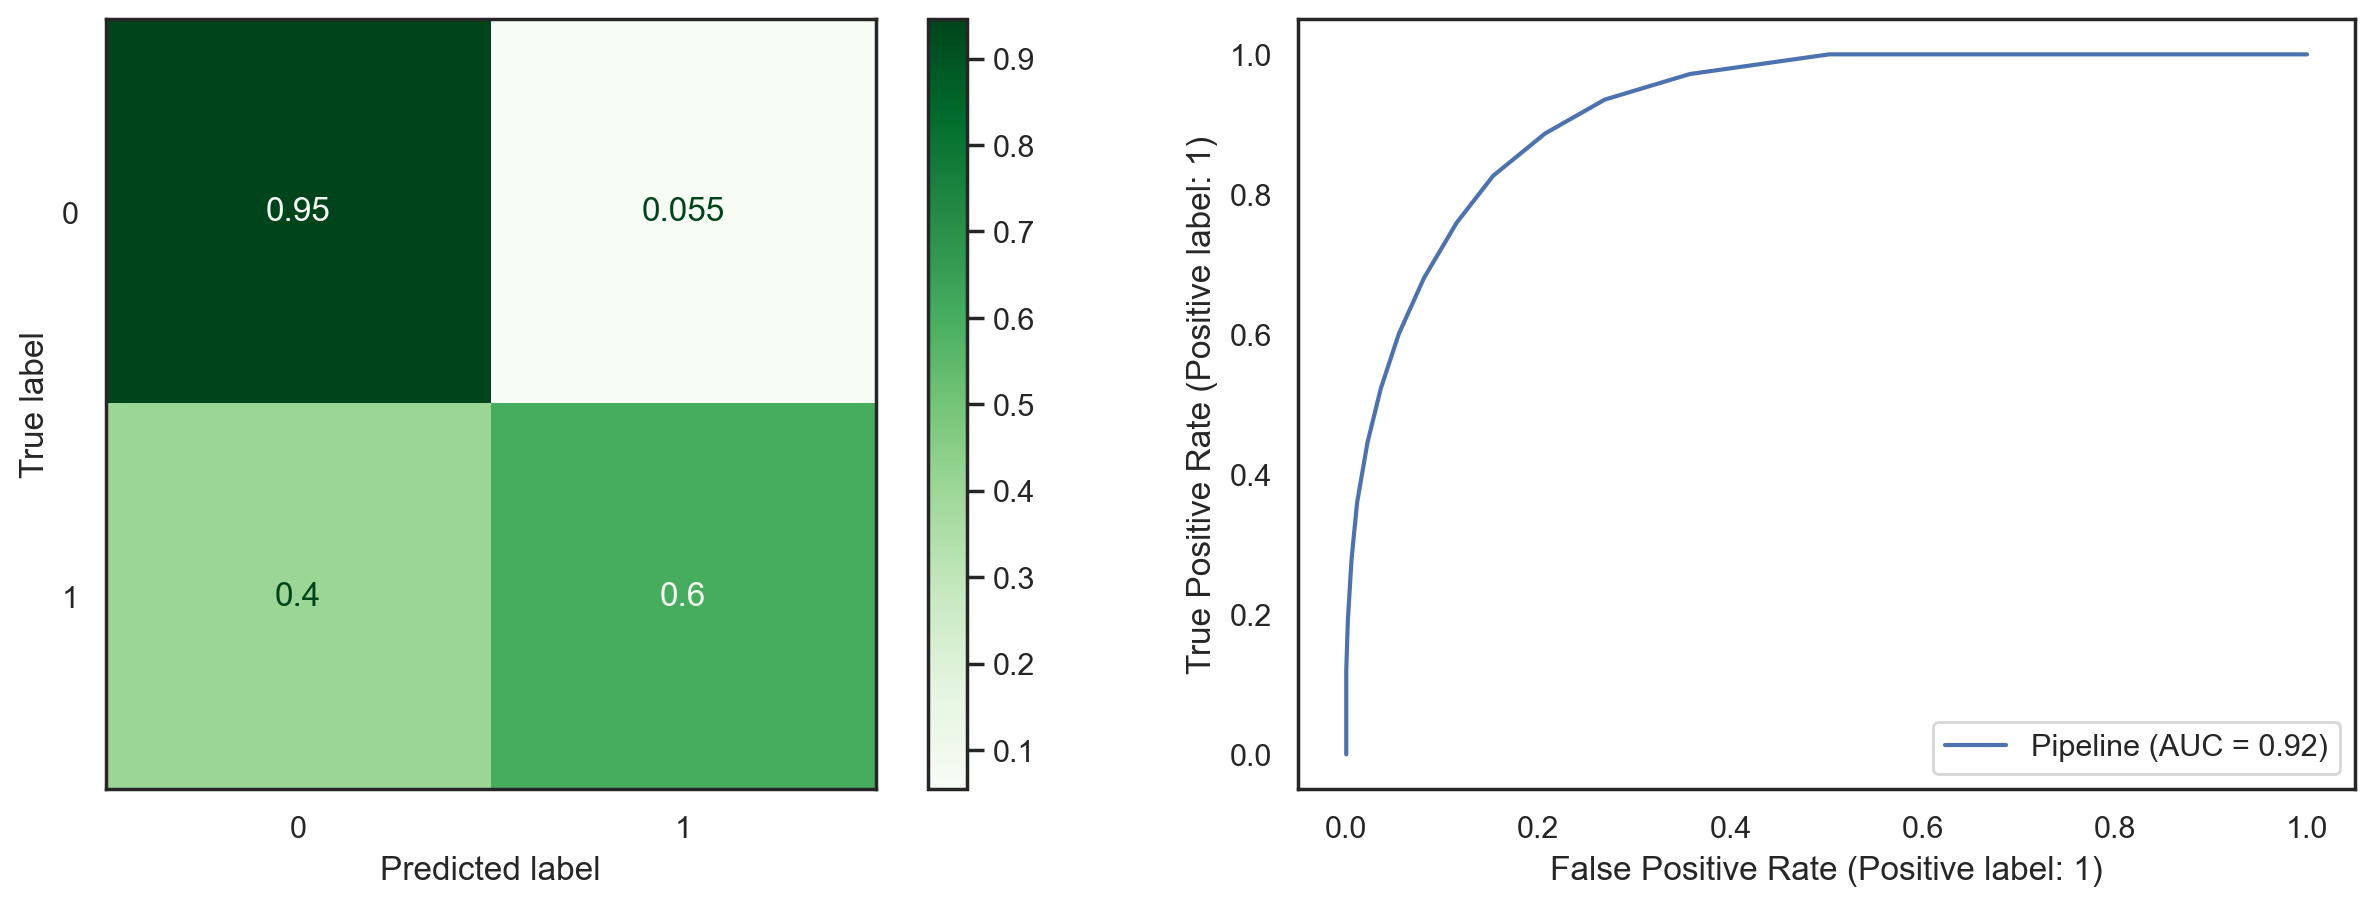

In [116]:
evaluate_classiffication(knn_pipe1_best, X_train, y_train, label='Train Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9278
           1       0.72      0.55      0.62      2920

    accuracy                           0.84     12198
   macro avg       0.79      0.74      0.76     12198
weighted avg       0.83      0.84      0.83     12198



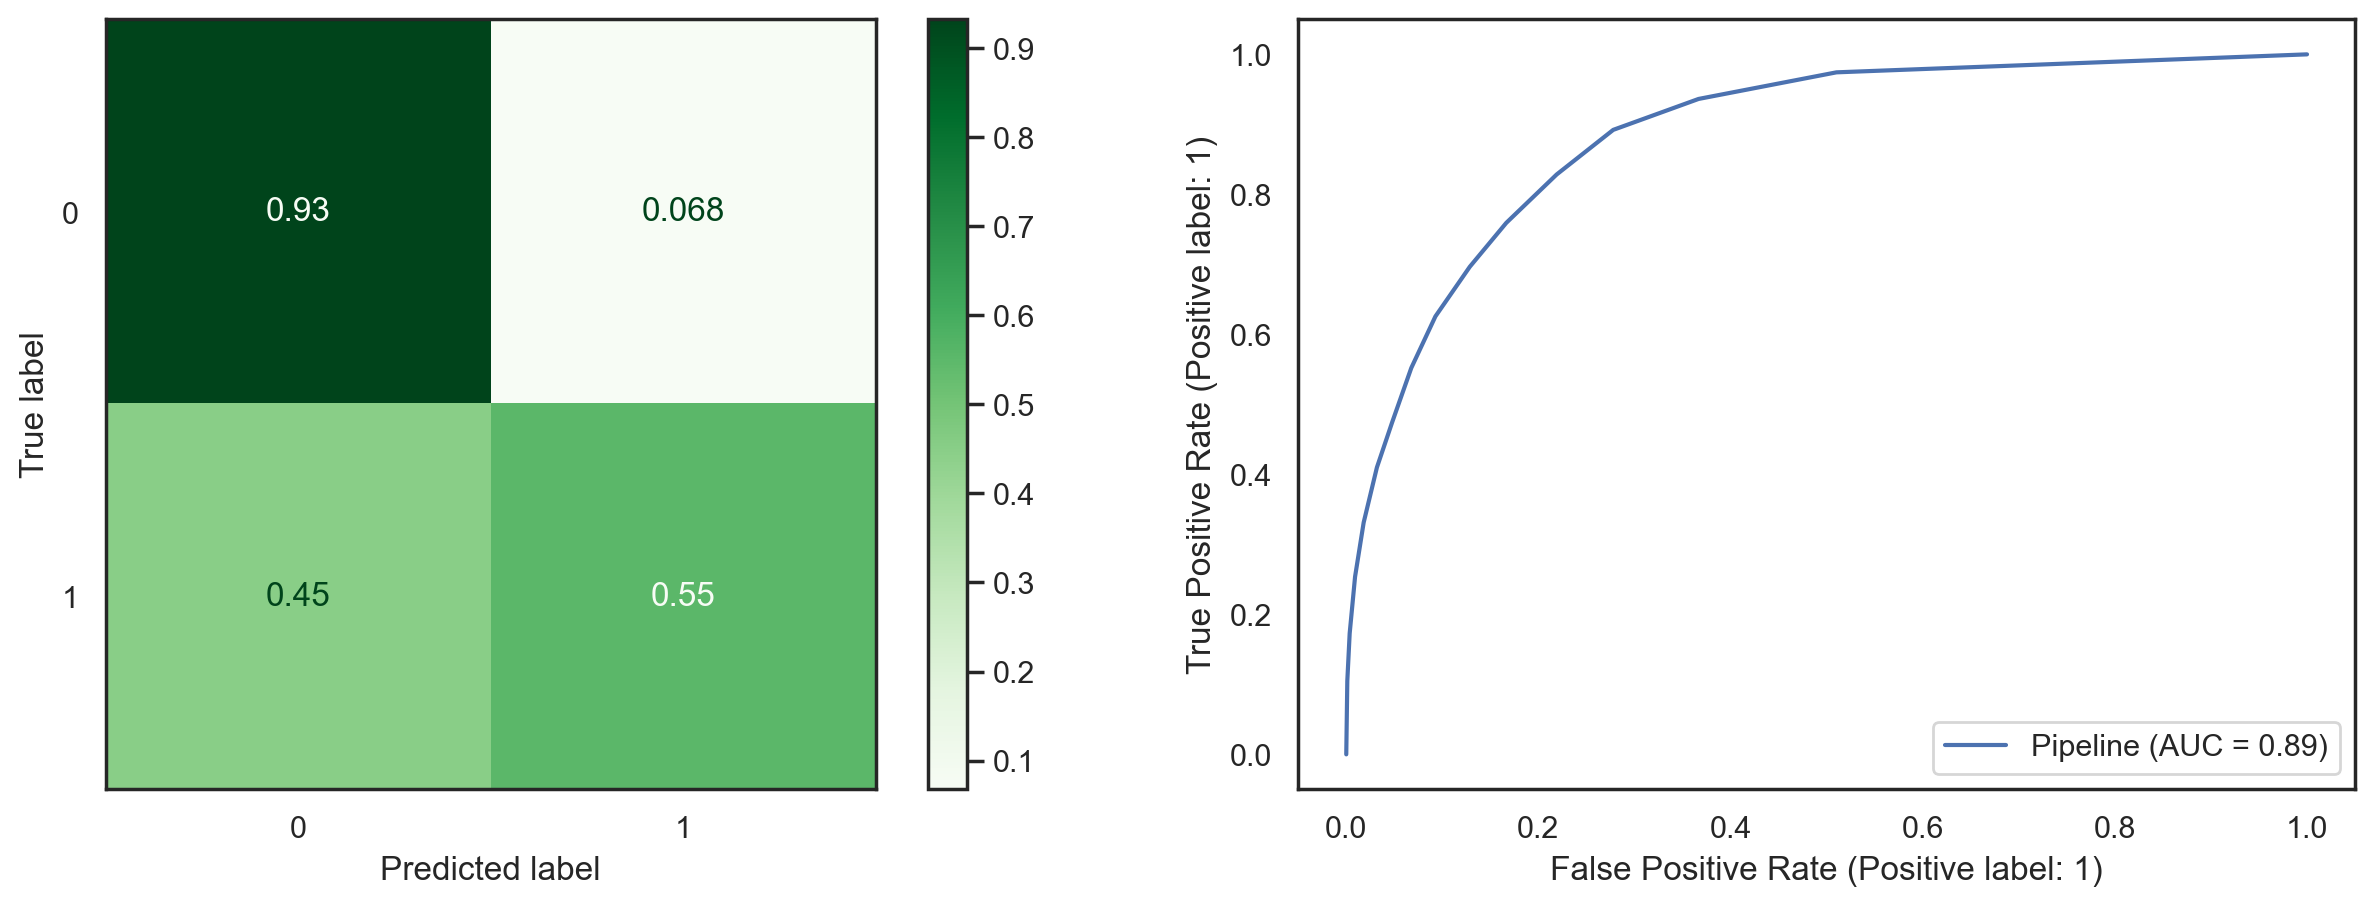

In [117]:
evaluate_classiffication(knn_pipe1_best, X_test, y_test, label='Test Data')

### Call outs

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. <strong> Accuracy</strong> should be the most imporant metric for this analysis as we need to correctly predict the salaries. 
2. <strong>Higher Accuracy </strong>means a better model. 
3. Tuned model showed marginal improvement in Accuracy score and hence is the winning model. 
4. Relevant scores of the above two models are below: <br>

**Model Type** | **Score Type** | **Score**
--- | --- | -- 
Basic Model | Accuracy | 83%
Tuned Model | Accuracy | 84%
Basic Model | AUC Scores | 86% 
Tuned Model | AUC Scores | 89% 

## Comparing both the models

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Out of all the models without feature engineering, the <strong> tuned Random Forest </strong> is the model with the highest **Accuracy** score of 85% compared. This is compared to tuned KNN model with Accuracy score of 84%. 

<h1 style="color:green"><b>Feature Engineering Model Build</b> </h1> 

## Random Forest 

### Basic Model 

In [118]:
# fit and evaluate a RandomForestClassifier
rf_pipe2 = make_pipeline(preprocessor, PCA(n_components=0.95), RandomForestClassifier(random_state=42))
rf_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27831
           1       0.96      0.94      0.95      8761

    accuracy                           0.97     36592
   macro avg       0.97      0.96      0.96     36592
weighted avg       0.97      0.97      0.97     36592



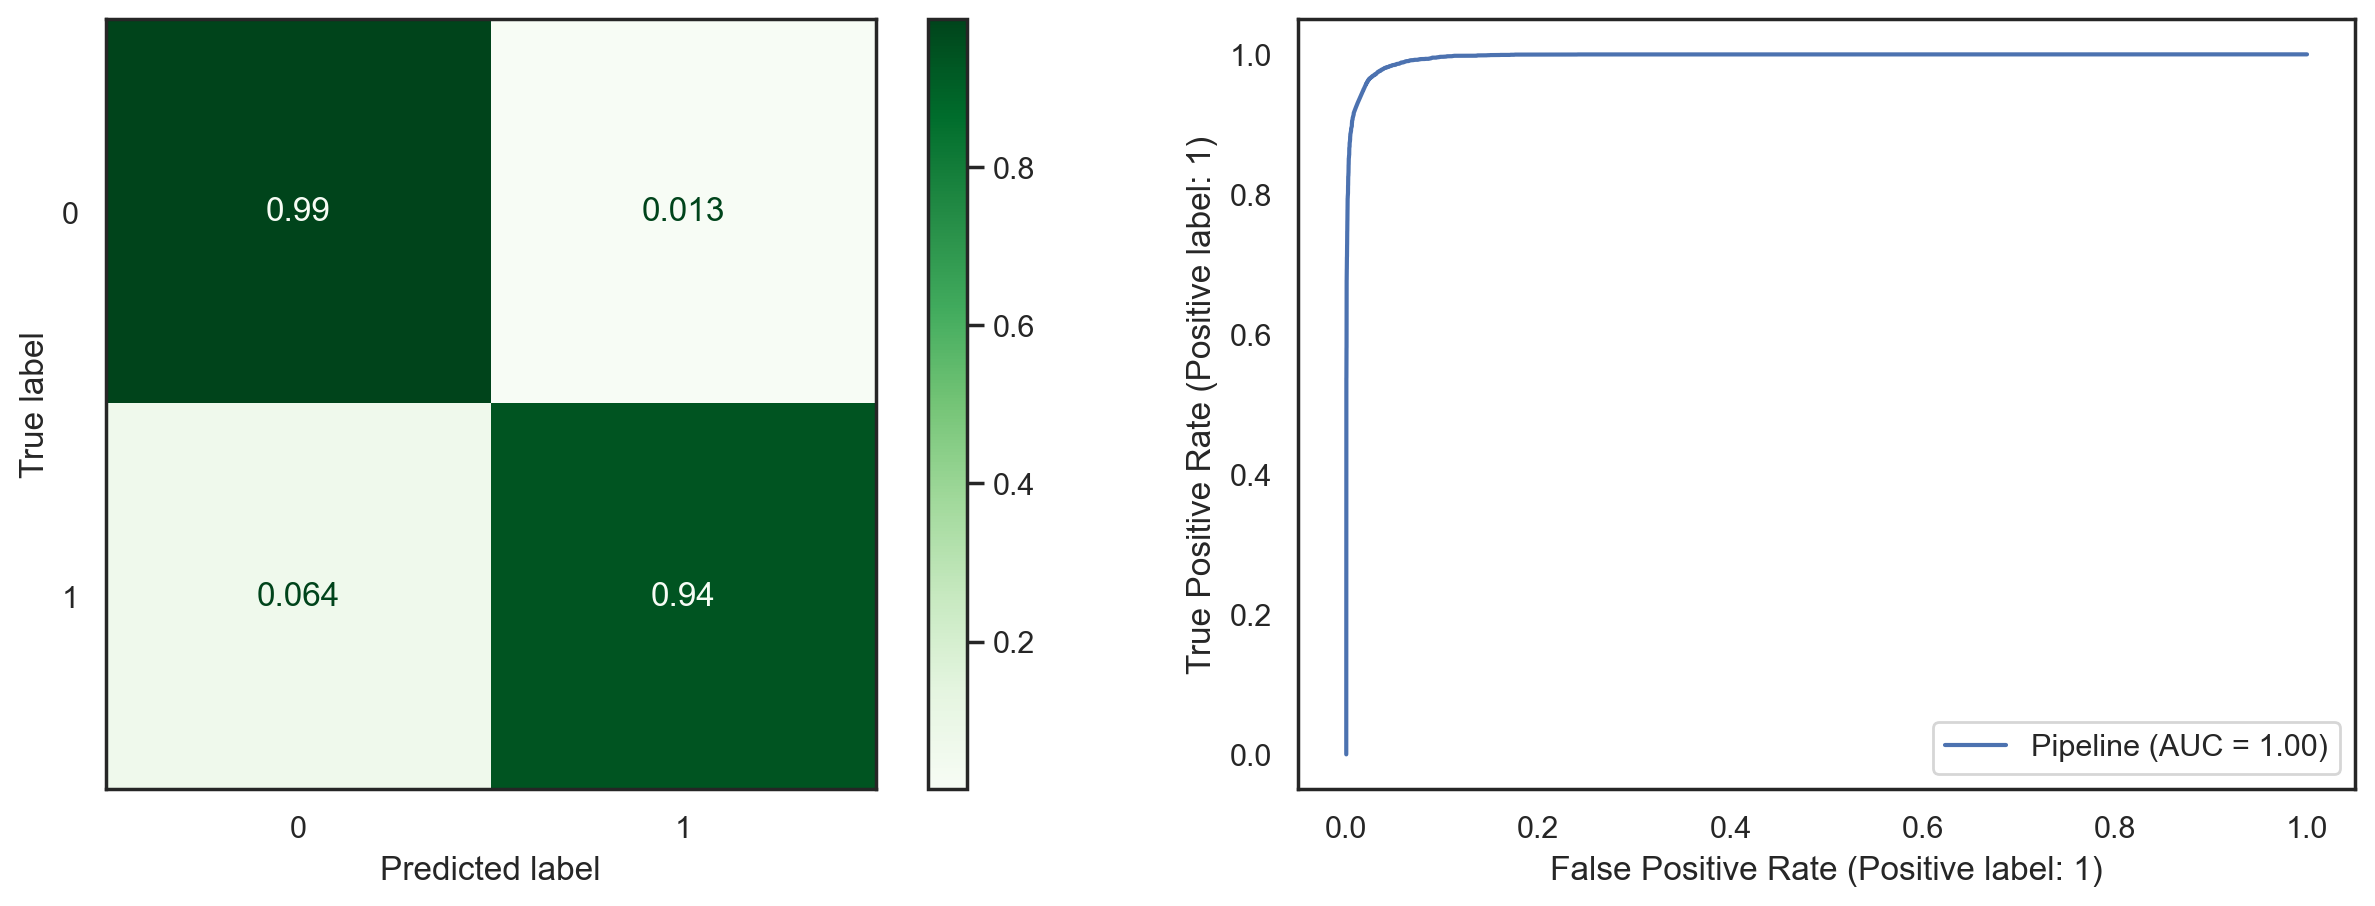

In [119]:
evaluate_classiffication(rf_pipe2, X_train, y_train, label='Train Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9278
           1       0.71      0.57      0.64      2920

    accuracy                           0.84     12198
   macro avg       0.79      0.75      0.77     12198
weighted avg       0.84      0.84      0.84     12198



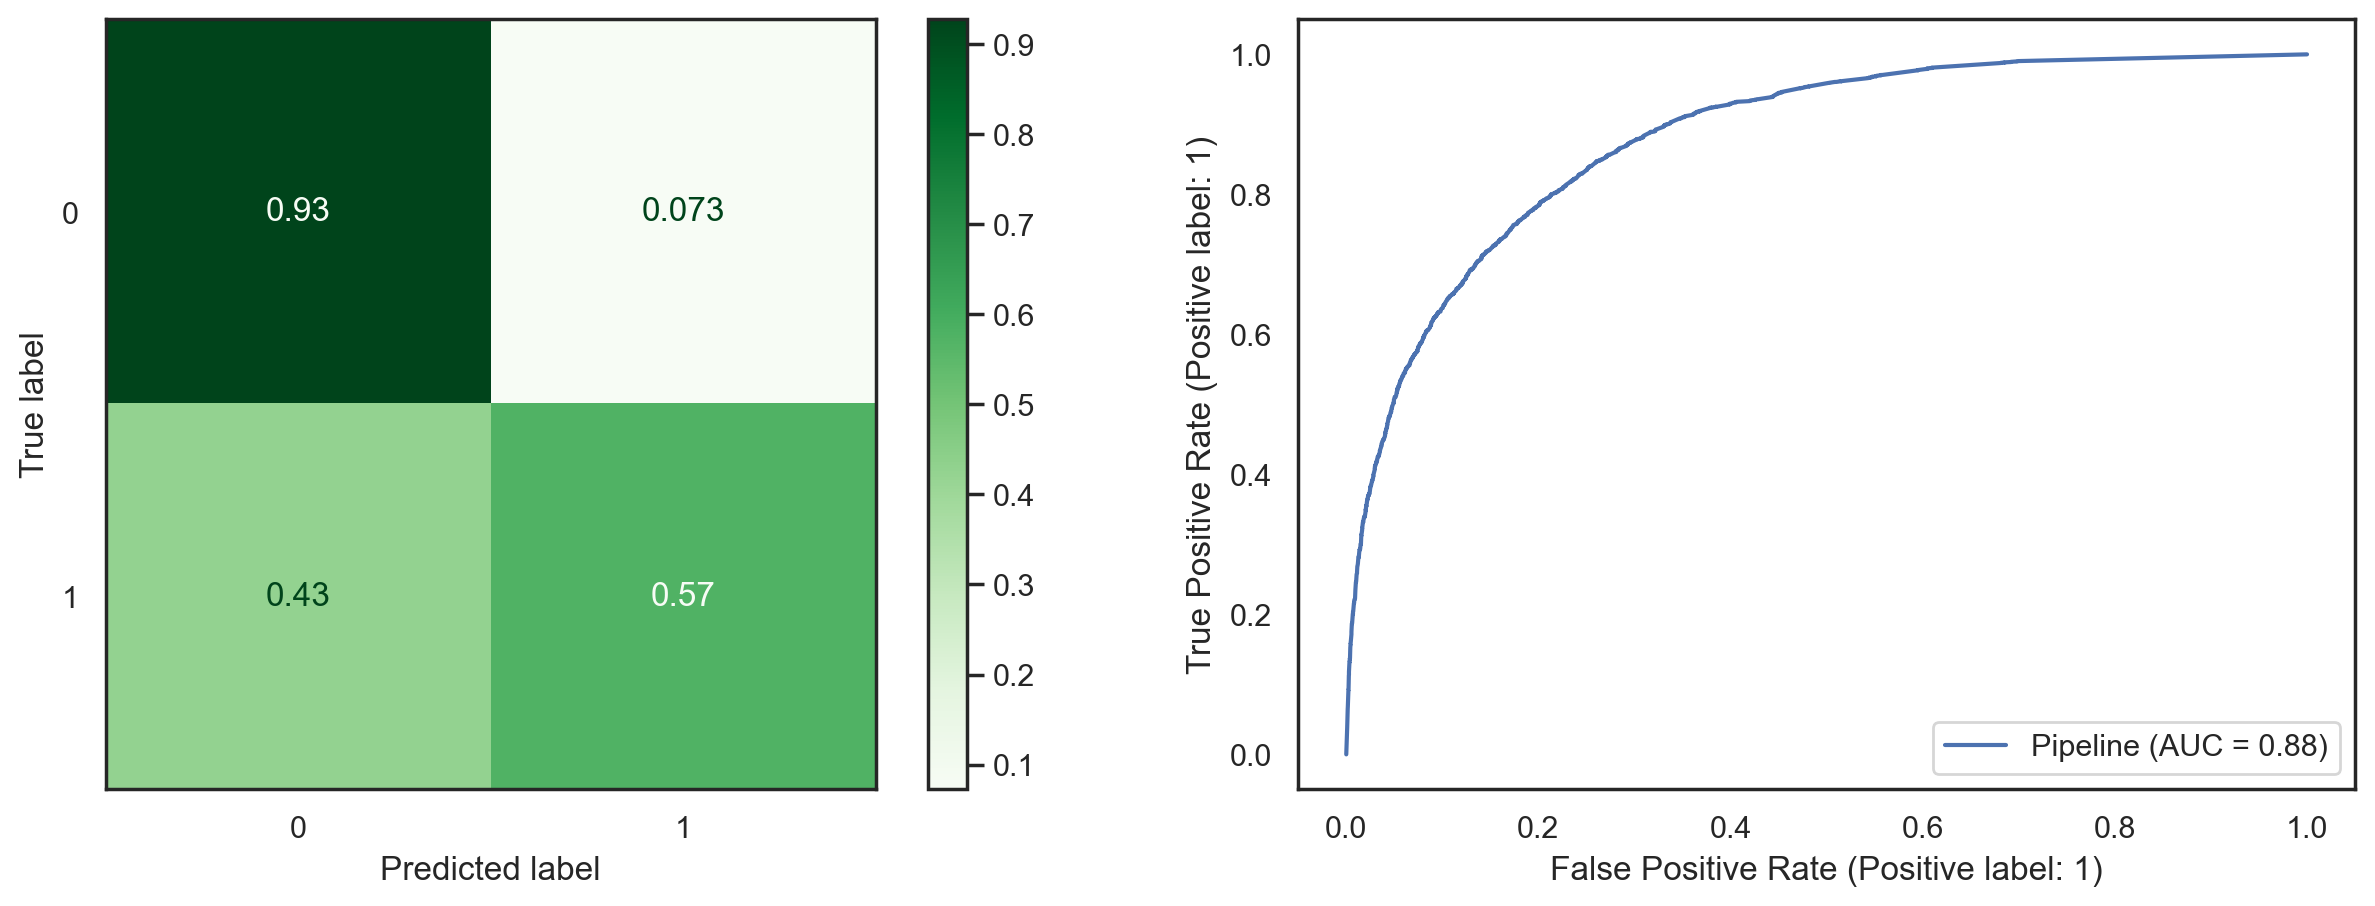

In [120]:
evaluate_classiffication(rf_pipe2, X_test, y_test, label='Test Data')

### Tuning 

In [121]:
rf_grid2 = {'randomforestclassifier__n_estimators': [200, 500],
            'randomforestclassifier__max_depth'   : [4, 6, 8],
            'randomforestclassifier__criterion'   : ['gini', 'entropy']  
            }

In [122]:
# instantiate 
gs_rf_pipe2 = GridSearchCV(rf_pipe2, param_grid=rf_grid2)
gs_rf_pipe2

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [4, 6, 8],
                         'randomforestclassifier__n_estimators': [200, 500]})

In [123]:
%%time
#fit
gs_rf_pipe2.fit(X_train, y_train)

Wall time: 28min 10s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                                       ('pca', PCA(n_components=0.95)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': [4, 6, 8],
                         'randomforestclassifier__n_estimators': [200, 500]})

In [124]:
gs_rf_pipe2.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': 8,
 'randomforestclassifier__n_estimators': 200}

### Best Model

In [125]:
# Best model 
rf_best2 = RandomForestClassifier(n_estimators=200, max_depth=8 ,criterion='gini')
rf_best2

RandomForestClassifier(max_depth=8, n_estimators=200)

In [126]:
rf_pipe2_best = make_pipeline(preprocessor, PCA(n_components=0.95), rf_best2)
rf_pipe2_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, n_estimators=200))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     27831
           1       0.82      0.55      0.66      8761

    accuracy                           0.86     36592
   macro avg       0.85      0.76      0.79     36592
weighted avg       0.86      0.86      0.85     36592



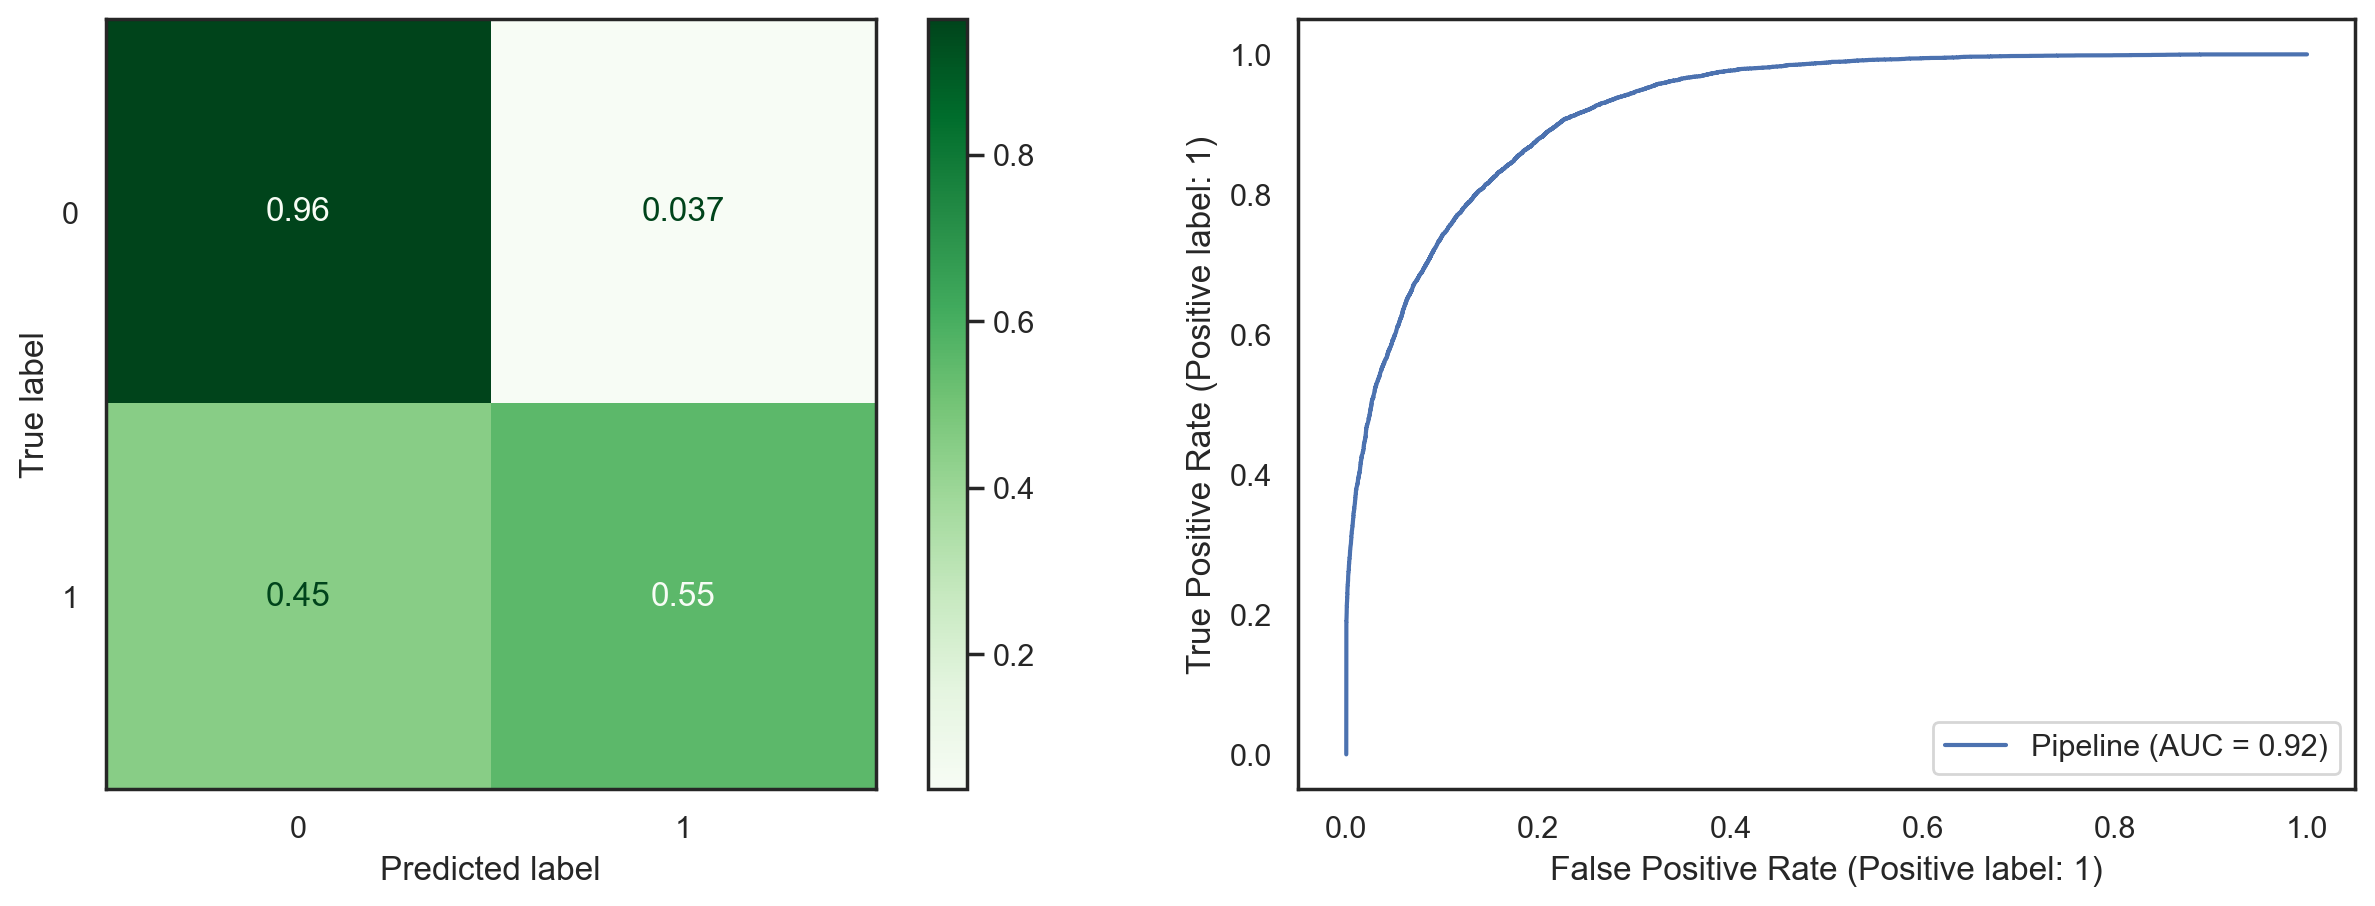

In [127]:
evaluate_classiffication(rf_pipe2_best, X_train, y_train, label='Train Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      9278
           1       0.80      0.51      0.62      2920

    accuracy                           0.85     12198
   macro avg       0.83      0.74      0.77     12198
weighted avg       0.85      0.85      0.84     12198



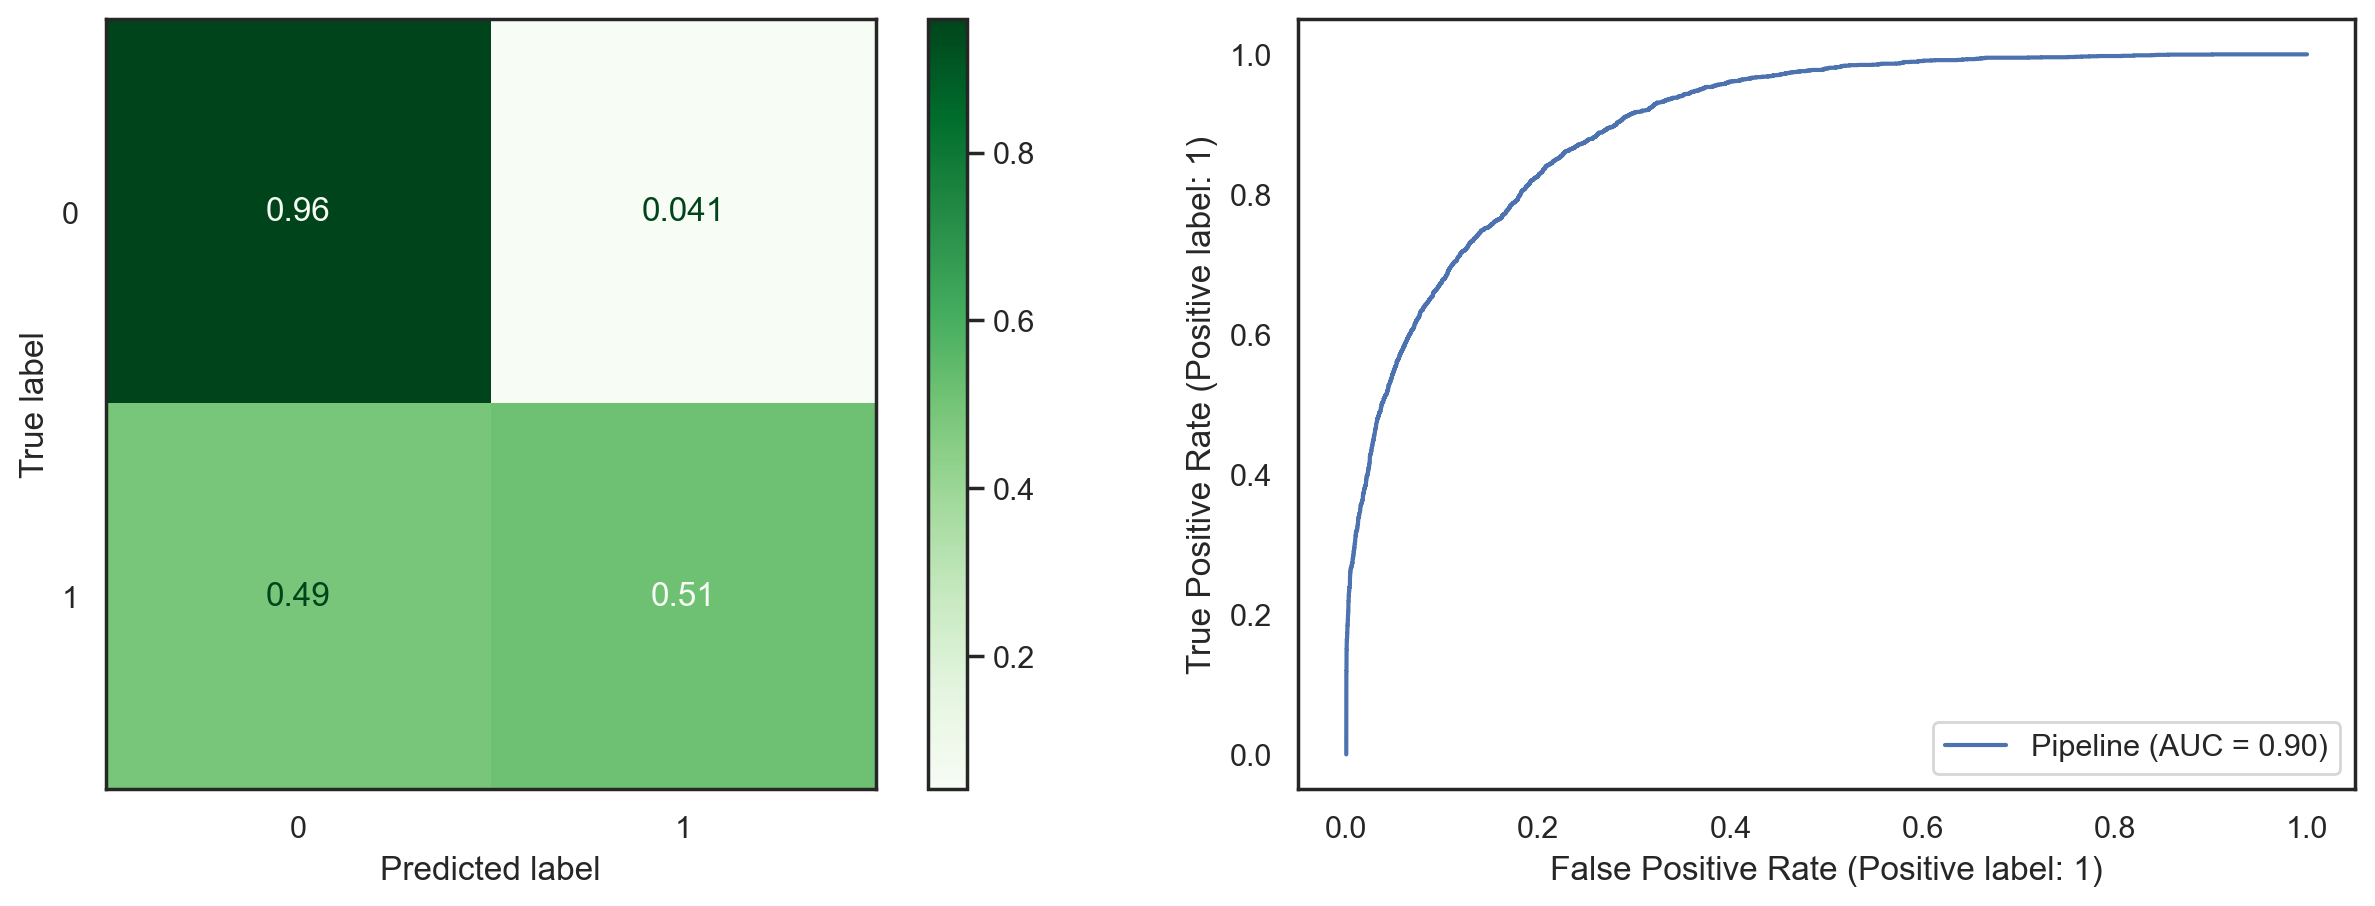

In [128]:
evaluate_classiffication(rf_pipe2_best, X_test, y_test, label='Test Data')

### Calls Outs

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. <strong> Accuracy</strong> should be the most imporant metric for this analysis as we need to correctly predict the salaries. 
2. <strong>Higher Accuracy </strong>means a better model. 
3. Tuned model showed marginal improvement in Accuracy score and hence is the winning model.  
4. Relevant scores of the above two models are below: <br>

**Model Type** | **Score Type** | **Score**
--- | --- | -- 
Basic Model | Accuracy | 84%
Tuned Model | Accuracy | 85%
Basic Model | AUC Scores | 88% 
Tuned Model | AUC Scores | 90% 

## KNN 

### Basic Model

In [129]:
# fit and evaluate a RandomForestClassifier
knn_pipe2 = make_pipeline(preprocessor, PCA(n_components=0.95), KNeighborsClassifier())
knn_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     27831
           1       0.79      0.69      0.74      8761

    accuracy                           0.88     36592
   macro avg       0.85      0.82      0.83     36592
weighted avg       0.88      0.88      0.88     36592



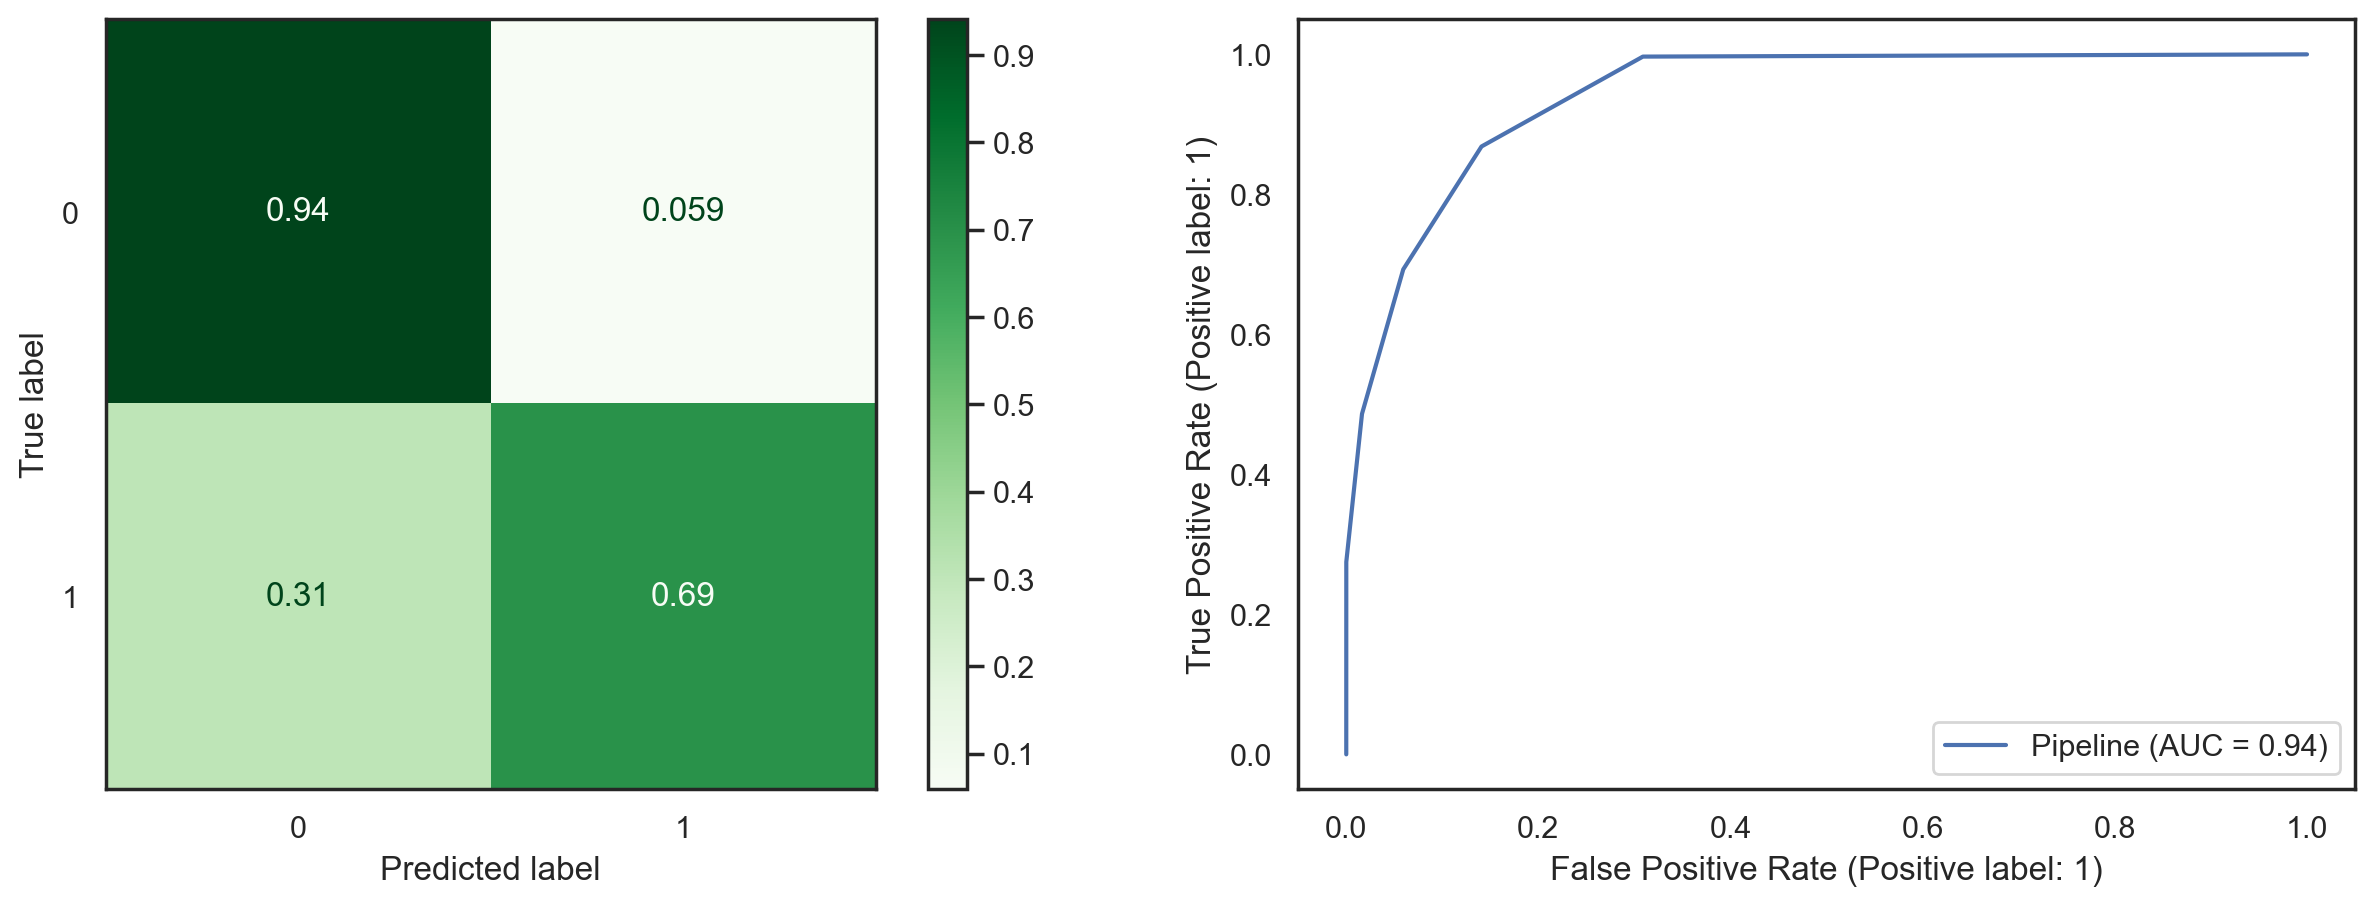

In [130]:
evaluate_classiffication(knn_pipe2, X_train, y_train, label='Train Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9278
           1       0.68      0.57      0.62      2920

    accuracy                           0.83     12198
   macro avg       0.77      0.74      0.76     12198
weighted avg       0.82      0.83      0.83     12198



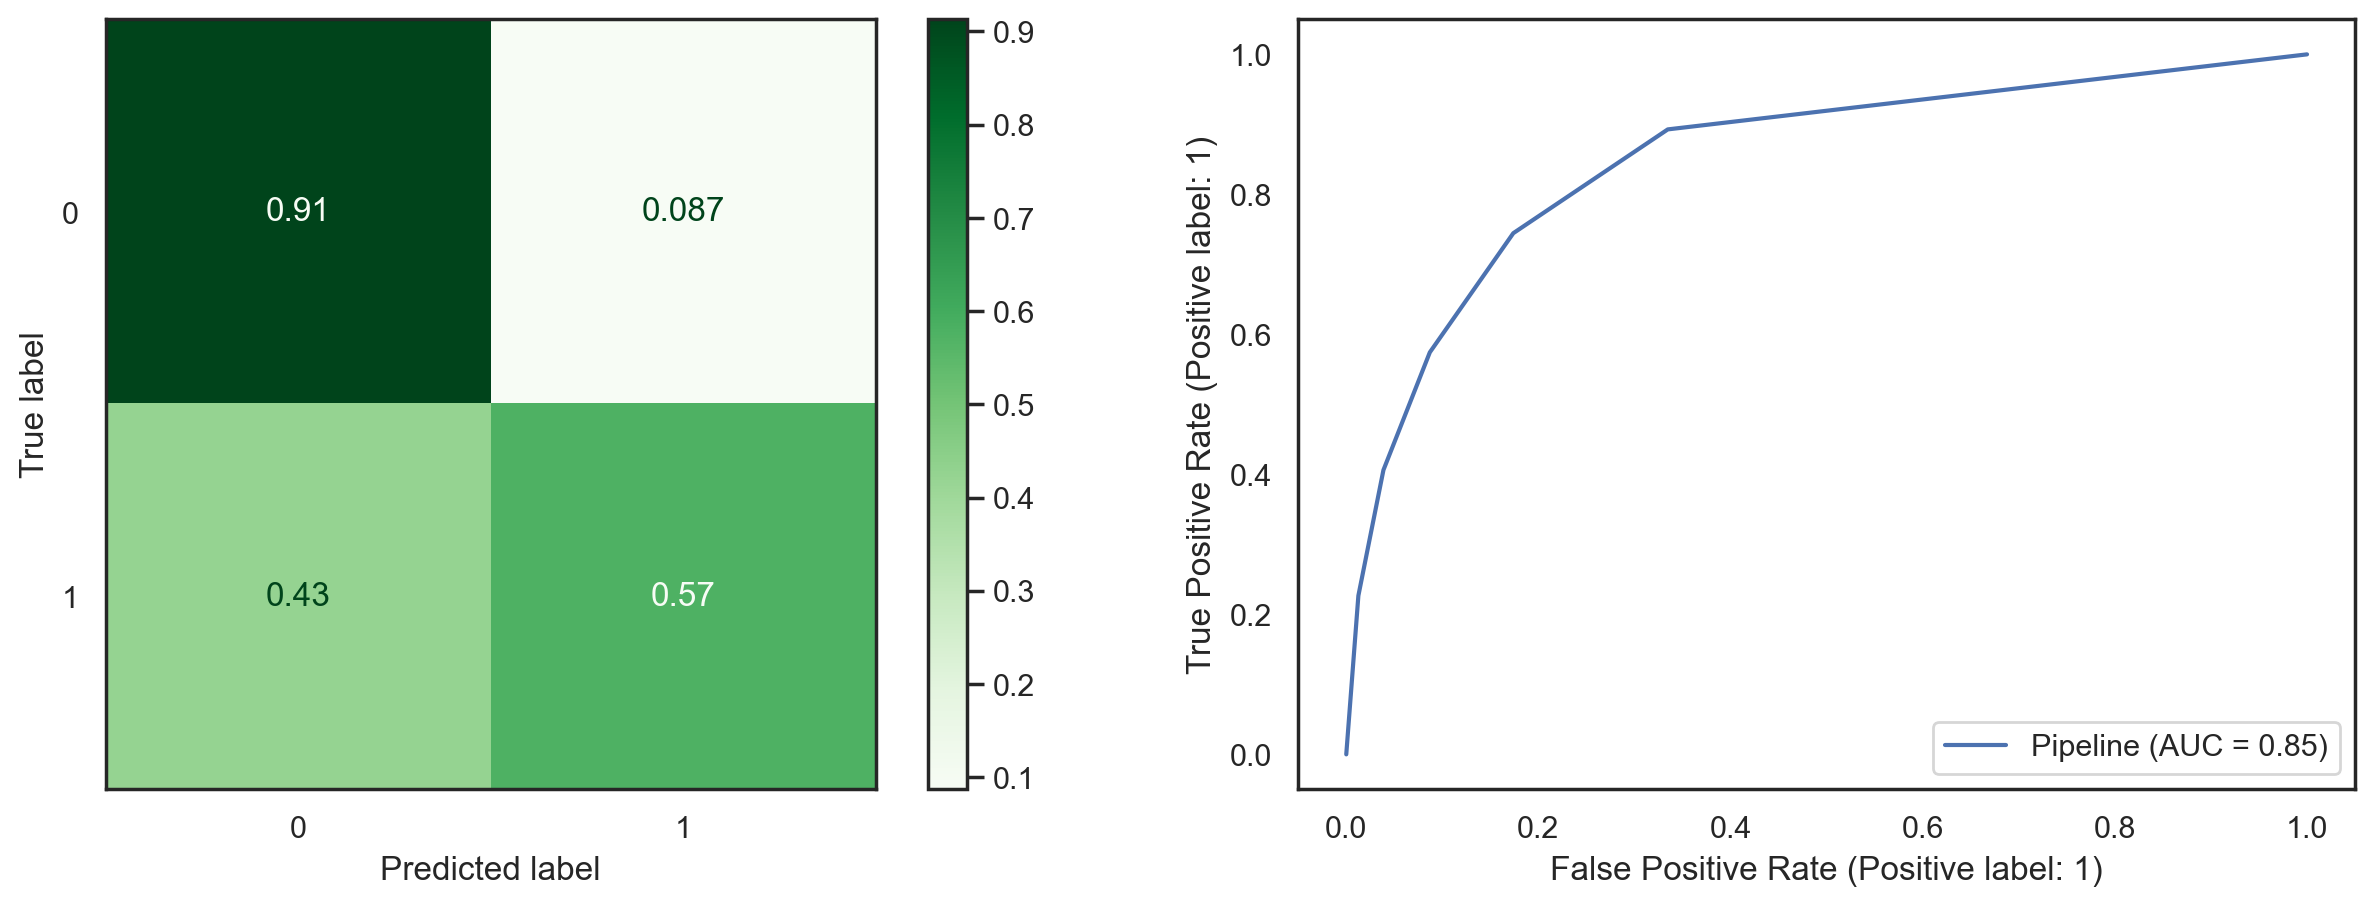

In [131]:
evaluate_classiffication(knn_pipe2, X_test, y_test, label='Test Data')

### Tuning

In [132]:
knn_parameters2 = { 'kneighborsclassifier__n_neighbors': [8, 10, 12, 14], 
                    'kneighborsclassifier__leaf_size':   [2, 5, 10, 15]} 

In [133]:
# Instantiate 
gs_knn_pipe2 = GridSearchCV(knn_pipe1, knn_parameters2)
gs_knn_pipe2

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [2, 5, 10, 15],
                         'kneighborsclassifier__n_neighbors': [8, 10, 12, 14]})

In [134]:
%%time 
# Fit GridSearch
gs_knn_pipe2.fit(X_train, y_train)

Wall time: 4h 12min 20s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [2, 5, 10, 15],
                         'kneighborsclassifier__n_neighbors': [8, 10, 12, 14]})

In [135]:
gs_knn_pipe2.best_params_

{'kneighborsclassifier__leaf_size': 2, 'kneighborsclassifier__n_neighbors': 14}

### Best Model

In [136]:
# Extract KNN Model with best hyperparameters.
knn_best2 = KNeighborsClassifier(leaf_size=2, n_neighbors=14 )
knn_best2

KNeighborsClassifier(leaf_size=2, n_neighbors=14)

In [137]:
knn_pipe2_best = make_pipeline(preprocessor, knn_best2)
knn_pipe2_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=14))])

In [138]:
knn_pipe2_best.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025EE3452F40>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=2, n_neighbors=14))])

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Train Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27831
           1       0.78      0.60      0.68      8761

    accuracy                           0.86     36592
   macro avg       0.83      0.77      0.79     36592
weighted avg       0.86      0.86      0.86     36592



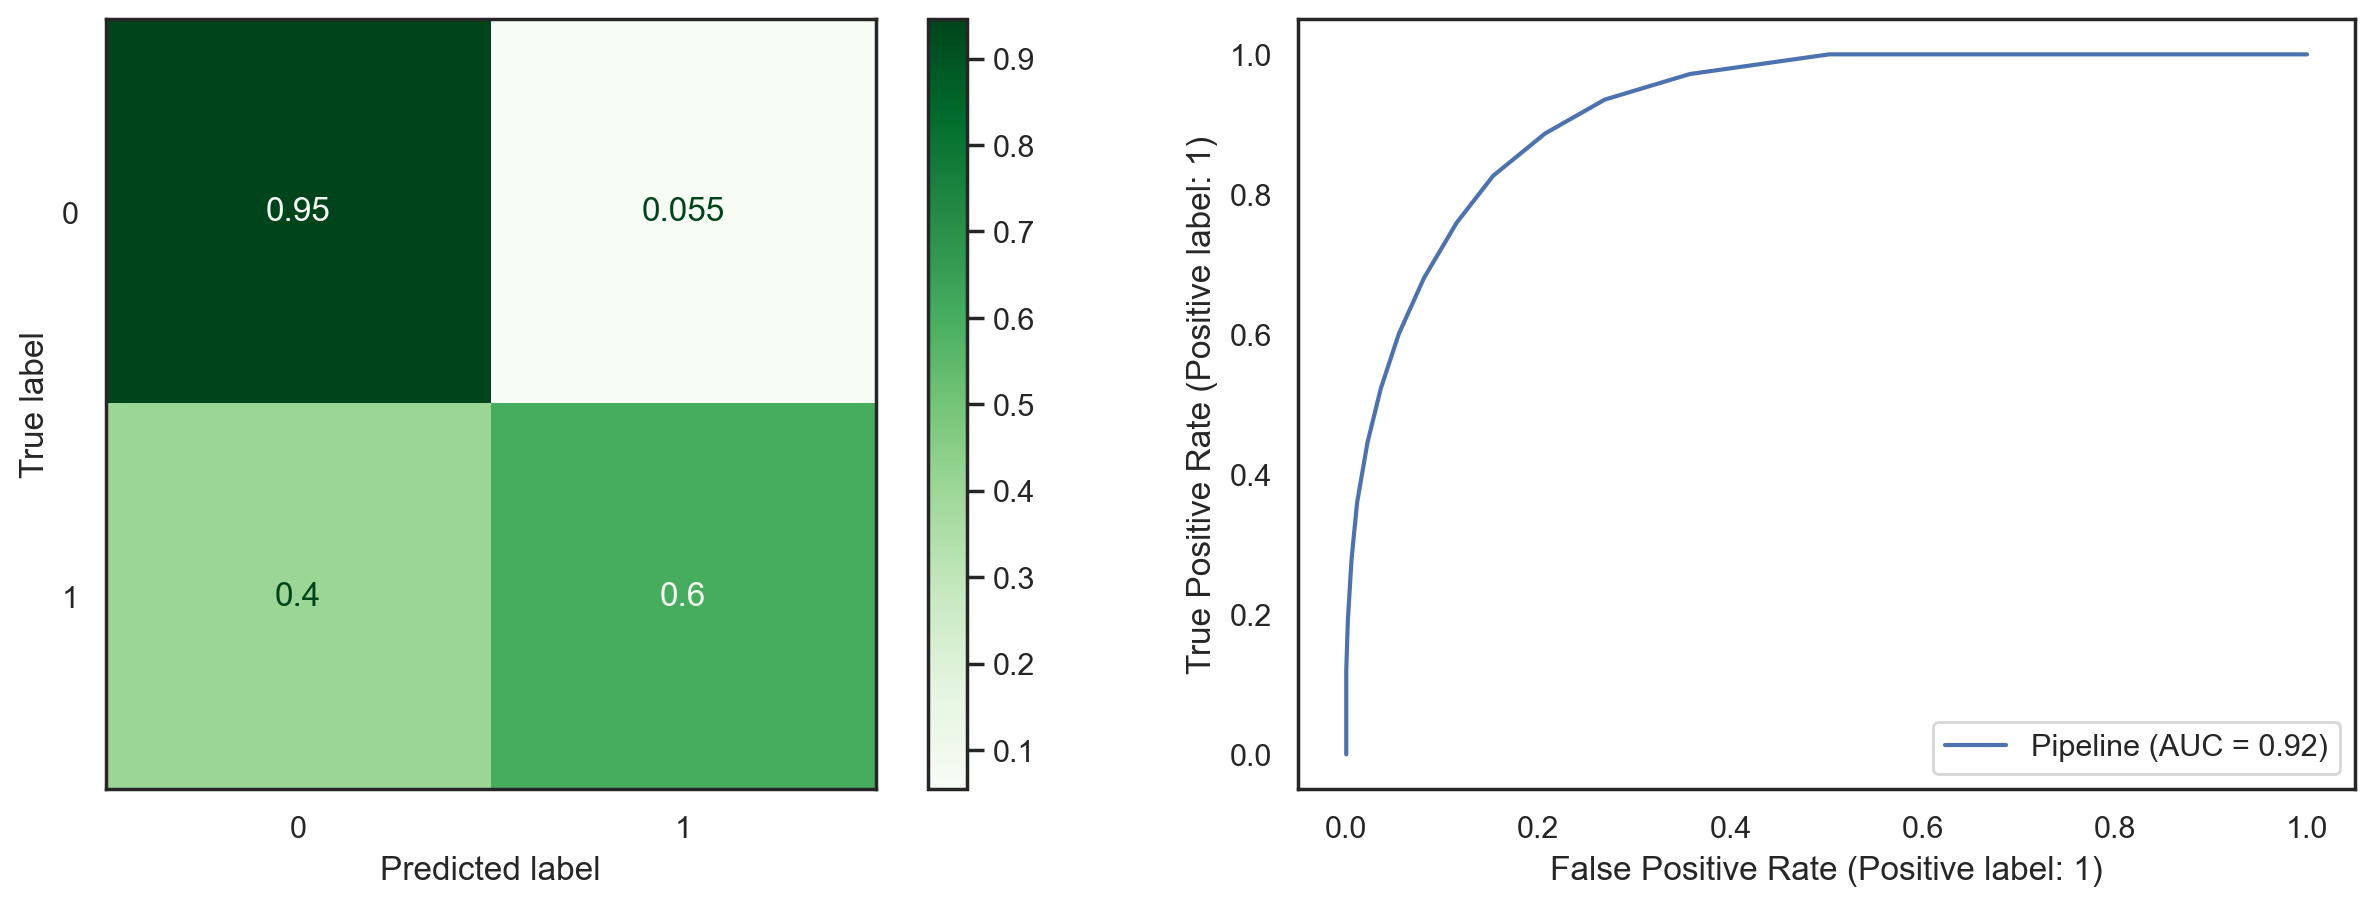

In [139]:
evaluate_classiffication(knn_pipe2_best, X_train, y_train, label='Train Data')

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9278
           1       0.72      0.55      0.62      2920

    accuracy                           0.84     12198
   macro avg       0.79      0.74      0.76     12198
weighted avg       0.83      0.84      0.83     12198



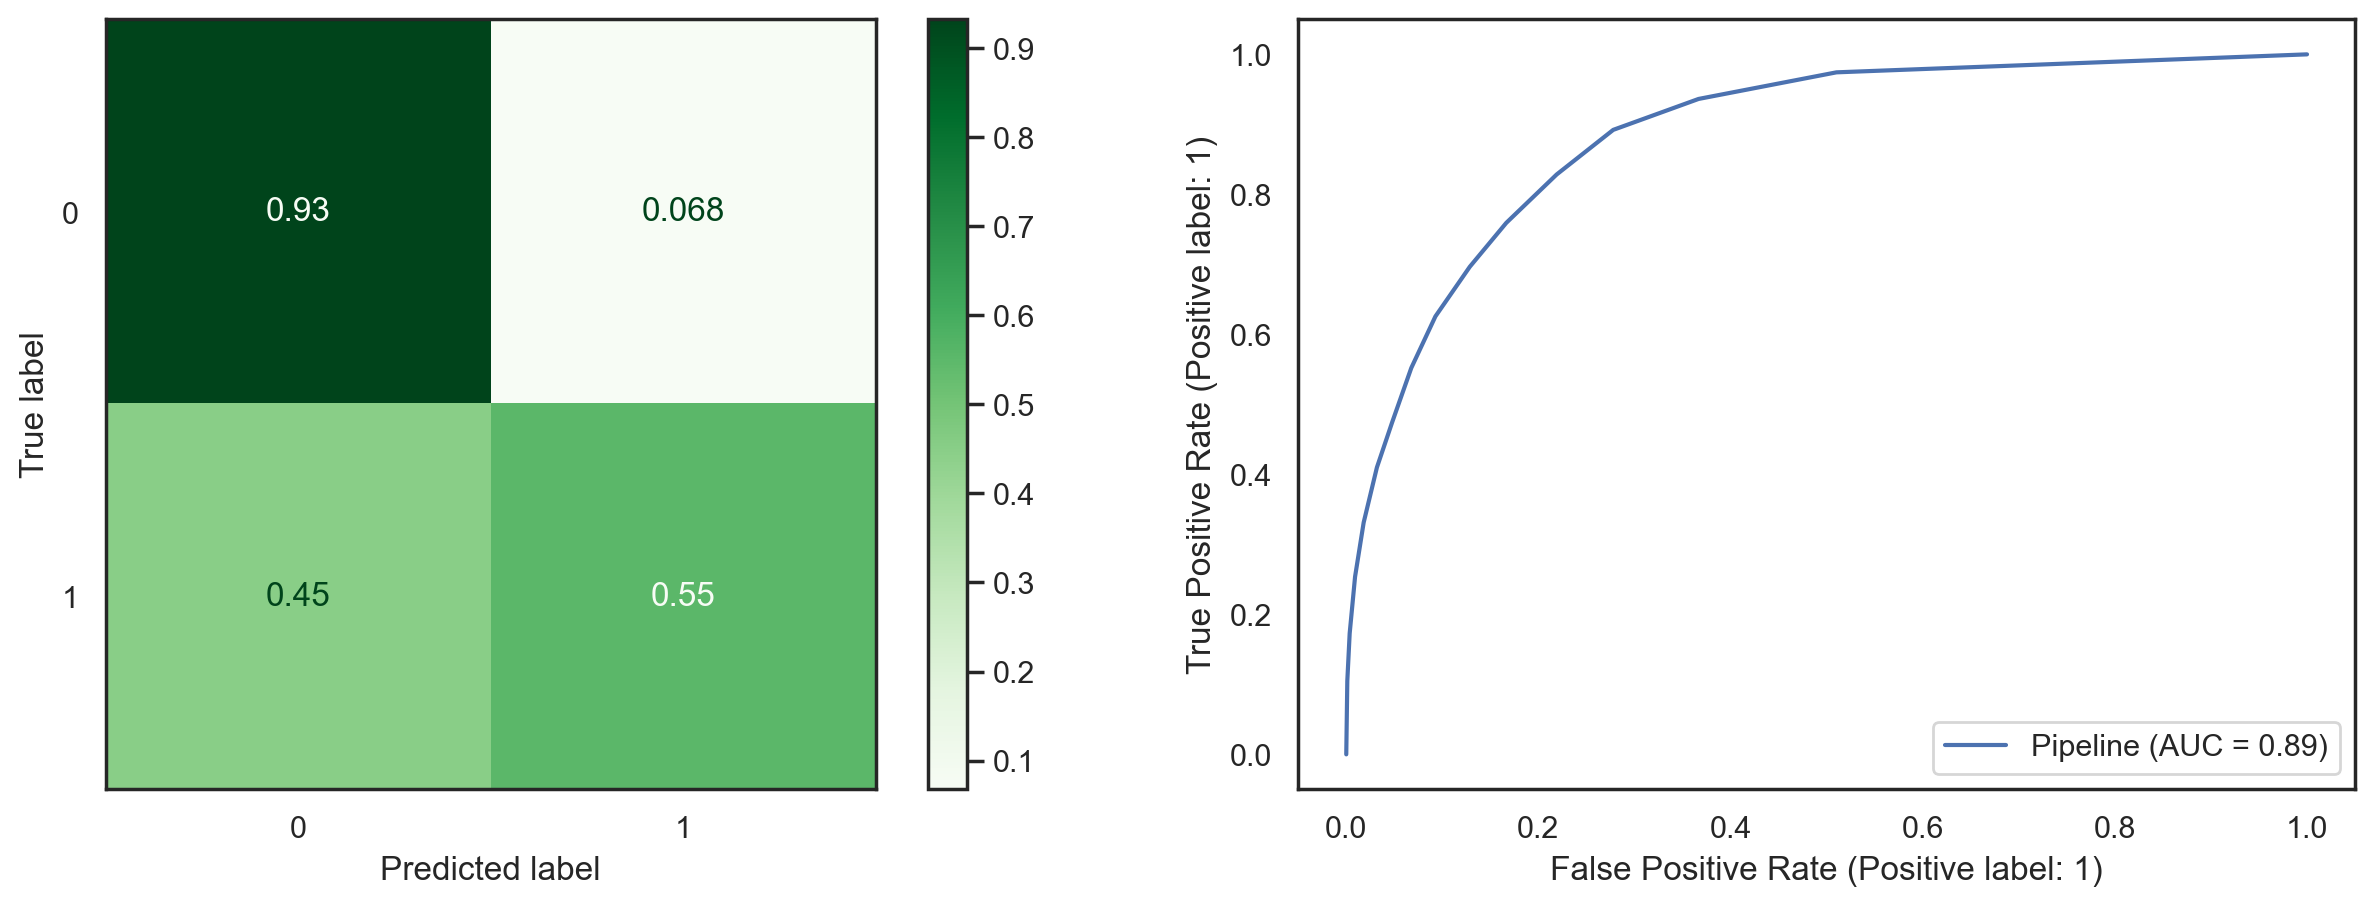

In [140]:
evaluate_classiffication(knn_pipe2_best, X_test, y_test, label='Test Data')

### Call outs

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

1. <strong> Accuracy</strong> should be the most imporant metric for this analysis as we need to correctly predict the salaries. 
2. <strong>Higher Accuracy </strong>means a better model. 
3. Tuned model showed marginal improvement in Accuracy score and hence is the winning model.  
4. Relevant scores of the above two models are below: <br>

**Model Type** | **Score Type** | **Score**
--- | --- | -- 
Basic Model | Accuracy | 83%
Tuned Model | Accuracy | 84%
Basic Model | AUC Scores | 85% 
Tuned Model | AUC Scores | 89% 

## Comparing both the models

<span style="font-size: 100%; background: #ffe5d9;"> <b>Insights and Callouts</b> </span>

Out of all the models which were fit to answer the business needs, the models without feature engineering performed better in terms of Accuracy Score. Among those models, Random Forest Models perfomed the best. However, both the Basic and tuned Random Forest model had the **same Accuracy Score.** HIgher AUC Score was used as a tie breaker. **Tuned Random Forest** has the highest AUC Score hence **the winning model.** 

**Model Type** | **Score Type** | **Score** | **Flag**
--- | --- | -- | --
Basic Random Forest Model | Accuracy | 85% | 
Tuned Random Forest Model | Accuracy | 85% | Winner Model 
Basic Random Forest Model | AUC Scores | 89% | 
Tuned Random Forest Model | AUC Scores | 91% | Winner Model

<h1 style="color:green"><b>Health check </b> </h1>

In [141]:
run_time_sec = round ((time.time() - start_time),2)
run_time_min = round((run_time_sec/60),2)

print (f"\n{color.BOLD}Total time to run the code: \n\n{color.RED}{run_time_sec} seconds \n{run_time_min} minutes {color.END}{color.END} ")


Total time to run the code: 

17989.91 seconds 
299.83 minutes  
